# HW3: Genetic Algorithm for Path Planning Problem

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [17]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE)) #A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

## Goal:
Solve 100 sets of data X and find the maximum value **`F(X)`**
$$ F(x)= \sin(10x) \cdot x + \cos(2x) \cdot x $$

In [18]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

## HW3.1 Target Function
From x=0~5, draw the curve of this objective function

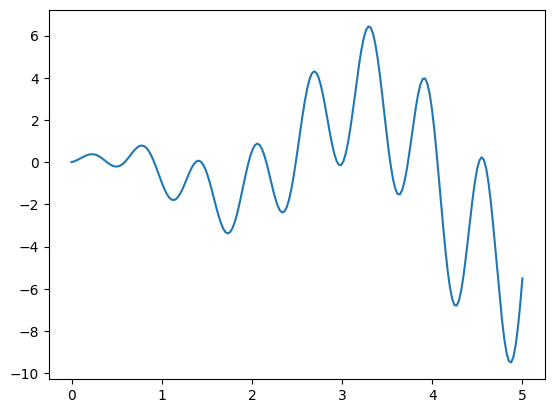

In [19]:
# TODO: draw the curve of this objective function
x = np.linspace(X_BOUND[0], X_BOUND[1], 200)
plt.plot(x, F(x))
plt.show()

# Design Fitness Function
$$ fitness(pred) =\text{pred} + 10^{-3} - \min(\text{pred}) $$

This fitness function $pred + 10^{-3} - min(pred)$ is designed carefully to address common issues in algorithms and optimize the selection process. Here's a detailed explanation:

### **Explanation**:
1. **pred**: This represents the current fitness value (or prediction) of an individual in the population. The higher the fitness, the more likely the individual will be selected in a genetic algorithm.

2. **$10^{-3}$**: This small constant is added to ensure that the fitness value never becomes zero. Even when the `pred` value is very small or equal to the minimum in the population, this small constant prevents the fitness from being zero. It helps avoid numerical issues and ensures that each individual has a non-zero fitness, which is crucial in selection mechanisms that use fitness-based probabilities.

3. $- \min(\text{pred})$: Subtracting the minimum fitness value of the population helps normalize the fitness values. By shifting all fitness values so that the minimum fitness becomes close to zero, this highlights the difference between individuals. It ensures that the worst individuals are near zero fitness, making selection mechanisms more effective by promoting fitter individuals.

### **Why This Design?**

1. **Preventing Zero Fitness**: Adding a small constant ($10^{-3}$) ensures that no fitness value becomes zero or negative. This is important for algorithms that require positive fitness values, such as selection mechanisms in genetic algorithms that rely on proportional selection.

2. **Normalization**: By subtracting the minimum fitness value, the function ensures that the least fit individuals are near zero. This scaling helps selection mechanisms function more effectively, preventing the worst individuals from dominating and allowing fitter individuals to have a higher chance of selection.

3. **Fine Adjustment**: The addition of $10^{-3}$ is a small adjustment to ensure that no individual has exactly zero fitness, which is important for algorithms that require positive probabilities for selection.

### **Summary**:

This fitness function is designed to:
- Normalize fitness values by subtracting the minimum fitness.
- Ensure no individual has zero or negative fitness by adding a small constant.
- Smoothly scale fitness values to make sure selection mechanisms (like in genetic algorithms) work effectively, increasing the likelihood of selecting fitter individuals.

## You can also design other fitness functions.

## HW3.2 Fitness Function
Write the Fitness Function:
$$ \text{pred} + 10^{-3} - \min(\text{pred}) $$

In [20]:
def get_fitness(pred):
    # TODO: Write the Fitness Function and return the fitness value
    return pred + 1e-3 - np.min(pred)

## HW3.3 Representation
Design a function **`translateDNA(pop)`** to convert binary-encoded DNA (gene sequences) into a real number, used in genetic algorithms to map binary genes to a value within a specified range.

### **Input**:
- **`pop`**: A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

### **Output**:
- A 1D array of real values, where the binary DNA has been converted to real numbers and scaled according to `X_BOUND[1]`.

### **Explanation**:
- The function converts the binary DNA representation into a real number by treating the binary sequence as a number in base-2, normalizing it by dividing by the maximum possible value, and scaling it to fit within the specified bounds (`X_BOUND[1]`).

In [21]:
def translateDNA(pop):
    # TODO: Write the translateDNA Function and return a 1D array of real values
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# HW3.4 Selection
Write a function **`select(pop, fitness)`** to implement a natural selection process in a genetic algorithm. It selects individuals from the population (pop) based on their fitness values (fitness), where fitter individuals have a higher probability of being selected for the next generation.

Tip: You can normalize fitness into a probability distribution using `p = fitness / fitness.sum()`, ensuring that the sum of all individuals equals 1. The higher the fitness of an individual, the greater its chance of being selected, but every individual still has a chance of being chosen.
### **Input**:
1. **`pop`**: A 2D array representing the population, where each row is an individual's genetic sequence (DNA).
2. **`fitness`**: A 1D array representing the fitness values of the individuals in the population.

### **Output**:
- **`pop[idx]`**: A 2D array representing the selected population for the next generation, with individuals chosen based on their fitness values.

In [22]:
def select(pop, fitness):    # nature selection wrt pop's fitness
    # TODO: Write the select Function and return a 2D array representing the selected population for the next generation
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/fitness.sum())
    return pop[idx]

## HW3.5 Crossover
Write a function **`crossover(parent, pop)`** to implement the crossover (mating) process in a genetic algorithm. During crossover, two individuals exchange some of their genetic material to produce a new individual (child).
### **Input**:
1. **`parent`**: A 1D array representing an individual's genetic sequence (DNA).
2. **`pop`**: A 2D array representing the population, where each row is an individual.

### **Output**:
- **`parent`**: A 1D array, either modified (after crossover) or unmodified (if no crossover occurs).


In [23]:
def crossover(parent, pop):
    # TODO: Write the crossover Function and return a 1D array of parent
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool_)
        parent[cross_points] = pop[i_, cross_points]
    return parent

## HW3.6 Mutation
Write a function **`mutate()`** to perform a mutation operation in a genetic algorithm, which introduces small random changes in an individual's genetic sequence (DNA). Mutation helps maintain genetic diversity within the population.
### **Input**:
1. **`child`**: A 1D array representing an individual's genetic sequence (DNA), where each element is typically a binary value (0 or 1).

### **Output**:
- **`child`**: The modified genetic sequence after mutation, where certain genes may have flipped from 0 to 1 or from 1 to 0 based on the mutation rate.

### **Explanation**:
- The function iterates through each gene in the `child` DNA sequence. For each gene, with a probability determined by `MUTATION_RATE`, the gene may undergo mutation, flipping from 0 to 1 or from 1 to 0. This introduces genetic diversity into the population.


In [24]:
def mutate(child):
    # TODO: Write the mutation Function and return the child
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

## HW3.7 GA Function
Write a function GA() that implements a basic genetic algorithm (GA) that evolves a population over many generations to optimize the function F() based on the function you wrote above.
### **Input**:

1. **`N_GENERATIONS`**: An integer representing the number of generations (iterations) the genetic algorithm will run.
2. **`pop`**: A 2D array where each row represents an individual's DNA sequence encoded in binary (the initial population).

### **Output**:
- **`performance`**: A list that records the sum of fitness values (`F_values.sum()`) for each generation. This allows the user to analyze how the overall fitness of the population evolves across generations. Additionally, for each generation, a scatter plot is generated to visually represent the solutions' progression.
- **`time_per_iteration`**: A list used to record the computation time for each generation.

In [25]:
def GA(N_GENERATIONS, pop):
    # TODO: Write the GA Function that evolves a population over many generations to optimize the function F() based on the function you wrote above.
    performance = []
    time_per_iteration = []

    for generation in range(N_GENERATIONS):
        start_time = time.time()

        F_values = F(translateDNA(pop))
        fitness = get_fitness(F_values)

        performance.append(F_values.sum())

        print(f"Generation: {generation}")
        print(f"Max F_values: {max(performance)}")

        # Scatter plot
        plt.scatter(translateDNA(pop), F_values, s=100, lw=0, c='red', alpha=0.5)
        plt.show()

        # Evolution
        pop = select(pop, fitness)
        pop_copy = pop.copy()
        for parent in pop:
            child = crossover(parent, pop_copy)
            child = mutate(child)
            parent[:] = child

        end_time = time.time()
        iteration_time = end_time - start_time
        time_per_iteration.append(iteration_time)
        print(f"Time for Generation {generation}: {iteration_time:.4f} seconds")

    return performance, time_per_iteration  # Return both performance and time per generation

Generation: 0
Max F_values: -114.97602322942578


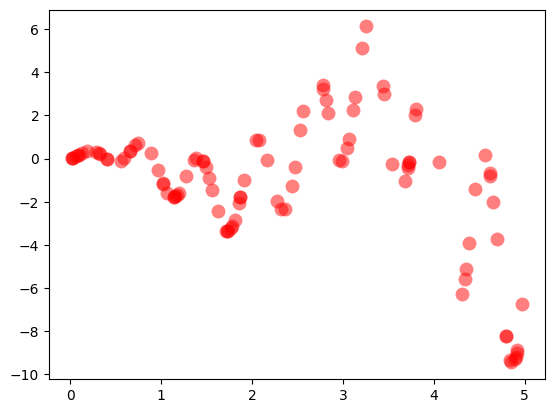

Time for Generation 0: 0.0822 seconds
Generation: 1
Max F_values: -3.528797550440612


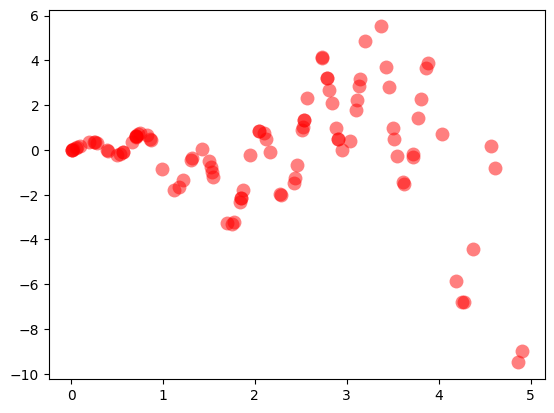

Time for Generation 1: 0.0781 seconds
Generation: 2
Max F_values: 88.54694328589062


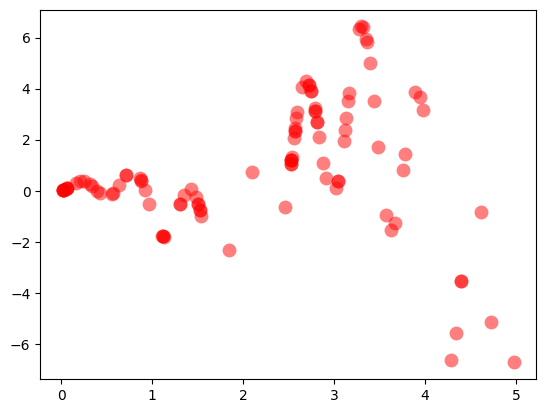

Time for Generation 2: 0.0617 seconds
Generation: 3
Max F_values: 160.21977220189612


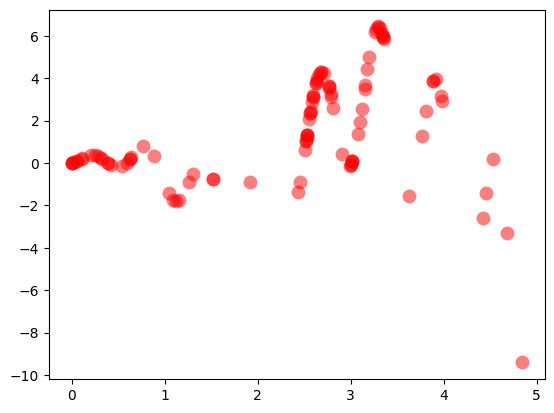

Time for Generation 3: 0.0716 seconds
Generation: 4
Max F_values: 219.75075535197095


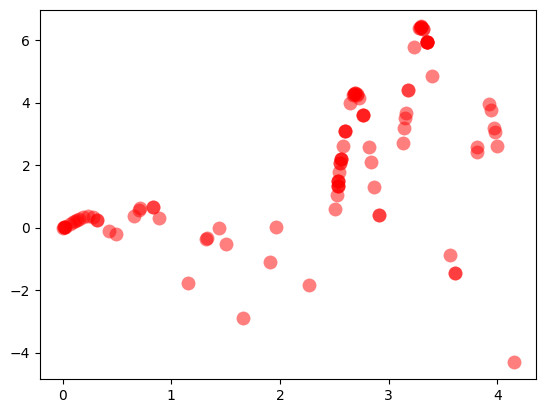

Time for Generation 4: 0.0548 seconds
Generation: 5
Max F_values: 254.71066462200676


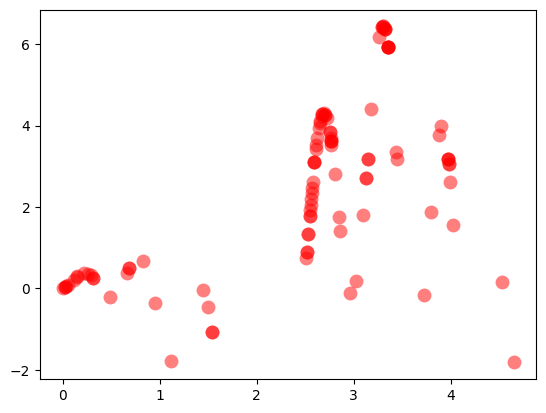

Time for Generation 5: 0.0508 seconds
Generation: 6
Max F_values: 359.7327170042645


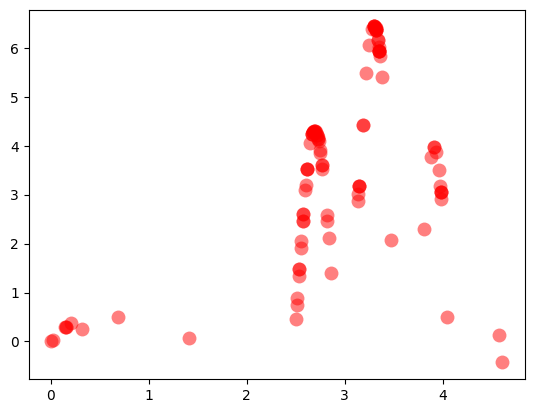

Time for Generation 6: 0.0494 seconds
Generation: 7
Max F_values: 451.01444971848815


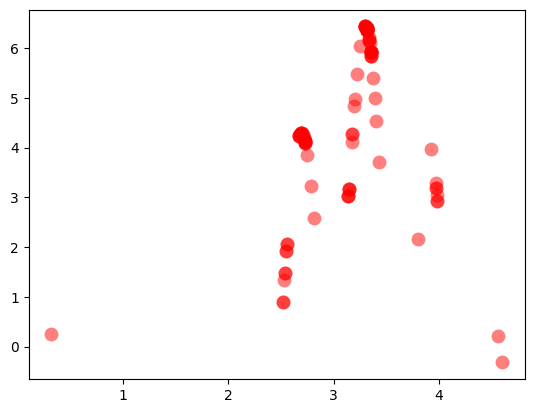

Time for Generation 7: 0.0673 seconds
Generation: 8
Max F_values: 477.63127215241724


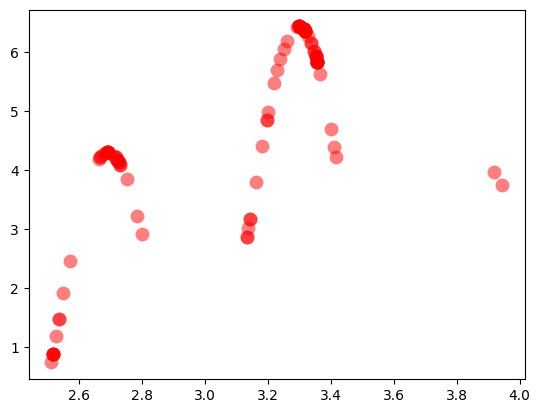

Time for Generation 8: 0.0734 seconds
Generation: 9
Max F_values: 538.0785330661513


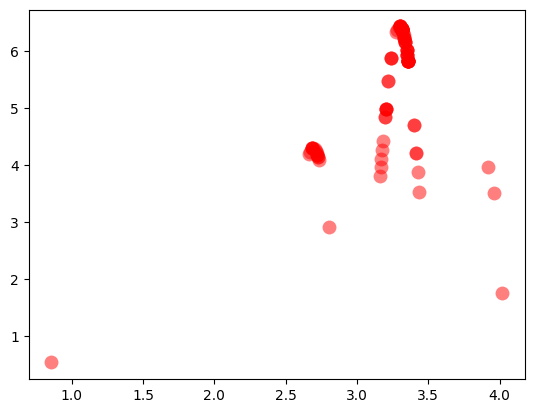

Time for Generation 9: 0.1286 seconds
Generation: 10
Max F_values: 538.0785330661513


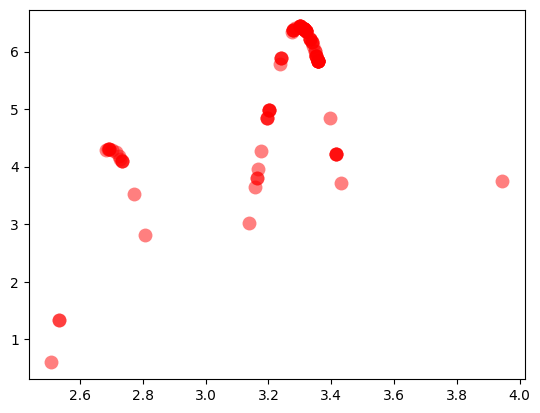

Time for Generation 10: 0.0805 seconds
Generation: 11
Max F_values: 572.7525189970803


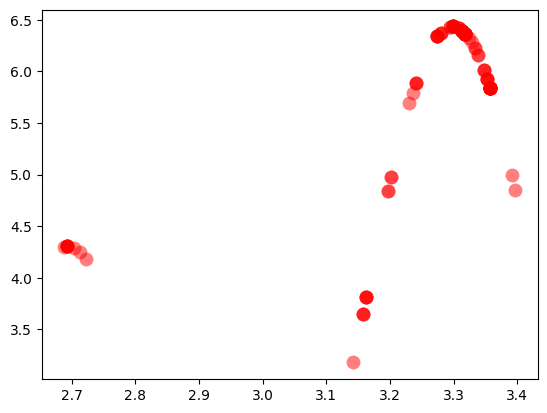

Time for Generation 11: 0.0787 seconds
Generation: 12
Max F_values: 572.7525189970803


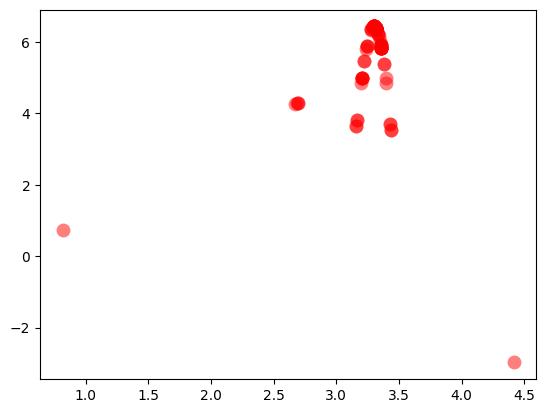

Time for Generation 12: 0.0791 seconds
Generation: 13
Max F_values: 572.7525189970803


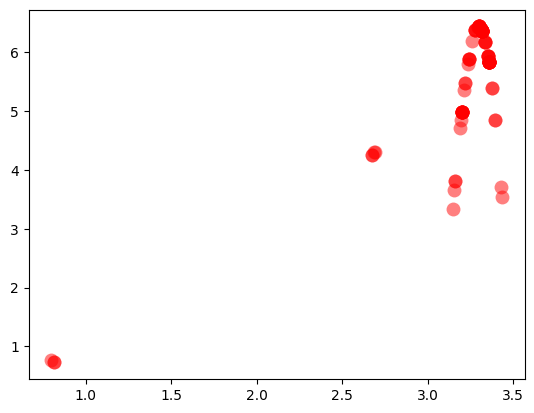

Time for Generation 13: 0.0658 seconds
Generation: 14
Max F_values: 572.7525189970803


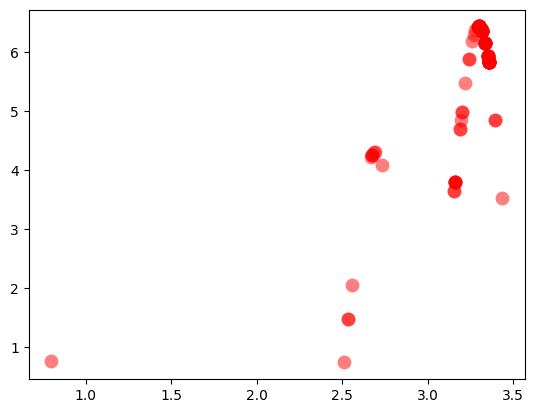

Time for Generation 14: 0.0995 seconds
Generation: 15
Max F_values: 575.3058213249758


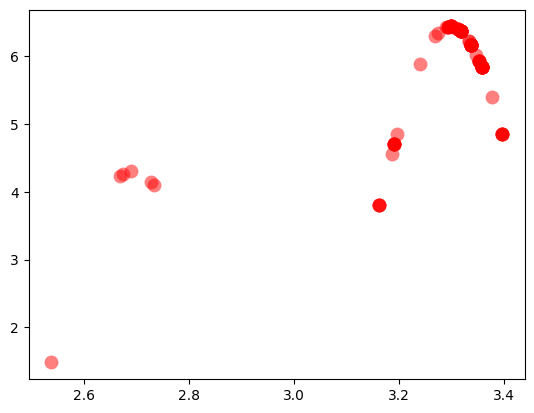

Time for Generation 15: 0.0669 seconds
Generation: 16
Max F_values: 595.3233149286242


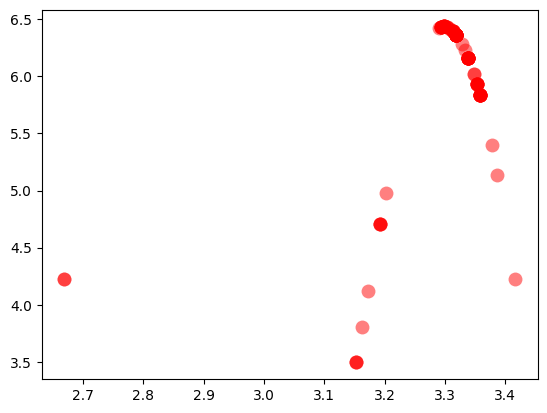

Time for Generation 16: 0.0843 seconds
Generation: 17
Max F_values: 595.3233149286242


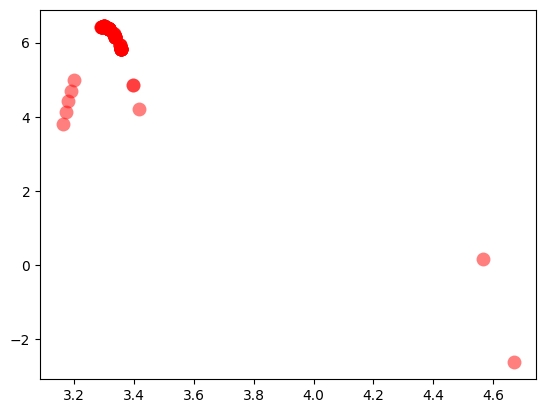

Time for Generation 17: 0.0730 seconds
Generation: 18
Max F_values: 606.5913647715632


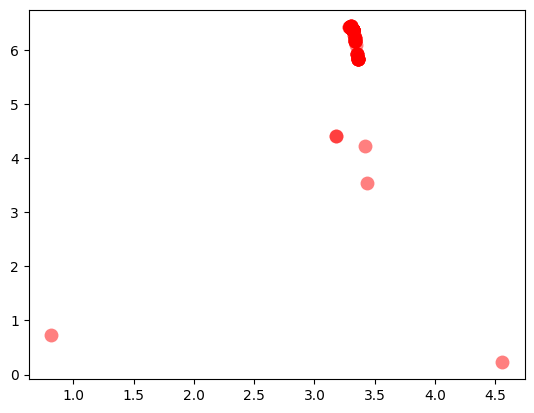

Time for Generation 18: 0.0723 seconds
Generation: 19
Max F_values: 615.5639046143913


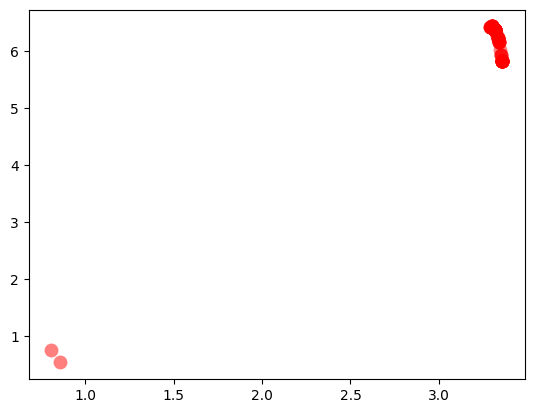

Time for Generation 19: 0.0676 seconds
Generation: 20
Max F_values: 615.5639046143913


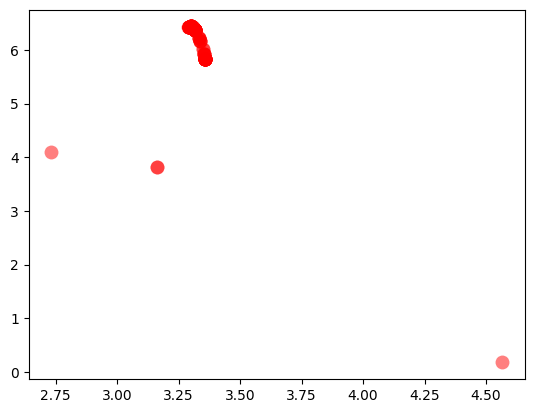

Time for Generation 20: 0.0832 seconds
Generation: 21
Max F_values: 615.5639046143913


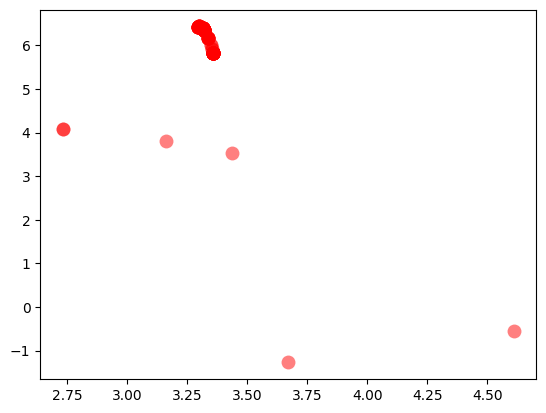

Time for Generation 21: 0.0817 seconds
Generation: 22
Max F_values: 624.0518680505286


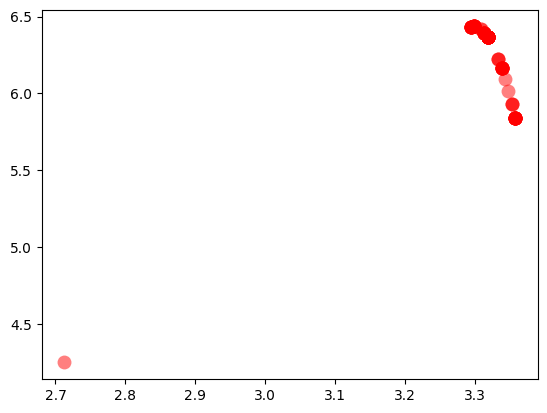

Time for Generation 22: 0.0584 seconds
Generation: 23
Max F_values: 624.0518680505286


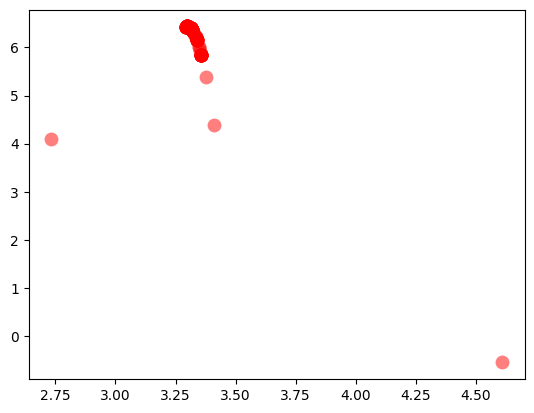

Time for Generation 23: 0.0612 seconds
Generation: 24
Max F_values: 624.0518680505286


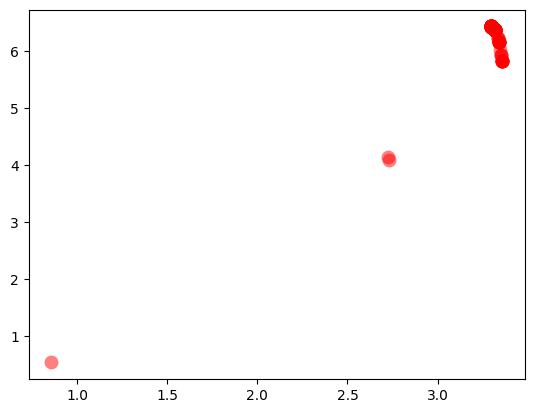

Time for Generation 24: 0.0791 seconds
Generation: 25
Max F_values: 624.0518680505286


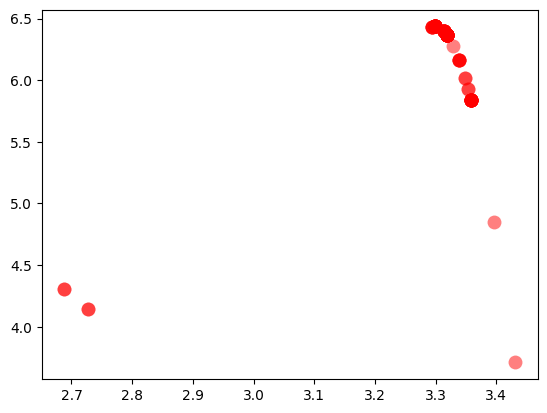

Time for Generation 25: 0.0519 seconds
Generation: 26
Max F_values: 624.0518680505286


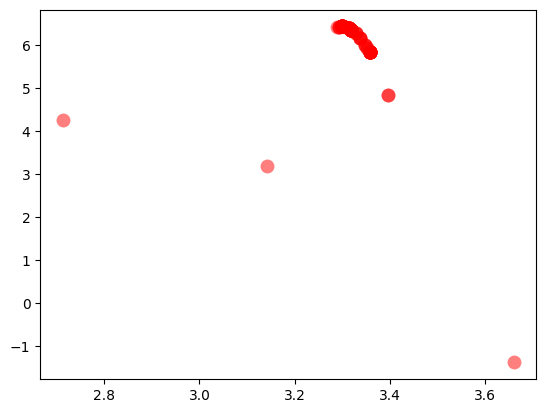

Time for Generation 26: 0.0635 seconds
Generation: 27
Max F_values: 626.5480253282825


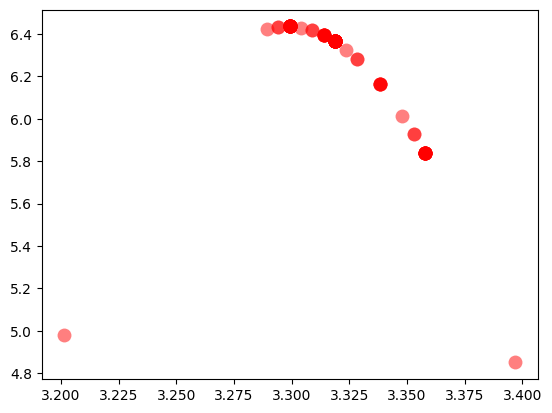

Time for Generation 27: 0.0664 seconds
Generation: 28
Max F_values: 626.5480253282825


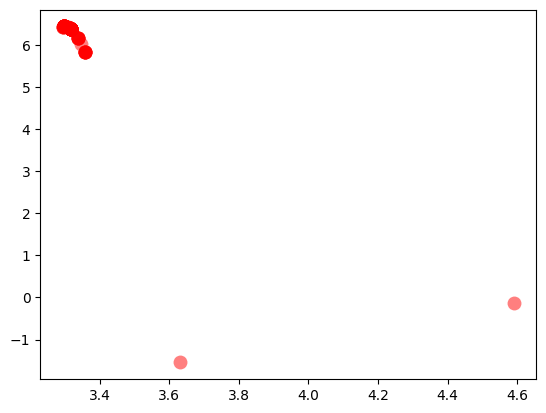

Time for Generation 28: 0.0503 seconds
Generation: 29
Max F_values: 626.5480253282825


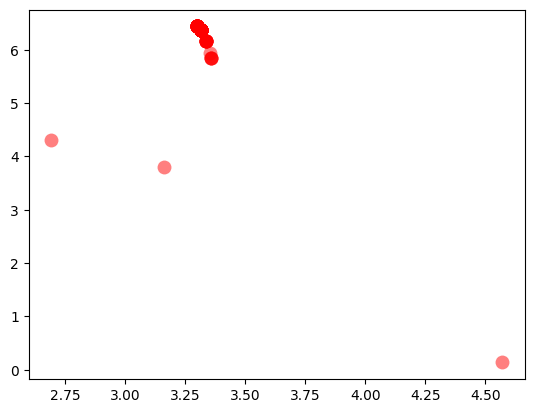

Time for Generation 29: 0.0673 seconds
Generation: 30
Max F_values: 627.4000953576083


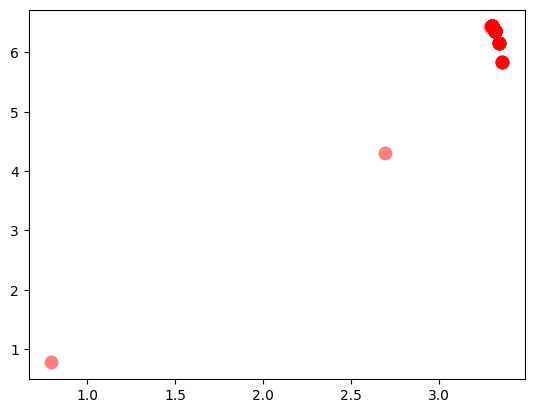

Time for Generation 30: 0.0836 seconds
Generation: 31
Max F_values: 627.4000953576083


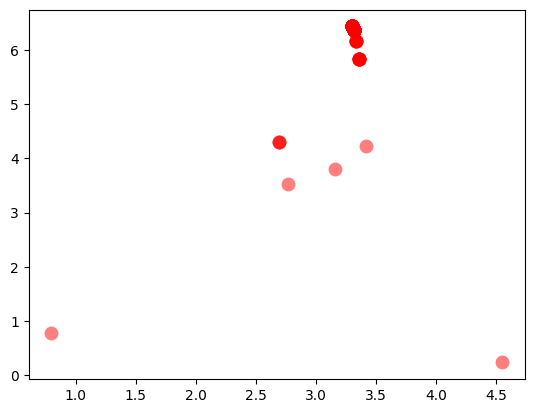

Time for Generation 31: 0.0774 seconds
Generation: 32
Max F_values: 627.4000953576083


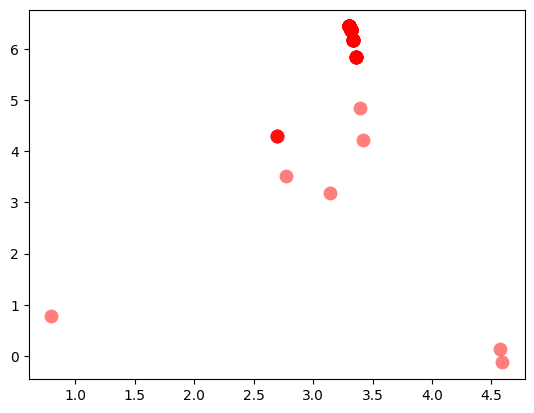

Time for Generation 32: 0.0552 seconds
Generation: 33
Max F_values: 627.7710176804042


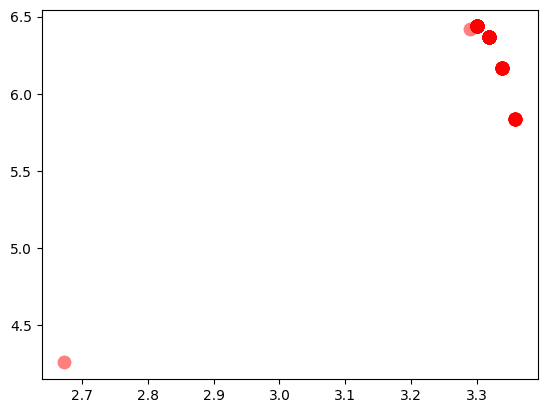

Time for Generation 33: 0.0523 seconds
Generation: 34
Max F_values: 627.7710176804042


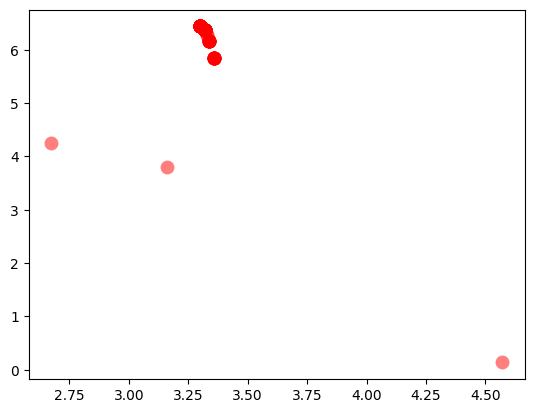

Time for Generation 34: 0.0644 seconds
Generation: 35
Max F_values: 627.7710176804042


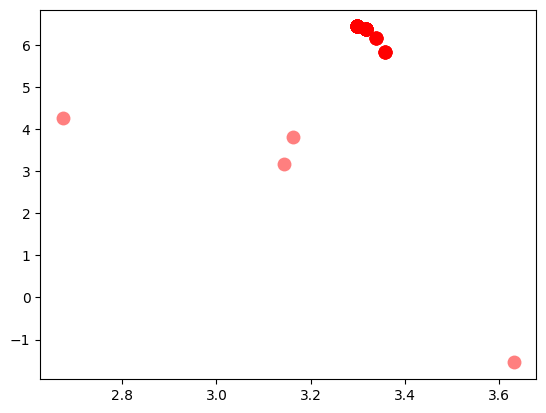

Time for Generation 35: 0.0598 seconds
Generation: 36
Max F_values: 627.7710176804042


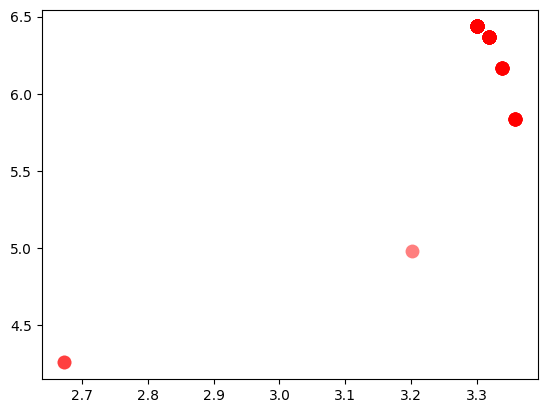

Time for Generation 36: 0.0412 seconds
Generation: 37
Max F_values: 627.9030247687516


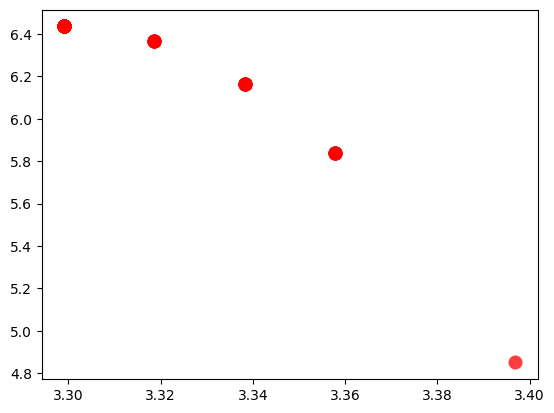

Time for Generation 37: 0.0656 seconds
Generation: 38
Max F_values: 629.8850919508264


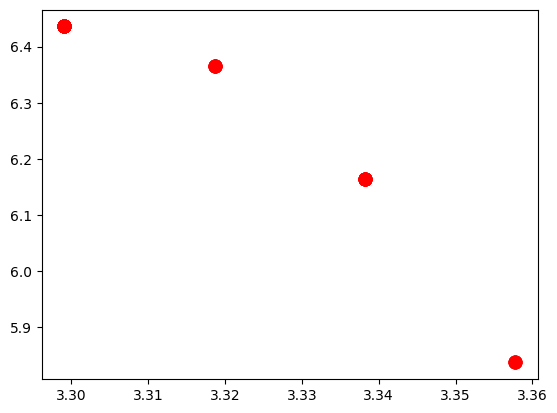

Time for Generation 38: 0.0607 seconds
Generation: 39
Max F_values: 638.2491565154123


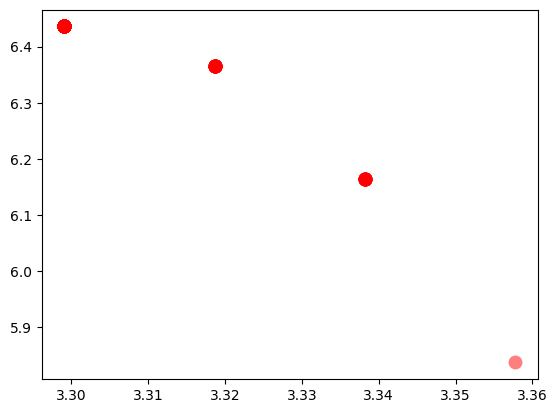

Time for Generation 39: 0.0564 seconds
Generation: 40
Max F_values: 638.2491565154123


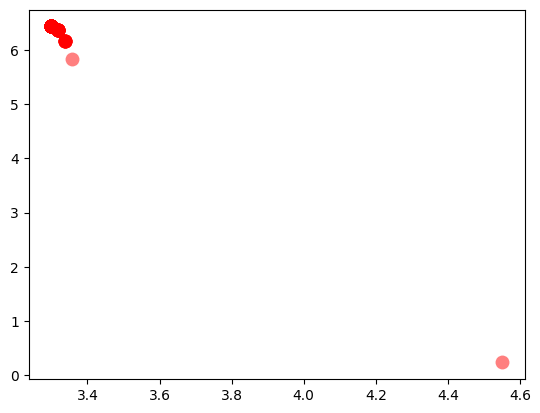

Time for Generation 40: 0.0492 seconds
Generation: 41
Max F_values: 638.2491565154123


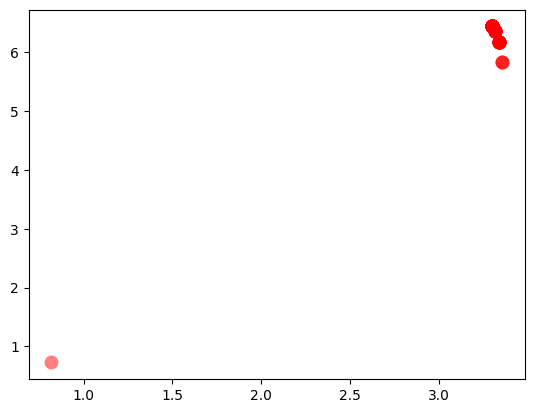

Time for Generation 41: 0.0501 seconds
Generation: 42
Max F_values: 638.2491565154123


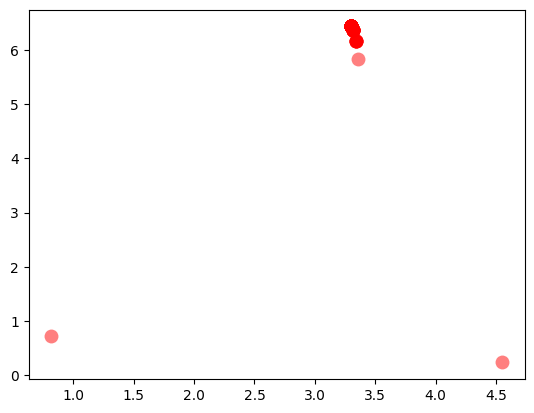

Time for Generation 42: 0.0673 seconds
Generation: 43
Max F_values: 638.2491565154123


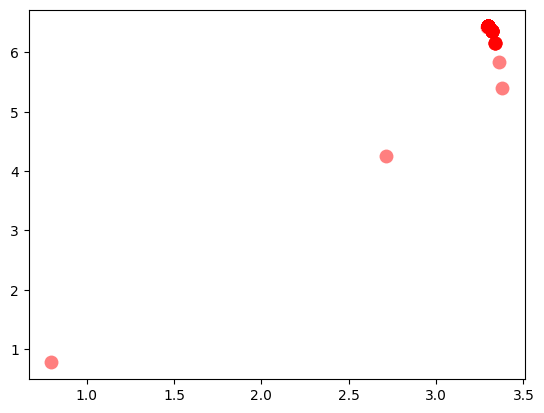

Time for Generation 43: 0.0498 seconds
Generation: 44
Max F_values: 638.2491565154123


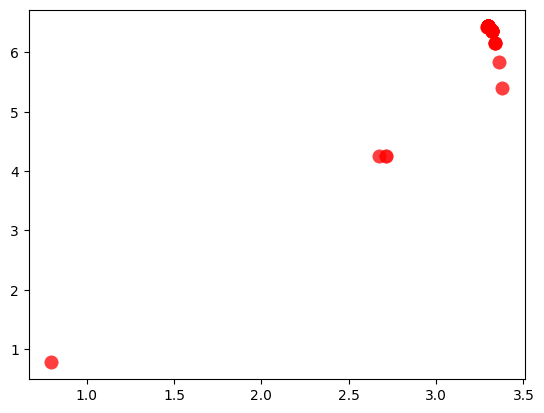

Time for Generation 44: 0.0624 seconds
Generation: 45
Max F_values: 638.2491565154123


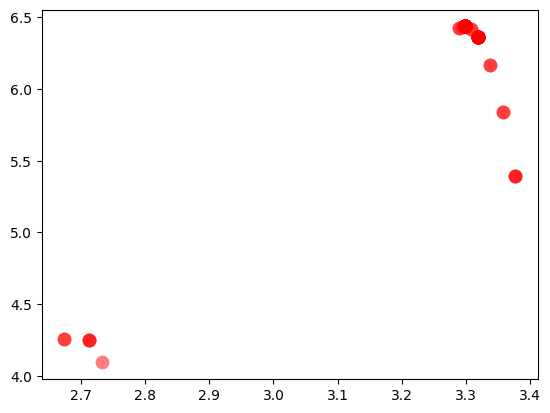

Time for Generation 45: 0.0727 seconds
Generation: 46
Max F_values: 638.2491565154123


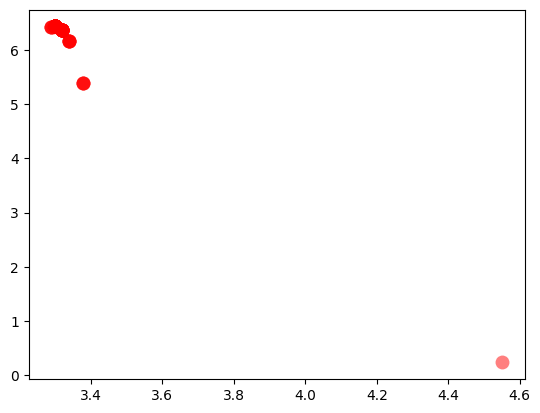

Time for Generation 46: 0.0479 seconds
Generation: 47
Max F_values: 638.2491565154123


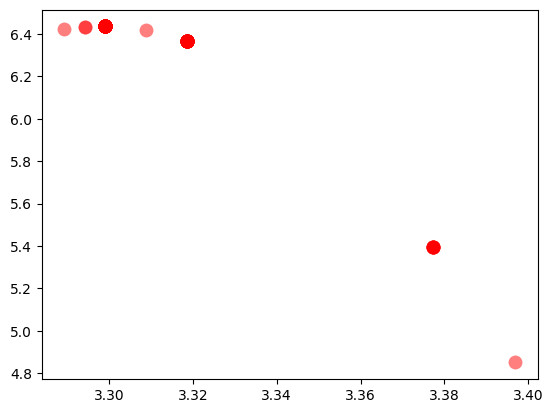

Time for Generation 47: 0.0664 seconds
Generation: 48
Max F_values: 638.2491565154123


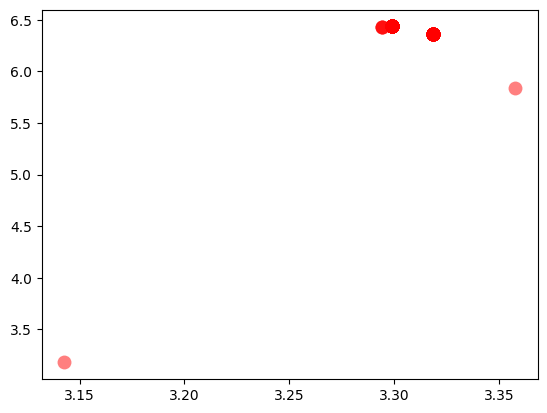

Time for Generation 48: 0.0511 seconds
Generation: 49
Max F_values: 638.2491565154123


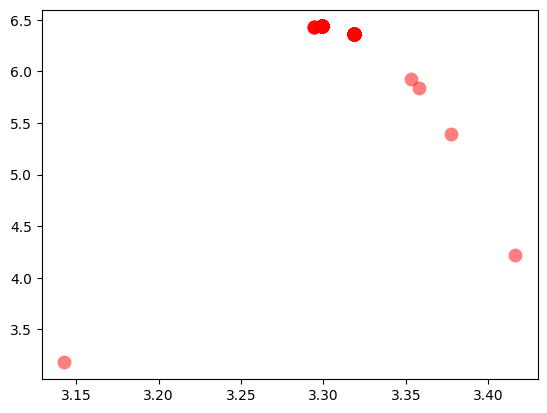

Time for Generation 49: 0.0502 seconds
Generation: 50
Max F_values: 638.2491565154123


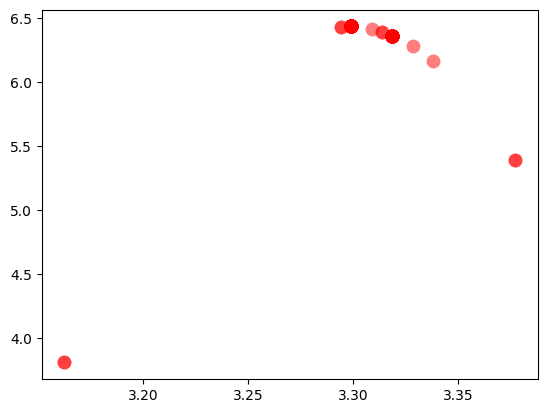

Time for Generation 50: 0.0595 seconds
Generation: 51
Max F_values: 638.2491565154123


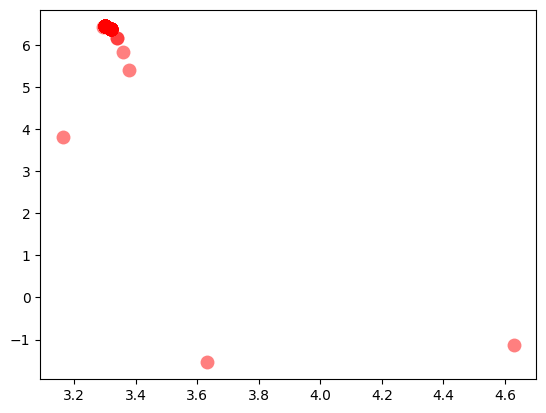

Time for Generation 51: 0.1065 seconds
Generation: 52
Max F_values: 638.2491565154123


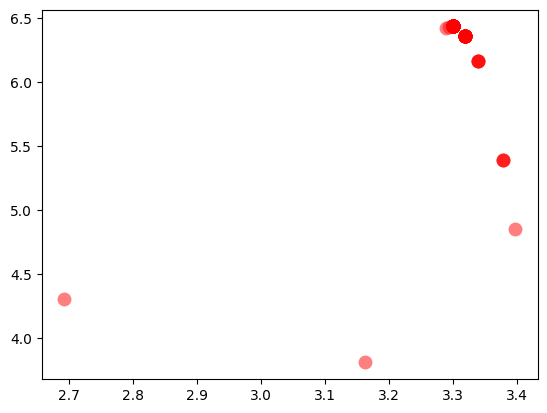

Time for Generation 52: 0.0495 seconds
Generation: 53
Max F_values: 638.2491565154123


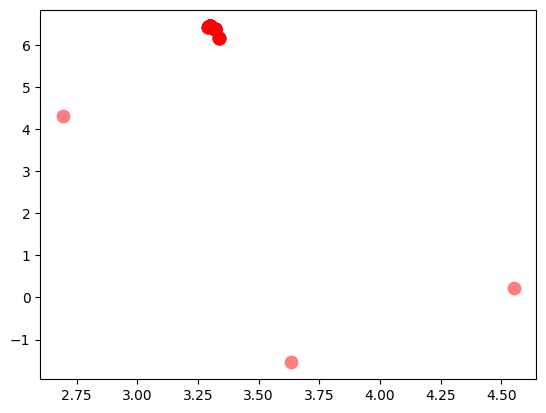

Time for Generation 53: 0.0666 seconds
Generation: 54
Max F_values: 638.2491565154123


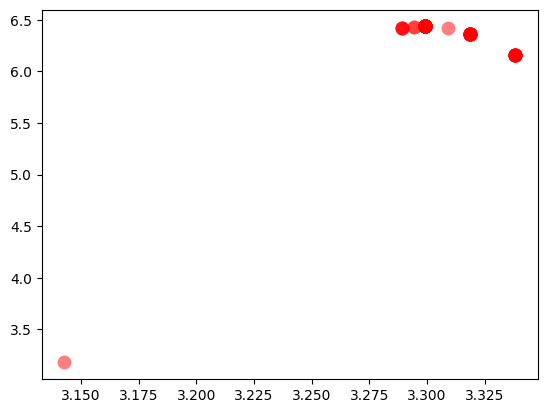

Time for Generation 54: 0.0502 seconds
Generation: 55
Max F_values: 638.2491565154123


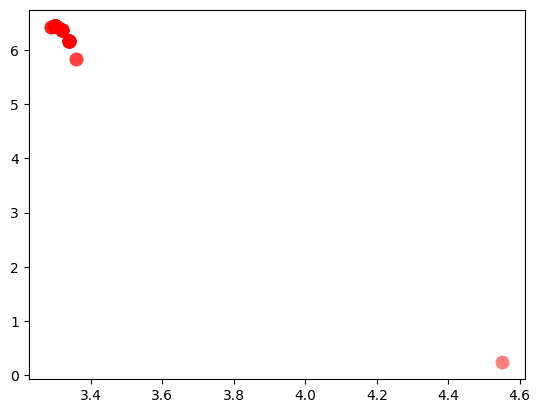

Time for Generation 55: 0.0623 seconds
Generation: 56
Max F_values: 640.55666612508


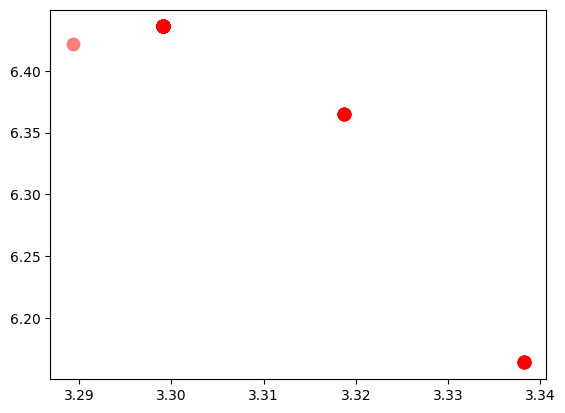

Time for Generation 56: 0.0565 seconds
Generation: 57
Max F_values: 640.55666612508


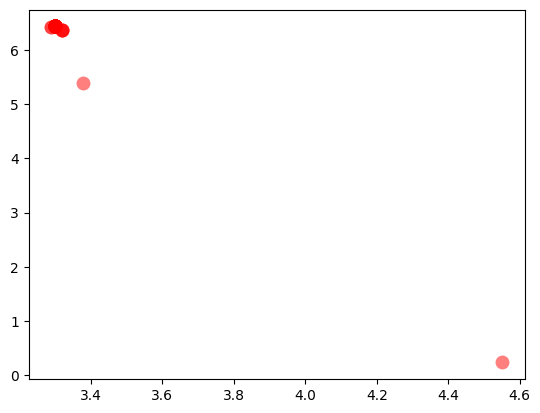

Time for Generation 57: 0.0475 seconds
Generation: 58
Max F_values: 640.55666612508


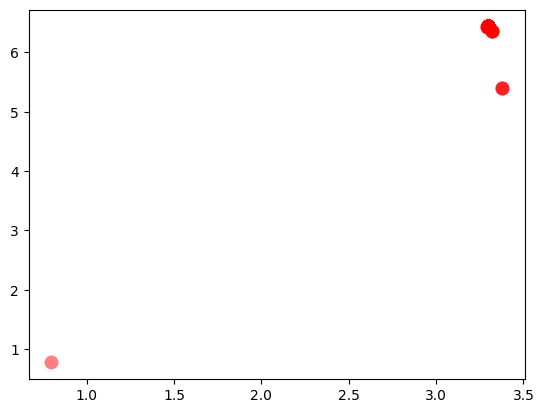

Time for Generation 58: 0.0529 seconds
Generation: 59
Max F_values: 640.55666612508


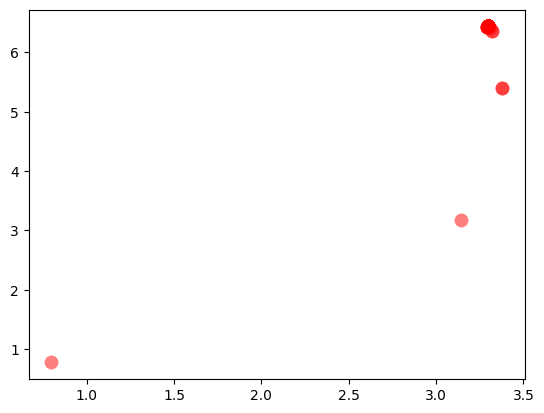

Time for Generation 59: 0.0646 seconds
Generation: 60
Max F_values: 640.55666612508


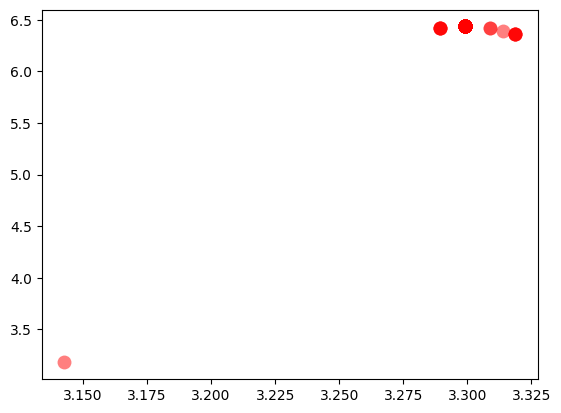

Time for Generation 60: 0.0656 seconds
Generation: 61
Max F_values: 640.55666612508


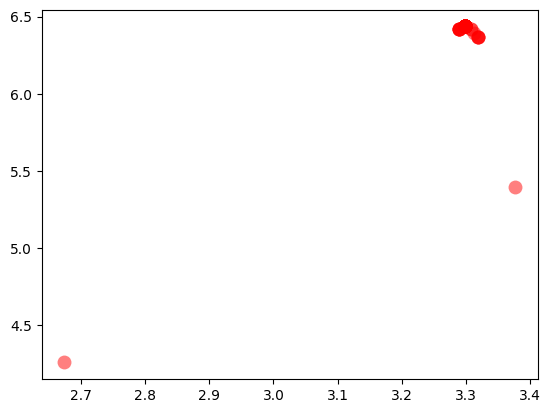

Time for Generation 61: 0.0506 seconds
Generation: 62
Max F_values: 640.55666612508


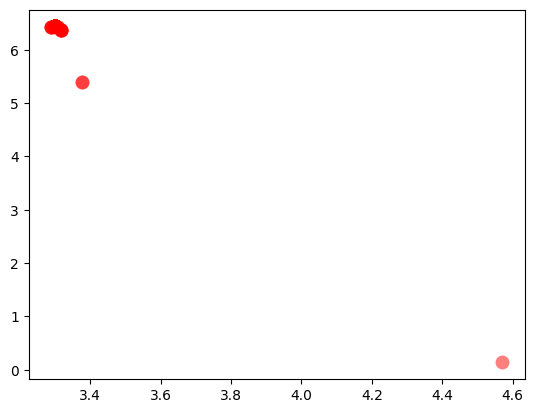

Time for Generation 62: 0.0502 seconds
Generation: 63
Max F_values: 640.55666612508


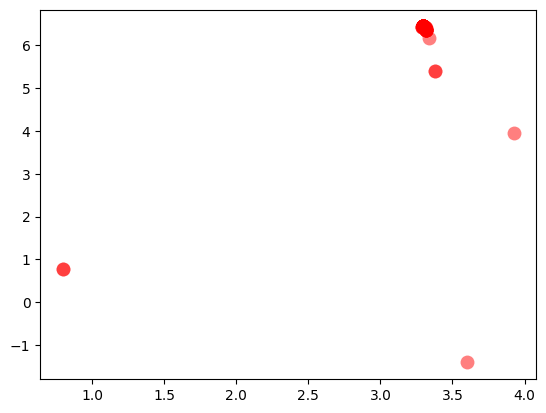

Time for Generation 63: 0.0574 seconds
Generation: 64
Max F_values: 640.55666612508


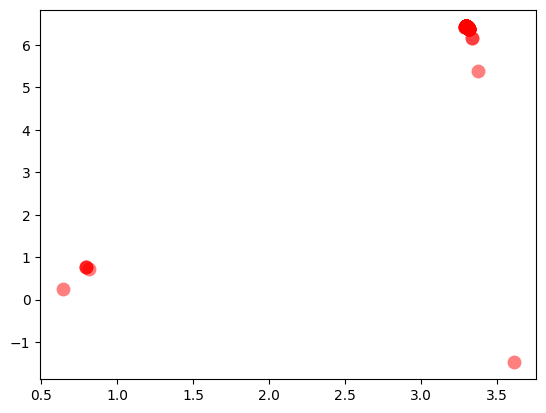

Time for Generation 64: 0.0462 seconds
Generation: 65
Max F_values: 640.55666612508


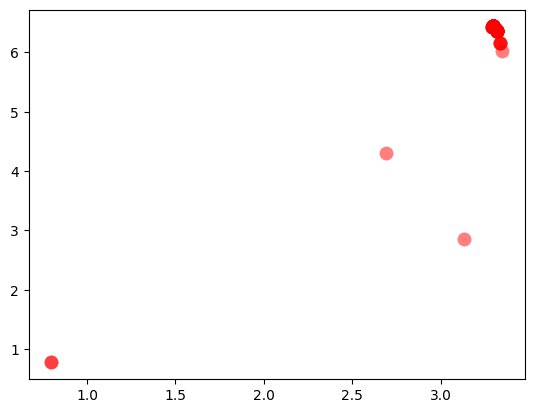

Time for Generation 65: 0.0538 seconds
Generation: 66
Max F_values: 640.55666612508


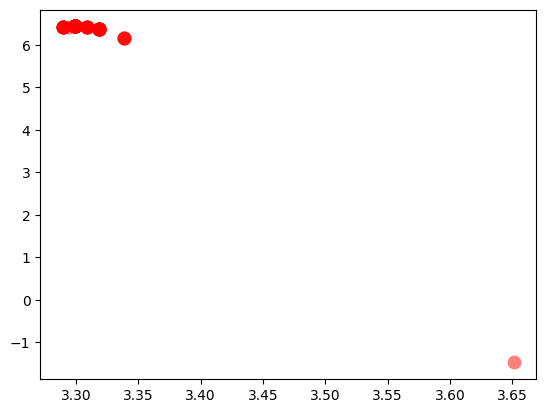

Time for Generation 66: 0.0639 seconds
Generation: 67
Max F_values: 640.55666612508


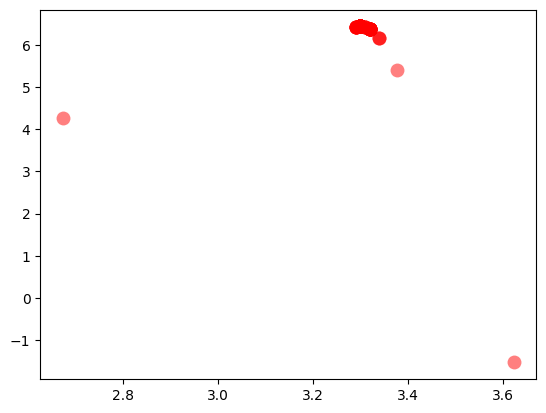

Time for Generation 67: 0.0580 seconds
Generation: 68
Max F_values: 640.55666612508


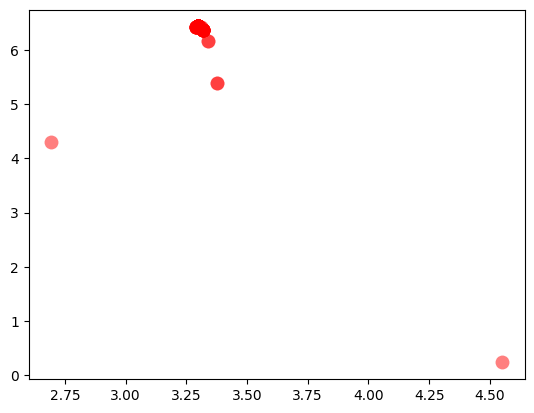

Time for Generation 68: 0.0583 seconds
Generation: 69
Max F_values: 640.55666612508


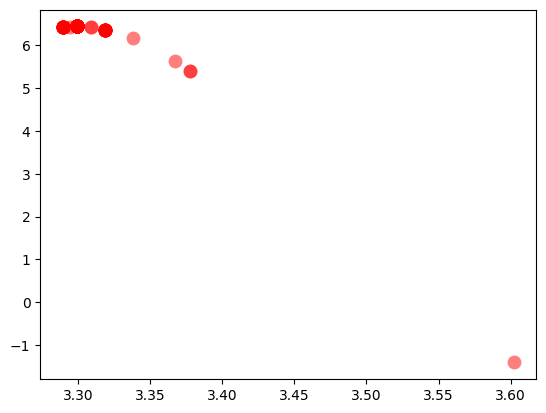

Time for Generation 69: 0.0611 seconds
Generation: 70
Max F_values: 640.55666612508


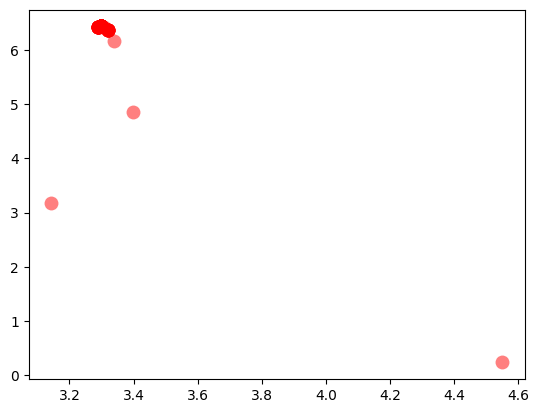

Time for Generation 70: 0.0642 seconds
Generation: 71
Max F_values: 640.55666612508


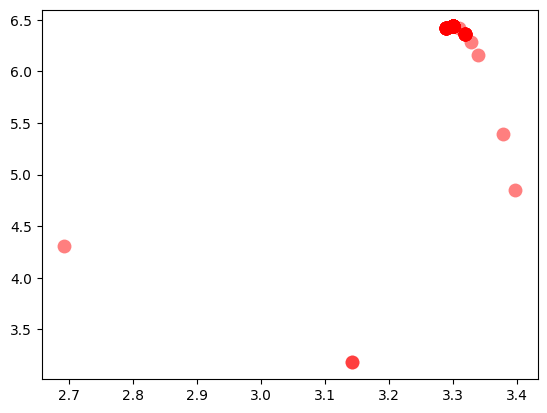

Time for Generation 71: 0.0954 seconds
Generation: 72
Max F_values: 640.8185255578868


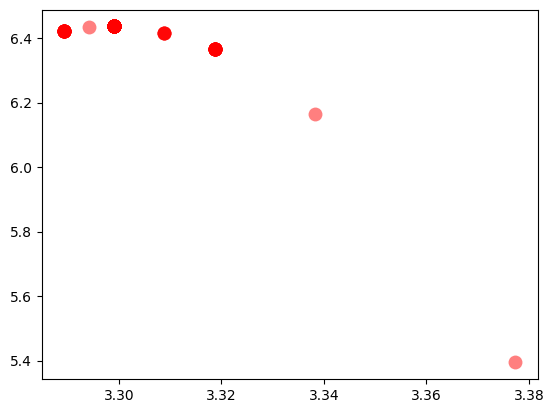

Time for Generation 72: 0.0566 seconds
Generation: 73
Max F_values: 640.8185255578868


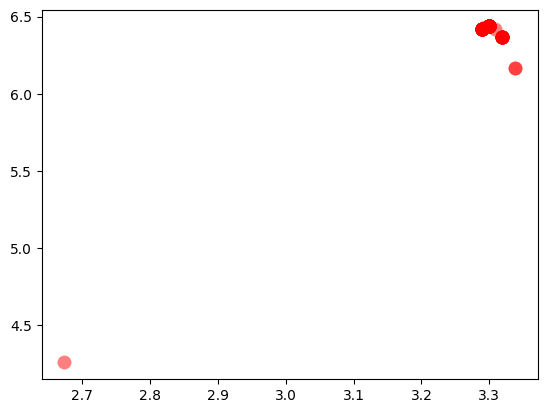

Time for Generation 73: 0.0559 seconds
Generation: 74
Max F_values: 640.8185255578868


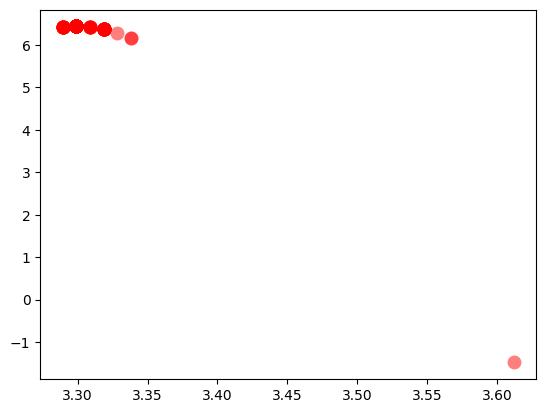

Time for Generation 74: 0.0498 seconds
Generation: 75
Max F_values: 640.8185255578868


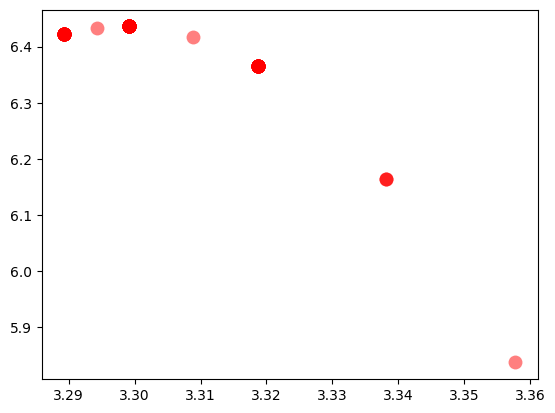

Time for Generation 75: 0.0679 seconds
Generation: 76
Max F_values: 640.8185255578868


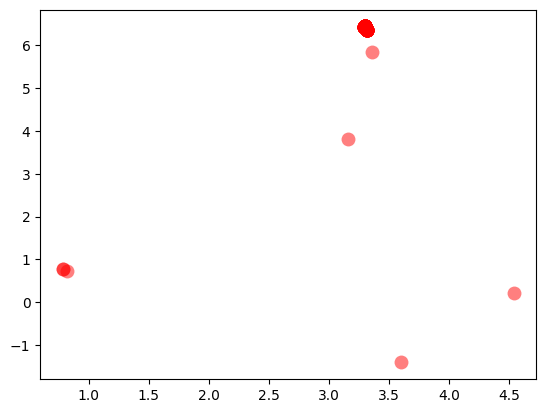

Time for Generation 76: 0.0580 seconds
Generation: 77
Max F_values: 640.8185255578868


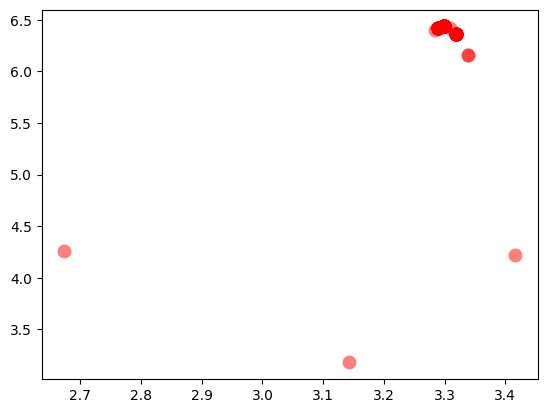

Time for Generation 77: 0.0740 seconds
Generation: 78
Max F_values: 640.8185255578868


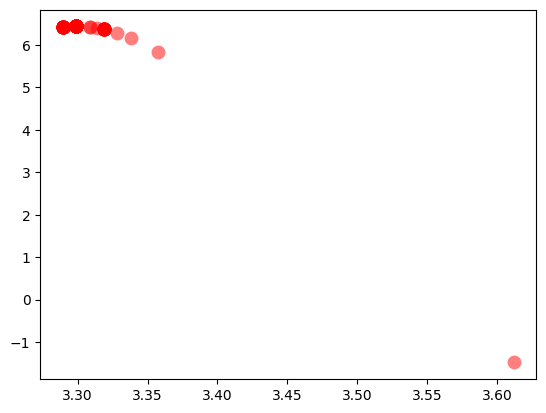

Time for Generation 78: 0.0617 seconds
Generation: 79
Max F_values: 640.8185255578868


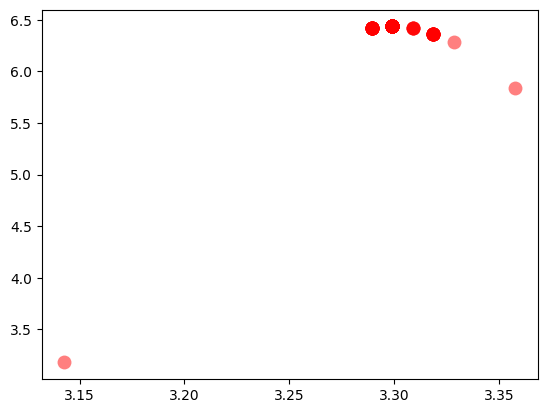

Time for Generation 79: 0.0547 seconds
Generation: 80
Max F_values: 640.8185255578868


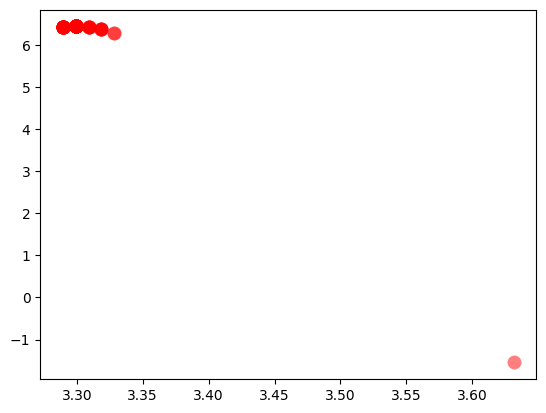

Time for Generation 80: 0.0498 seconds
Generation: 81
Max F_values: 640.8185255578868


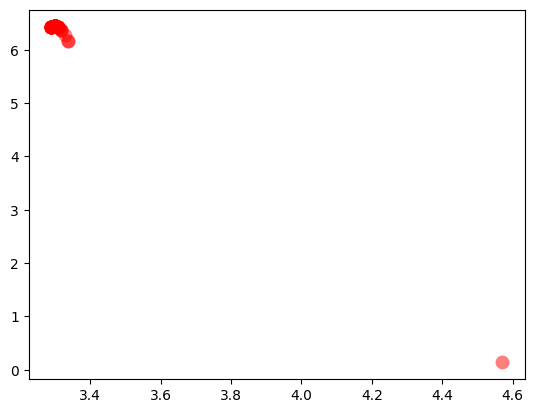

Time for Generation 81: 0.0636 seconds
Generation: 82
Max F_values: 640.8185255578868


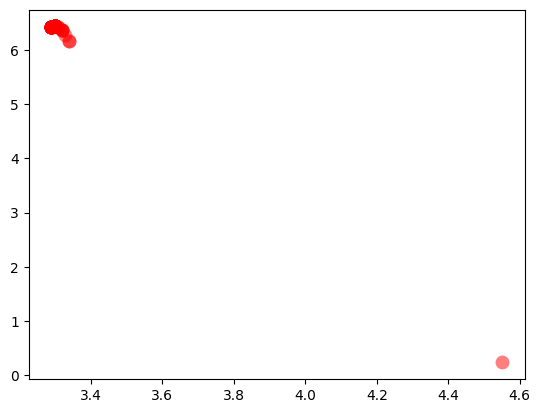

Time for Generation 82: 0.0550 seconds
Generation: 83
Max F_values: 640.8185255578868


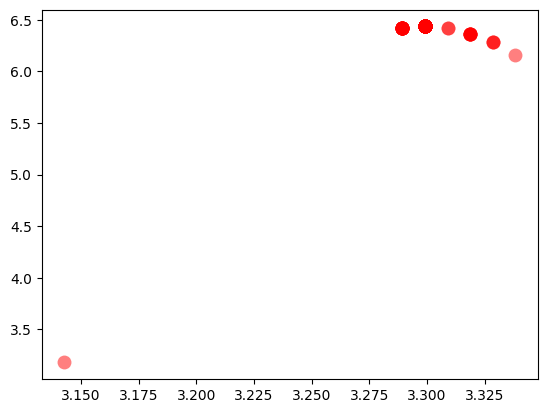

Time for Generation 83: 0.0570 seconds
Generation: 84
Max F_values: 640.8185255578868


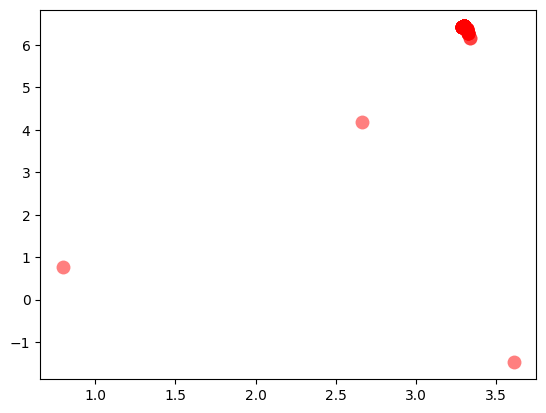

Time for Generation 84: 0.0590 seconds
Generation: 85
Max F_values: 640.8185255578868


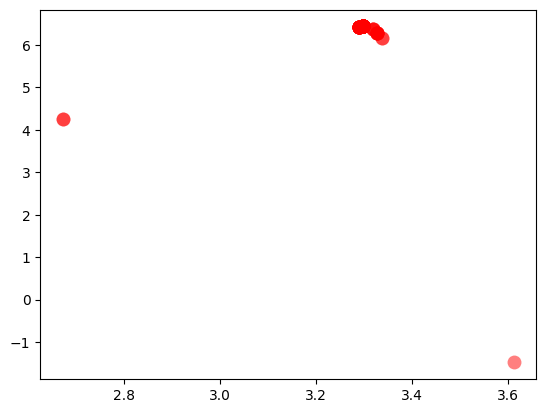

Time for Generation 85: 0.0485 seconds
Generation: 86
Max F_values: 640.8185255578868


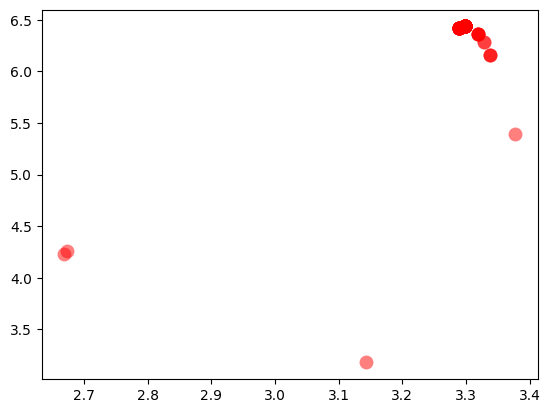

Time for Generation 86: 0.0837 seconds
Generation: 87
Max F_values: 640.8185255578868


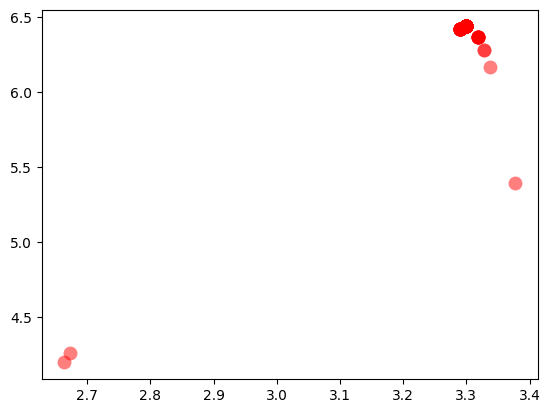

Time for Generation 87: 0.0494 seconds
Generation: 88
Max F_values: 640.8185255578868


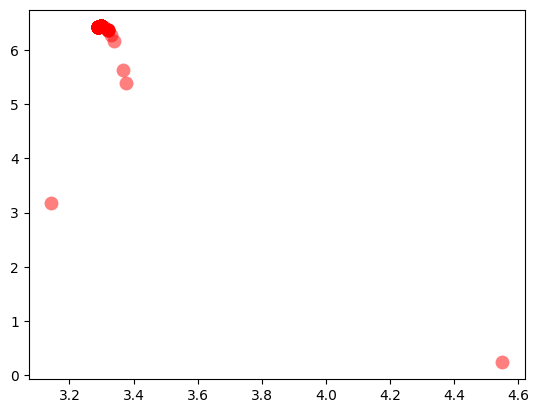

Time for Generation 88: 0.0669 seconds
Generation: 89
Max F_values: 640.8185255578868


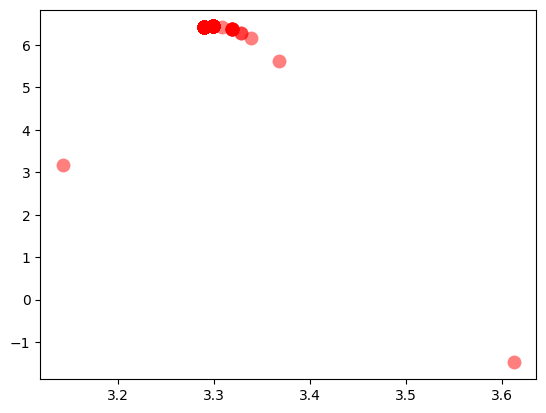

Time for Generation 89: 0.0518 seconds
Generation: 90
Max F_values: 640.8185255578868


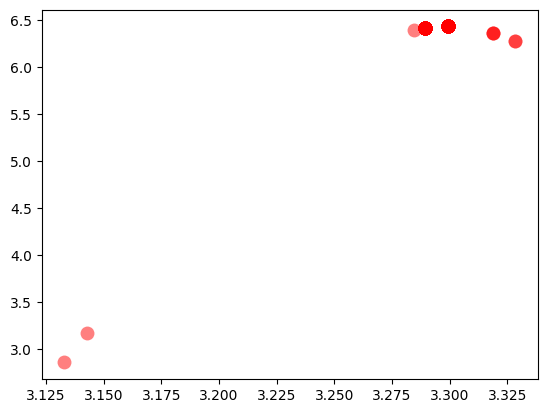

Time for Generation 90: 0.0679 seconds
Generation: 91
Max F_values: 640.8185255578868


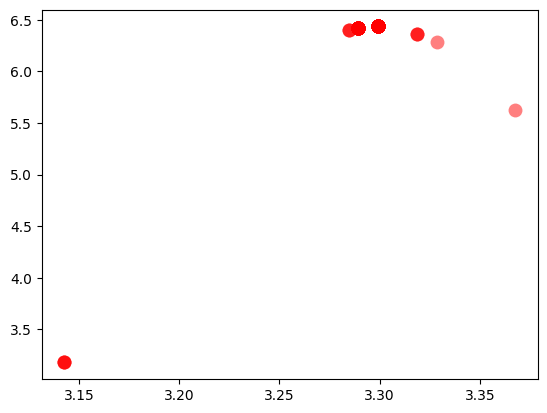

Time for Generation 91: 0.0473 seconds
Generation: 92
Max F_values: 640.8185255578868


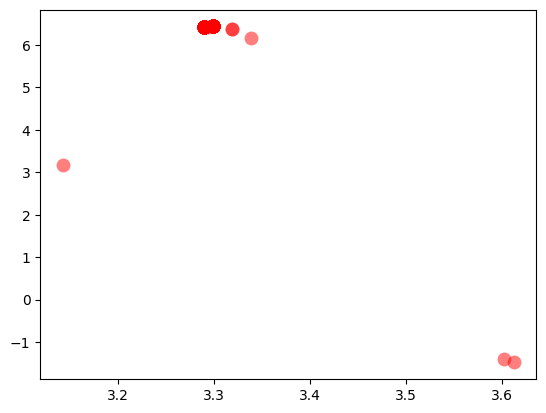

Time for Generation 92: 0.1246 seconds
Generation: 93
Max F_values: 640.8185255578868


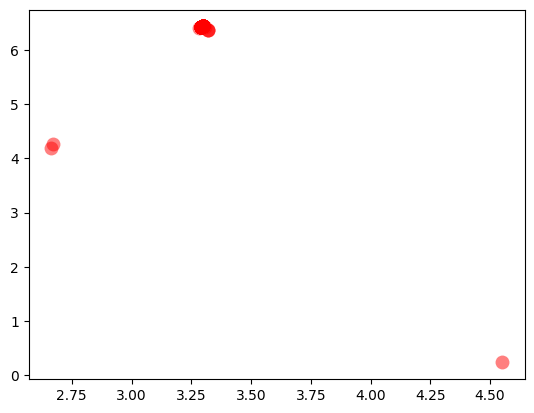

Time for Generation 93: 0.0584 seconds
Generation: 94
Max F_values: 640.8185255578868


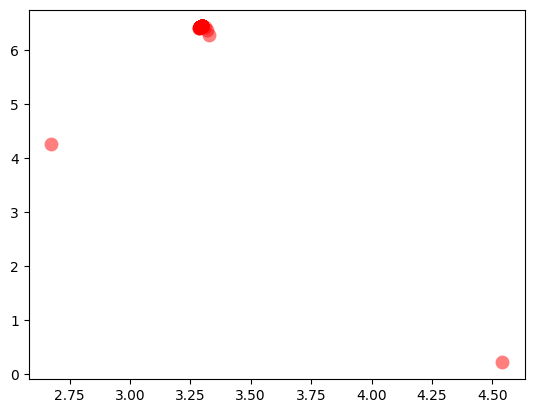

Time for Generation 94: 0.0614 seconds
Generation: 95
Max F_values: 642.5700501042563


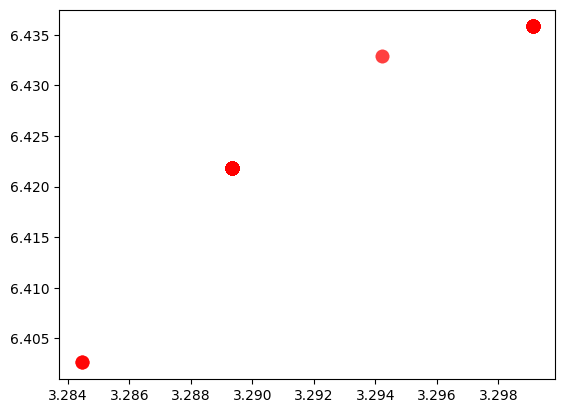

Time for Generation 95: 0.0634 seconds
Generation: 96
Max F_values: 642.5700501042563


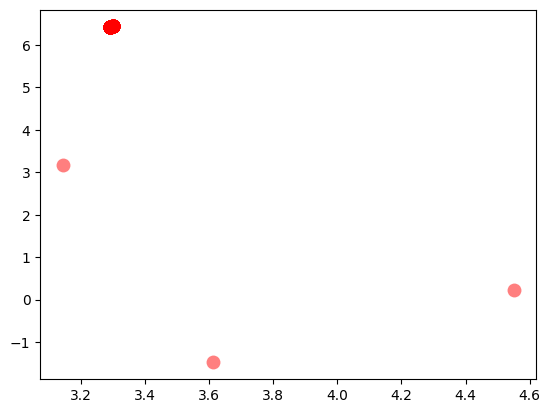

Time for Generation 96: 0.0582 seconds
Generation: 97
Max F_values: 642.5700501042563


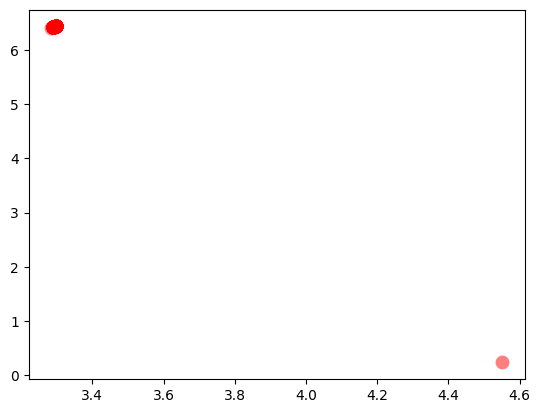

Time for Generation 97: 0.0577 seconds
Generation: 98
Max F_values: 642.5700501042563


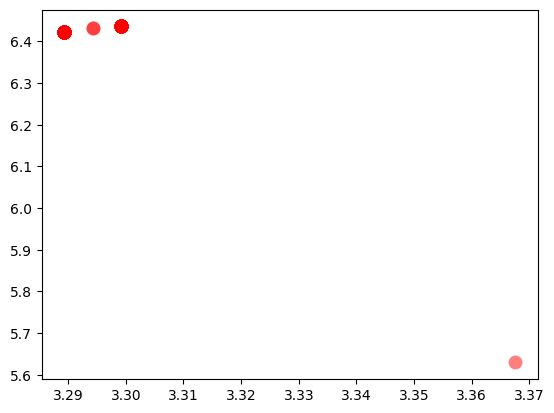

Time for Generation 98: 0.0596 seconds
Generation: 99
Max F_values: 642.5700501042563


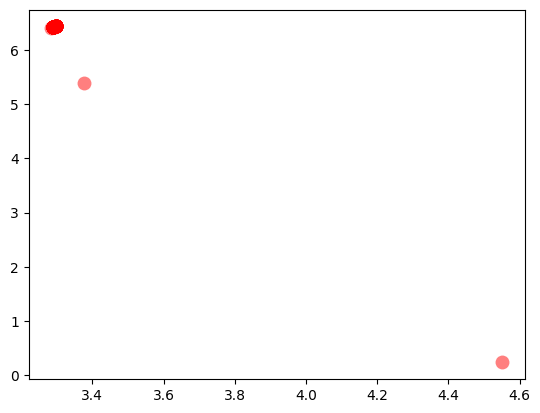

Time for Generation 99: 0.0660 seconds
Generation: 100
Max F_values: 642.5700501042563


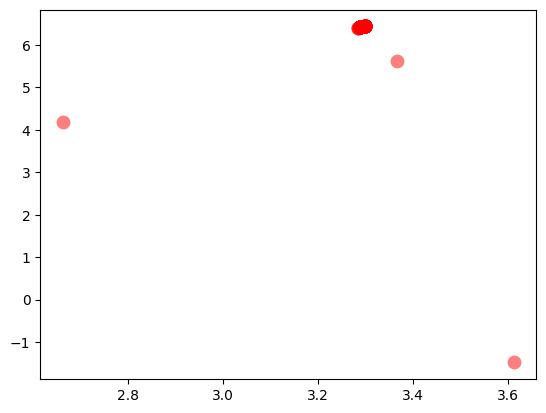

Time for Generation 100: 0.0512 seconds
Generation: 101
Max F_values: 642.5700501042563


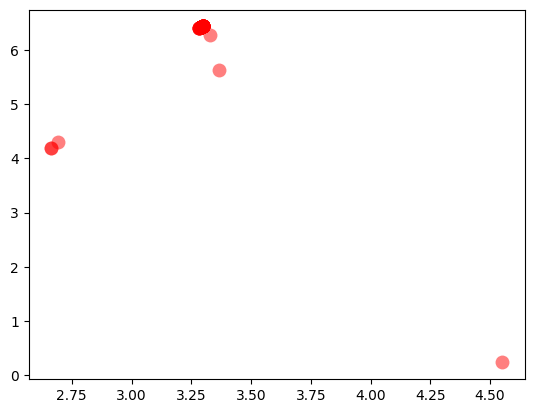

Time for Generation 101: 0.0587 seconds
Generation: 102
Max F_values: 642.5700501042563


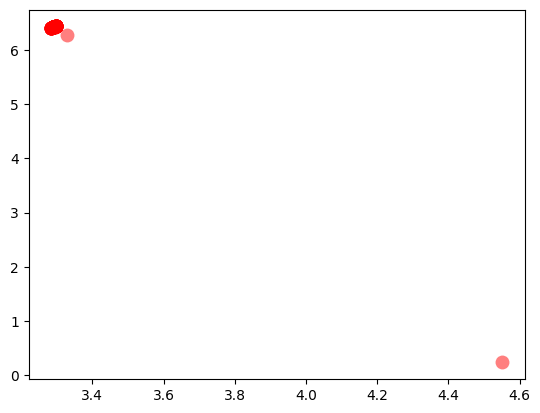

Time for Generation 102: 0.0604 seconds
Generation: 103
Max F_values: 642.5700501042563


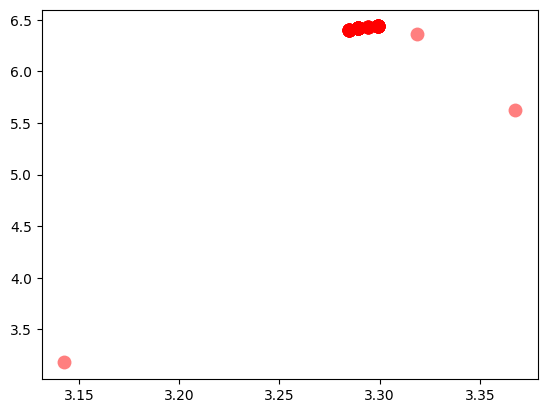

Time for Generation 103: 0.0663 seconds
Generation: 104
Max F_values: 642.5700501042563


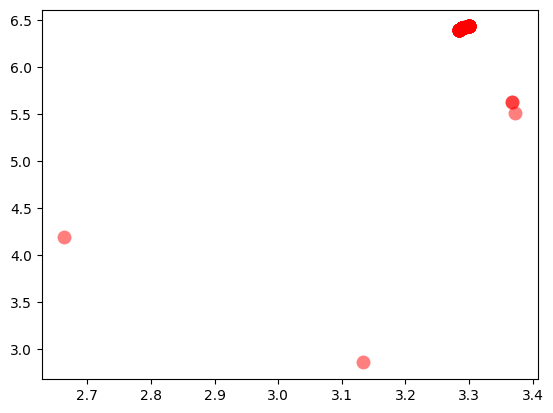

Time for Generation 104: 0.0640 seconds
Generation: 105
Max F_values: 642.5700501042563


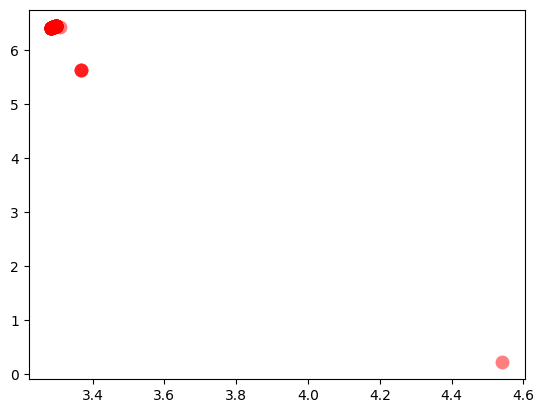

Time for Generation 105: 0.0496 seconds
Generation: 106
Max F_values: 642.5700501042563


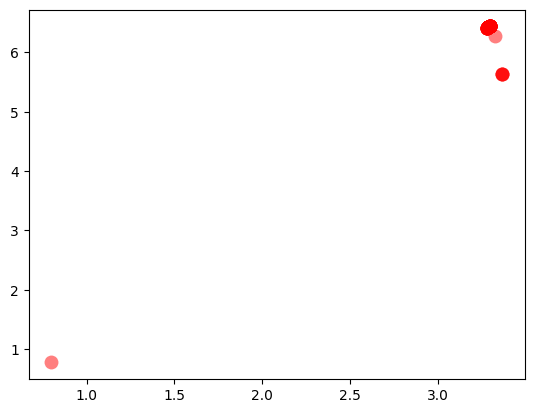

Time for Generation 106: 0.0620 seconds
Generation: 107
Max F_values: 642.5700501042563


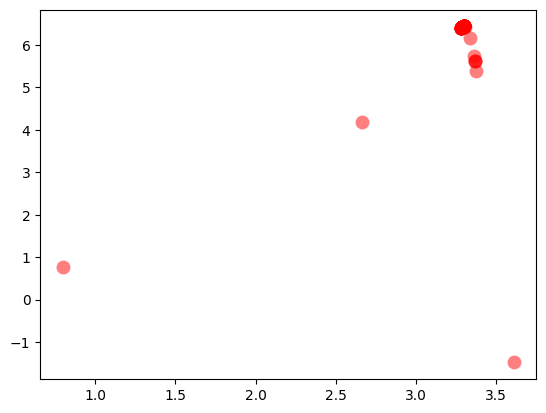

Time for Generation 107: 0.0551 seconds
Generation: 108
Max F_values: 642.5700501042563


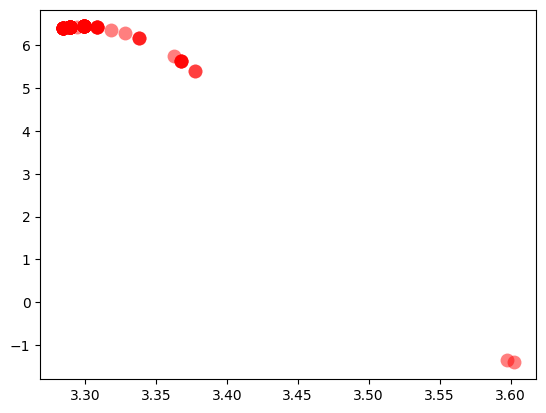

Time for Generation 108: 0.0644 seconds
Generation: 109
Max F_values: 642.5700501042563


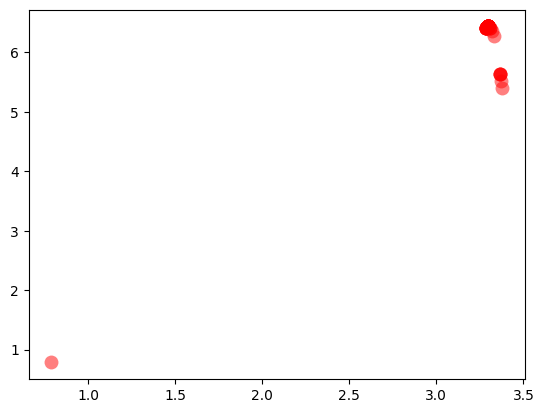

Time for Generation 109: 0.0696 seconds
Generation: 110
Max F_values: 642.5700501042563


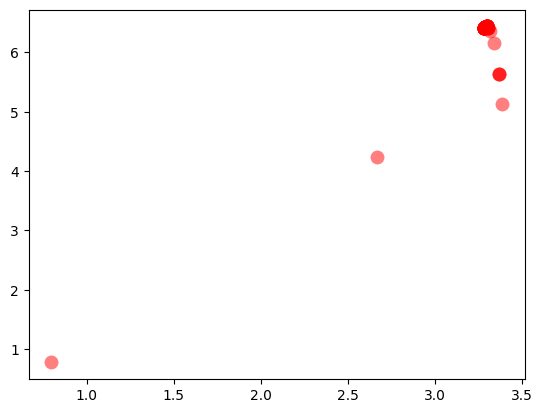

Time for Generation 110: 0.0579 seconds
Generation: 111
Max F_values: 642.5700501042563


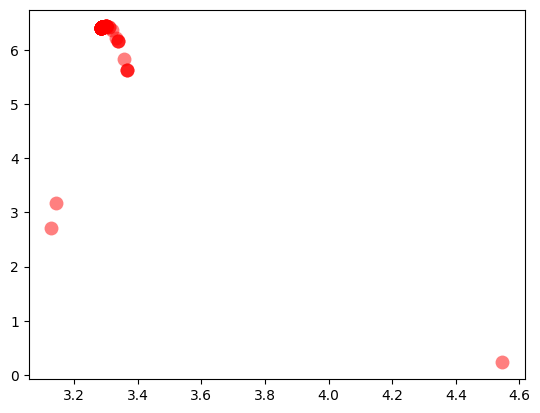

Time for Generation 111: 0.0579 seconds
Generation: 112
Max F_values: 642.5700501042563


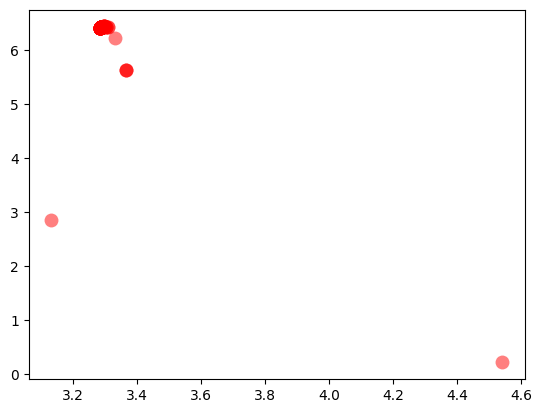

Time for Generation 112: 0.0998 seconds
Generation: 113
Max F_values: 642.5700501042563


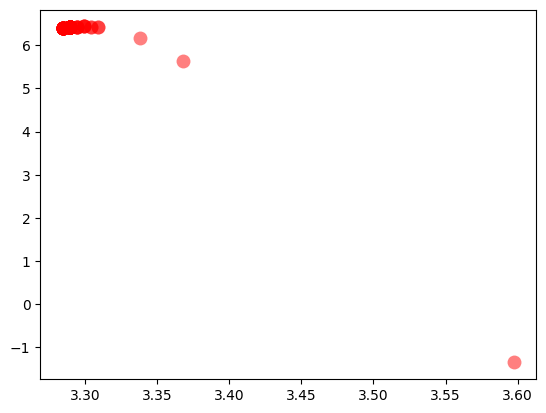

Time for Generation 113: 0.0600 seconds
Generation: 114
Max F_values: 642.5700501042563


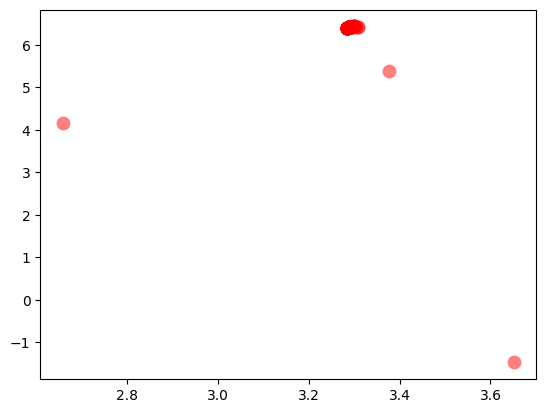

Time for Generation 114: 0.0567 seconds
Generation: 115
Max F_values: 642.5700501042563


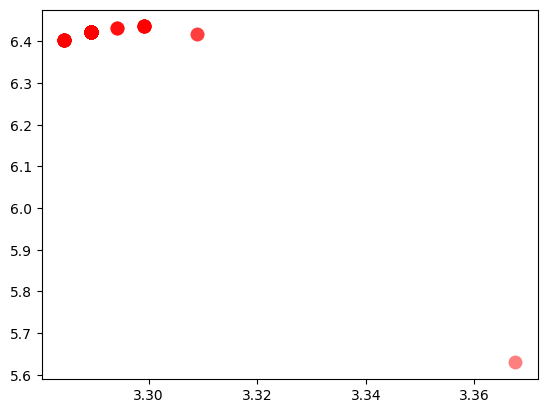

Time for Generation 115: 0.0835 seconds
Generation: 116
Max F_values: 642.5700501042563


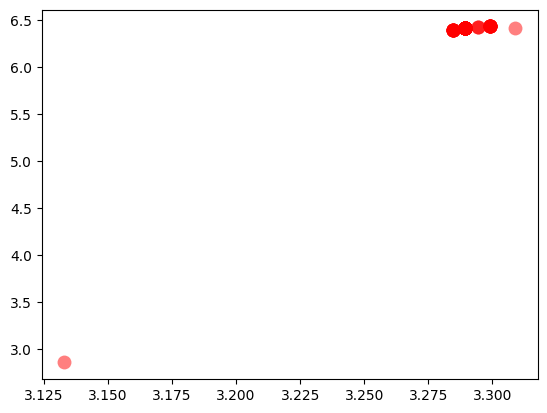

Time for Generation 116: 0.0624 seconds
Generation: 117
Max F_values: 642.5700501042563


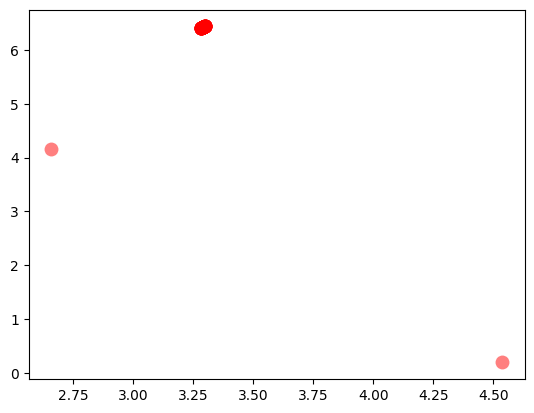

Time for Generation 117: 0.0539 seconds
Generation: 118
Max F_values: 642.5700501042563


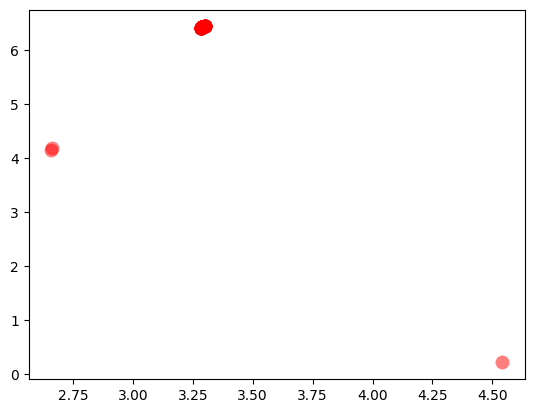

Time for Generation 118: 0.0499 seconds
Generation: 119
Max F_values: 642.5700501042563


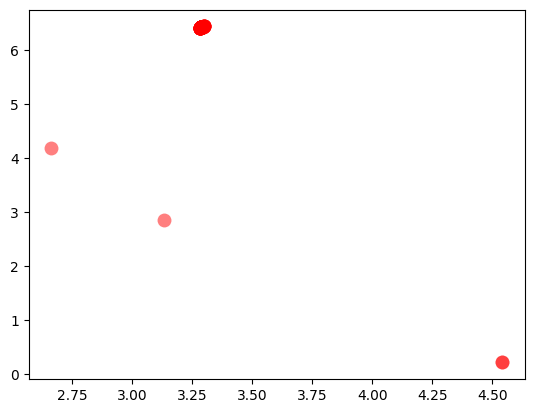

Time for Generation 119: 0.0675 seconds
Generation: 120
Max F_values: 642.5700501042563


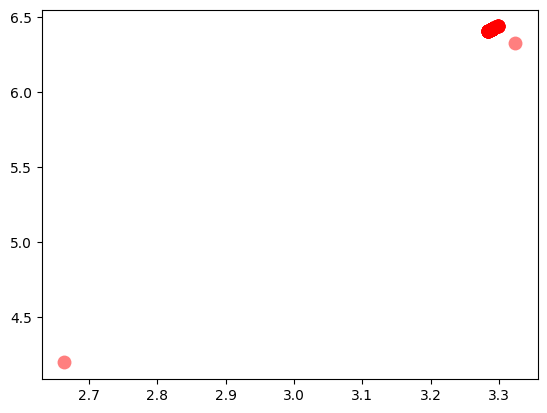

Time for Generation 120: 0.0608 seconds
Generation: 121
Max F_values: 642.5700501042563


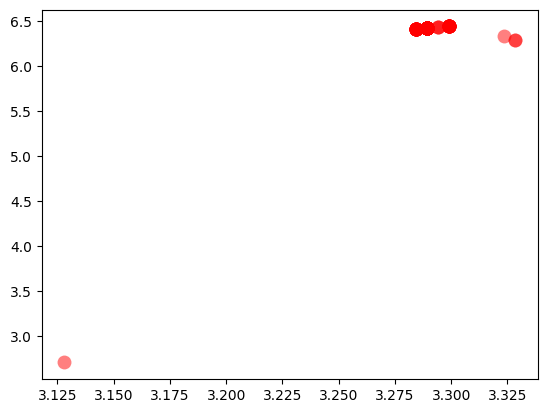

Time for Generation 121: 0.0723 seconds
Generation: 122
Max F_values: 642.5700501042563


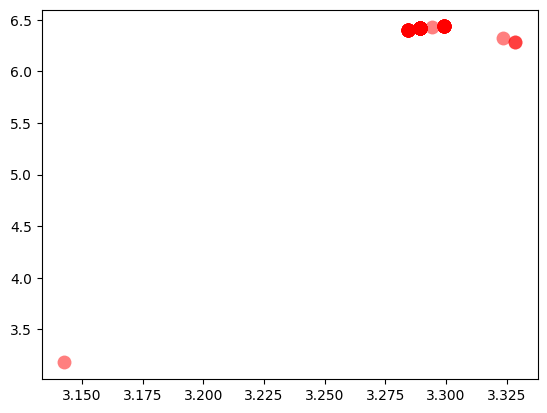

Time for Generation 122: 0.0663 seconds
Generation: 123
Max F_values: 642.5700501042563


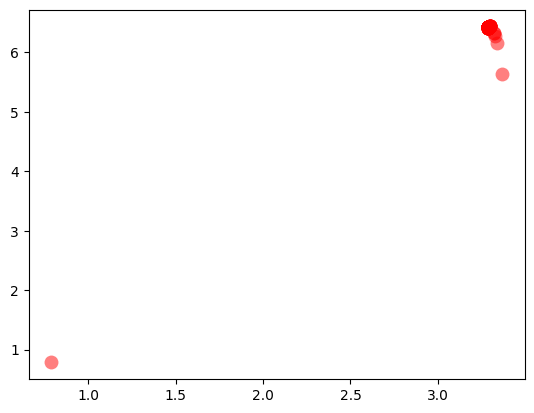

Time for Generation 123: 0.0603 seconds
Generation: 124
Max F_values: 642.5700501042563


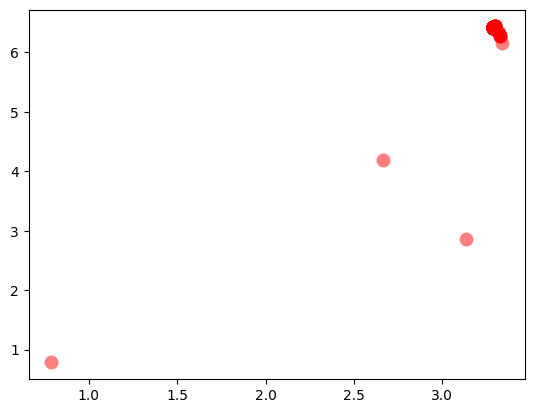

Time for Generation 124: 0.0394 seconds
Generation: 125
Max F_values: 642.5700501042563


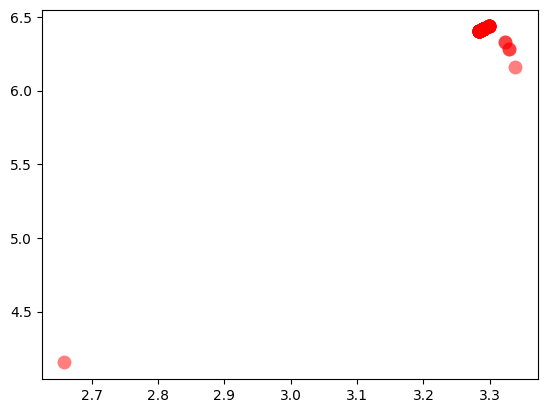

Time for Generation 125: 0.0694 seconds
Generation: 126
Max F_values: 642.5700501042563


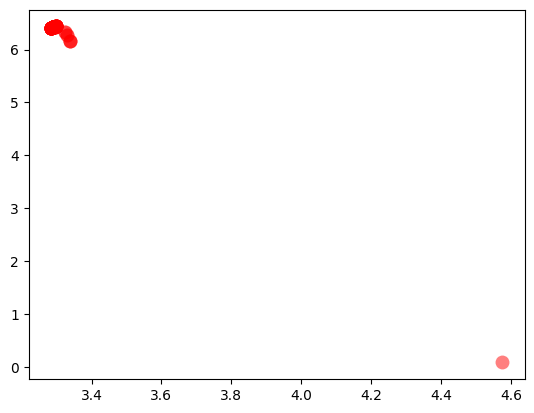

Time for Generation 126: 0.0476 seconds
Generation: 127
Max F_values: 642.5700501042563


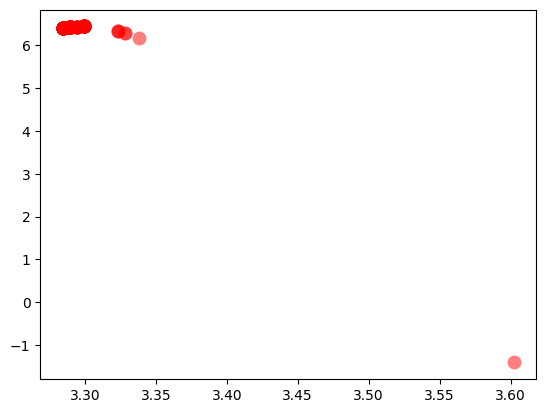

Time for Generation 127: 0.0667 seconds
Generation: 128
Max F_values: 642.5700501042563


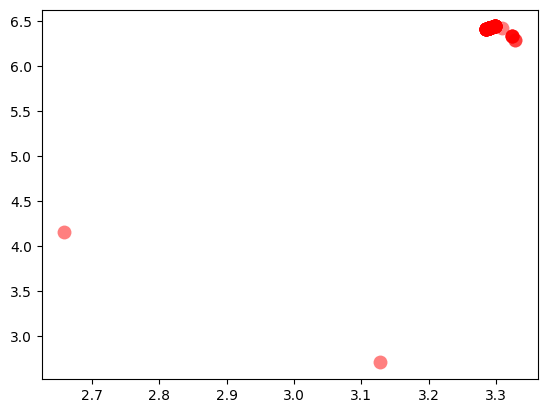

Time for Generation 128: 0.0496 seconds
Generation: 129
Max F_values: 642.5700501042563


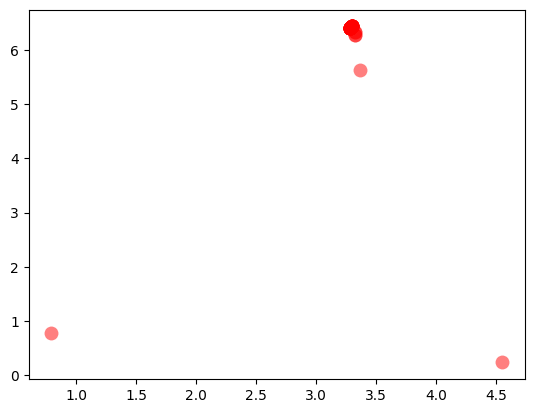

Time for Generation 129: 0.0675 seconds
Generation: 130
Max F_values: 642.5700501042563


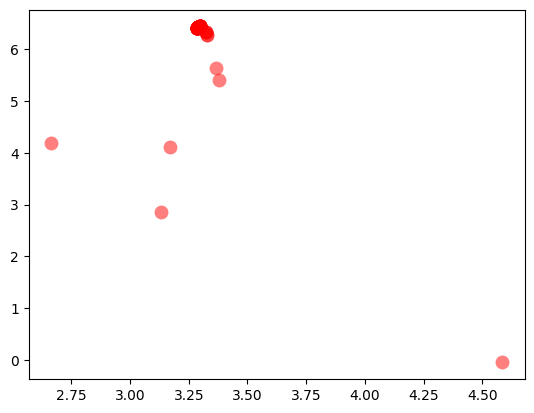

Time for Generation 130: 0.0595 seconds
Generation: 131
Max F_values: 642.5700501042563


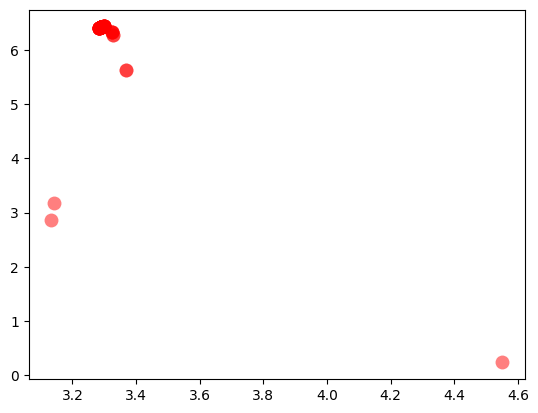

Time for Generation 131: 0.0742 seconds
Generation: 132
Max F_values: 642.5700501042563


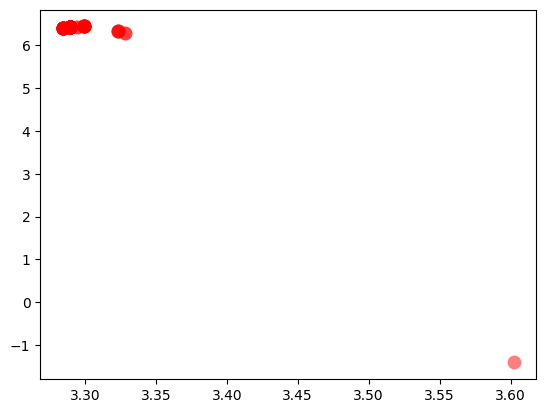

Time for Generation 132: 0.1163 seconds
Generation: 133
Max F_values: 642.5700501042563


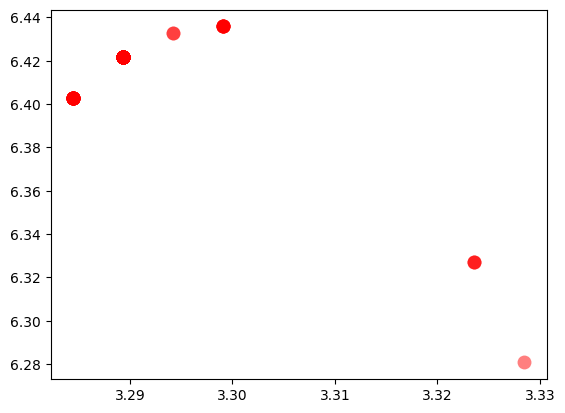

Time for Generation 133: 0.0667 seconds
Generation: 134
Max F_values: 642.5700501042563


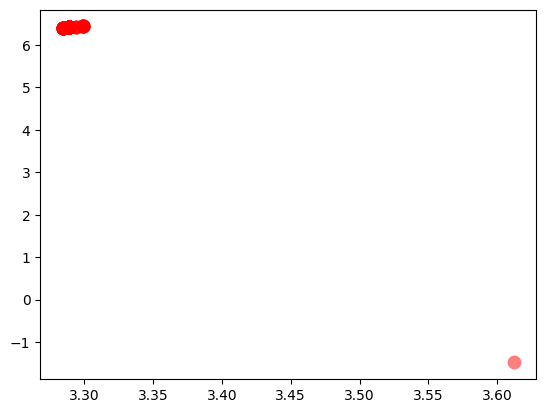

Time for Generation 134: 0.0604 seconds
Generation: 135
Max F_values: 642.5700501042563


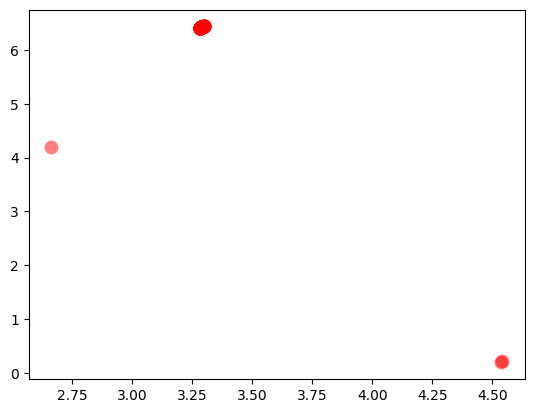

Time for Generation 135: 0.0563 seconds
Generation: 136
Max F_values: 642.5700501042563


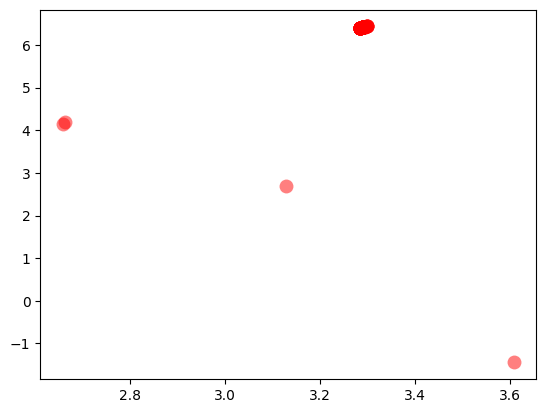

Time for Generation 136: 0.0534 seconds
Generation: 137
Max F_values: 642.5700501042563


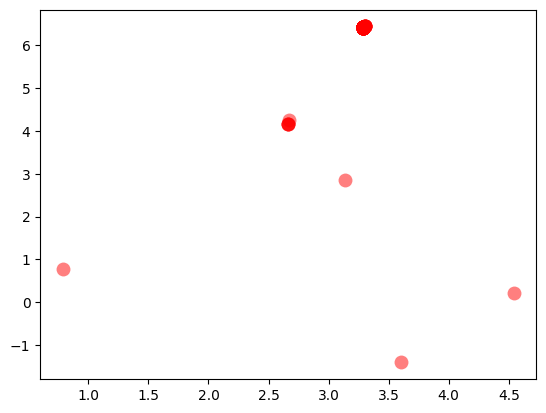

Time for Generation 137: 0.0798 seconds
Generation: 138
Max F_values: 642.5700501042563


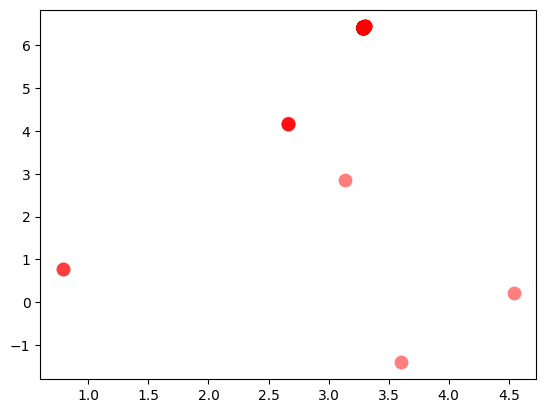

Time for Generation 138: 0.0660 seconds
Generation: 139
Max F_values: 642.5700501042563


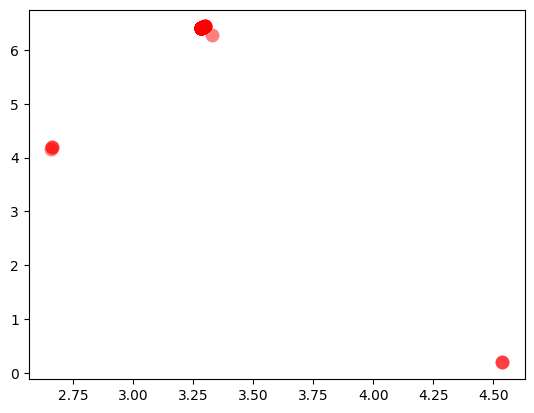

Time for Generation 139: 0.0609 seconds
Generation: 140
Max F_values: 642.5700501042563


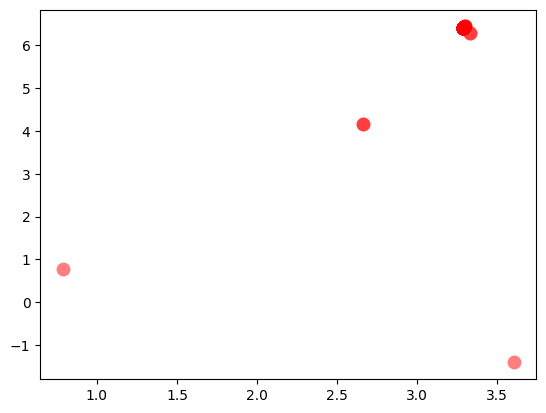

Time for Generation 140: 0.0563 seconds
Generation: 141
Max F_values: 642.5700501042563


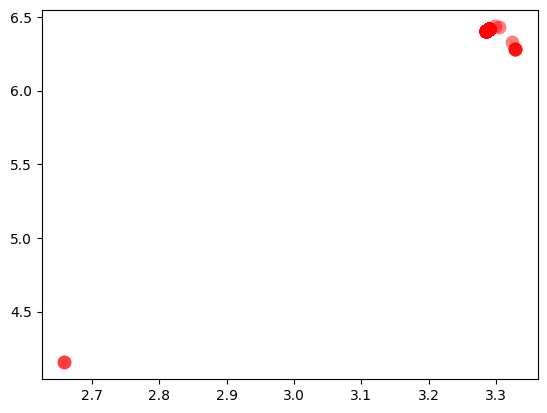

Time for Generation 141: 0.0494 seconds
Generation: 142
Max F_values: 642.5700501042563


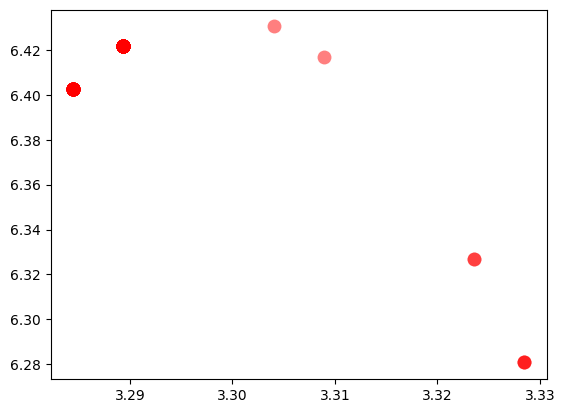

Time for Generation 142: 0.0681 seconds
Generation: 143
Max F_values: 642.5700501042563


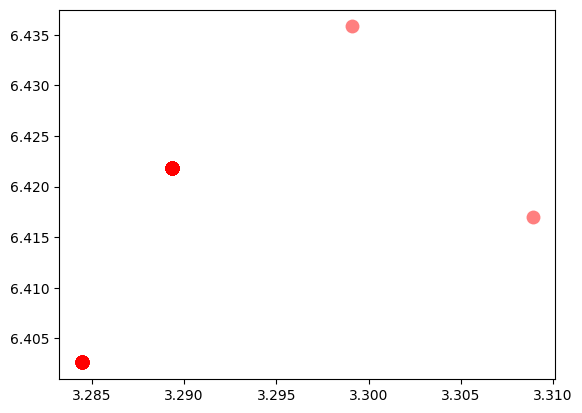

Time for Generation 143: 0.0575 seconds
Generation: 144
Max F_values: 642.5700501042563


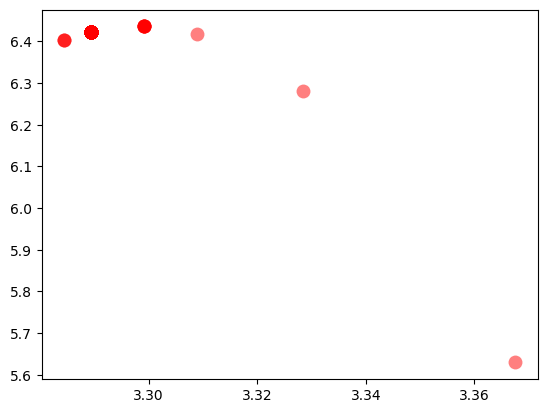

Time for Generation 144: 0.0605 seconds
Generation: 145
Max F_values: 642.5700501042563


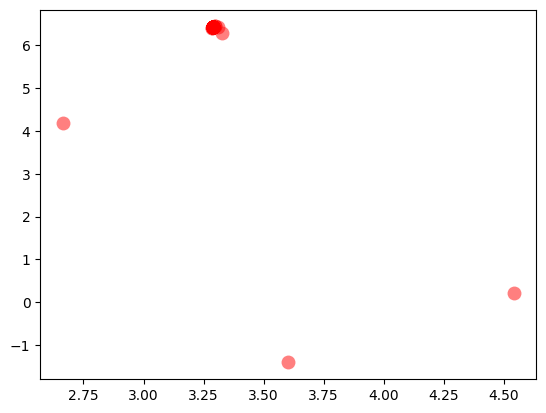

Time for Generation 145: 0.0740 seconds
Generation: 146
Max F_values: 642.5700501042563


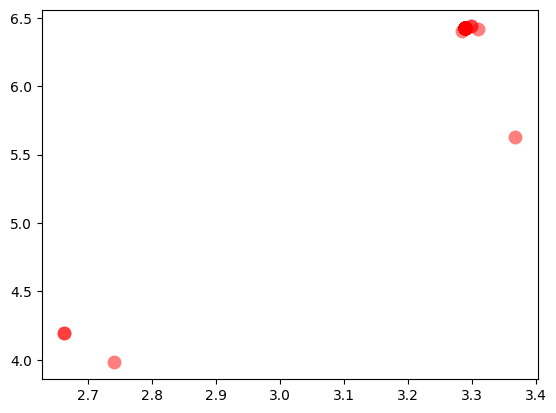

Time for Generation 146: 0.0570 seconds
Generation: 147
Max F_values: 642.5700501042563


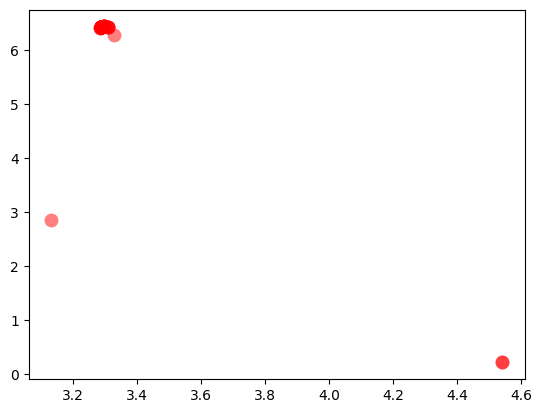

Time for Generation 147: 0.0664 seconds
Generation: 148
Max F_values: 642.5700501042563


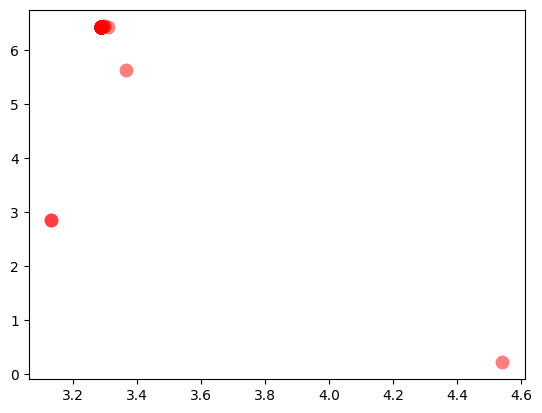

Time for Generation 148: 0.0608 seconds
Generation: 149
Max F_values: 642.5700501042563


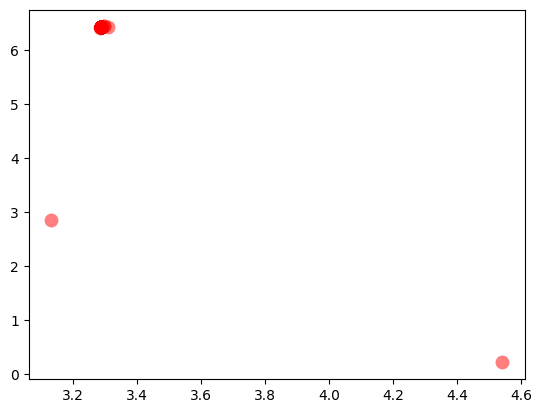

Time for Generation 149: 0.0559 seconds
Generation: 150
Max F_values: 642.5700501042563


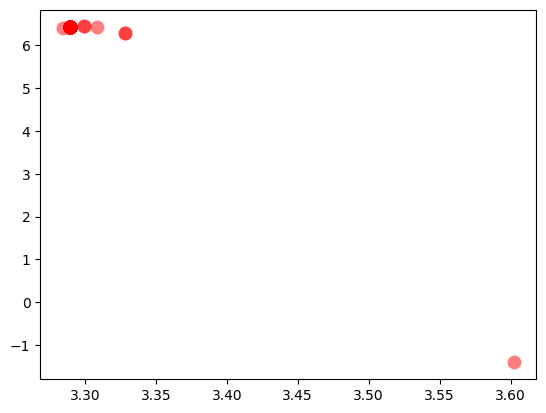

Time for Generation 150: 0.0665 seconds
Generation: 151
Max F_values: 642.5700501042563


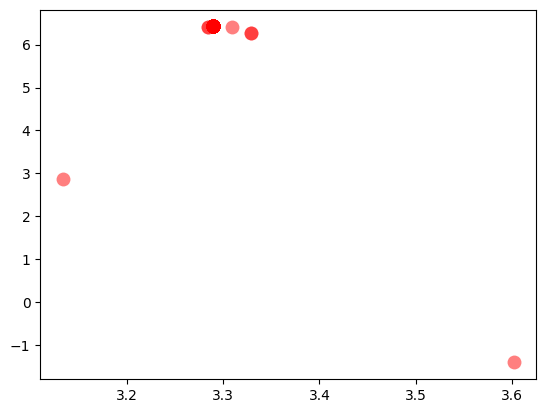

Time for Generation 151: 0.0500 seconds
Generation: 152
Max F_values: 642.5700501042563


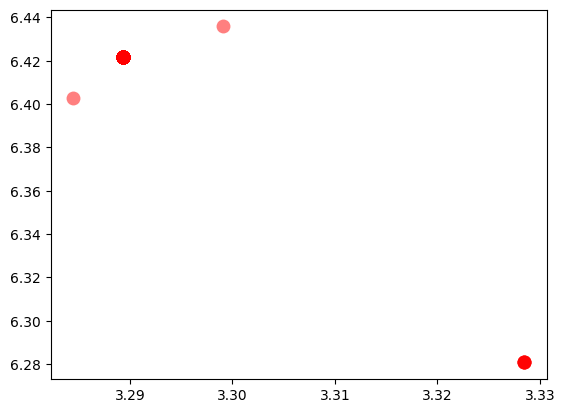

Time for Generation 152: 0.1210 seconds
Generation: 153
Max F_values: 642.5700501042563


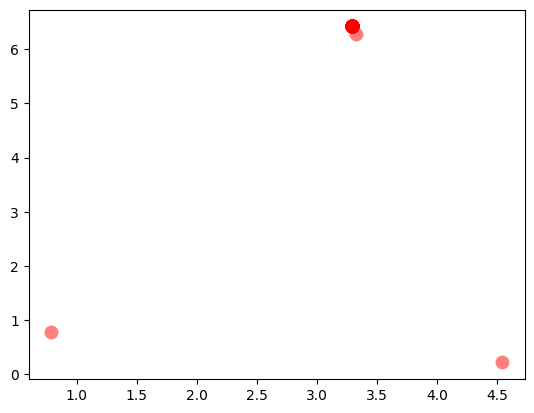

Time for Generation 153: 0.0630 seconds
Generation: 154
Max F_values: 642.5700501042563


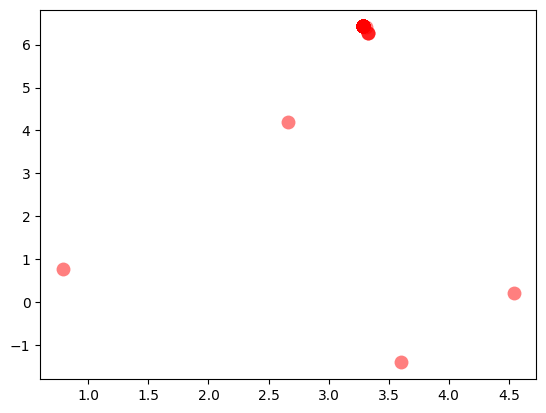

Time for Generation 154: 0.0659 seconds
Generation: 155
Max F_values: 642.5700501042563


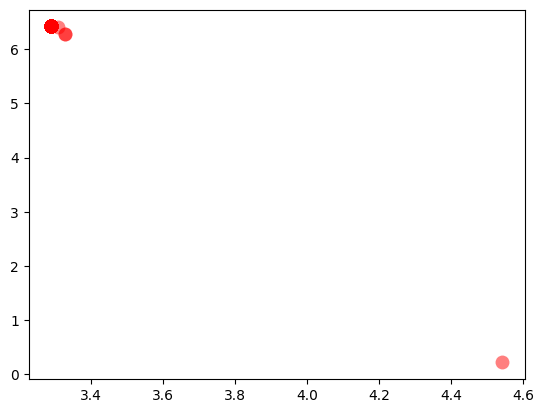

Time for Generation 155: 0.0499 seconds
Generation: 156
Max F_values: 642.5700501042563


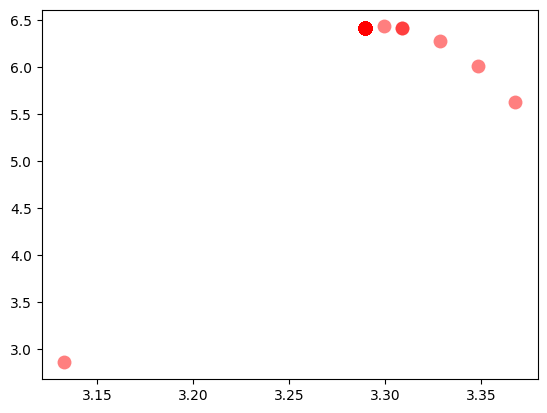

Time for Generation 156: 0.0667 seconds
Generation: 157
Max F_values: 642.5700501042563


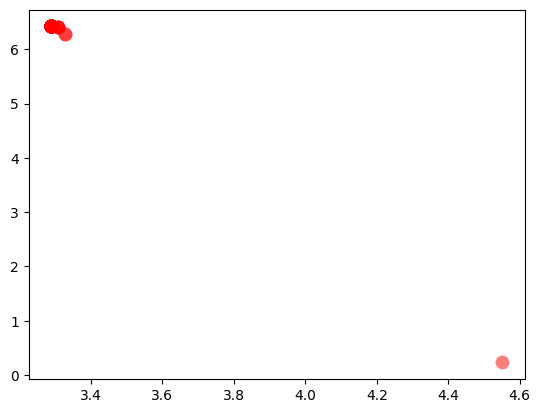

Time for Generation 157: 0.0703 seconds
Generation: 158
Max F_values: 642.5700501042563


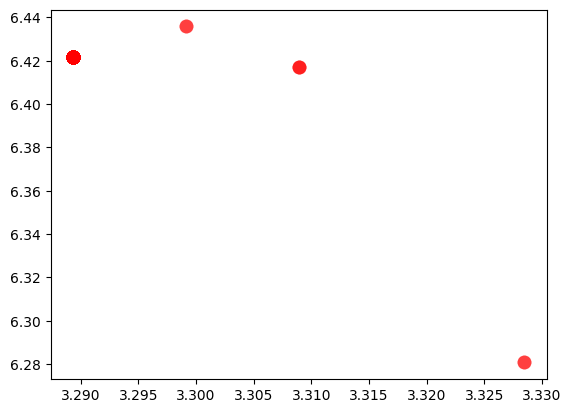

Time for Generation 158: 0.0640 seconds
Generation: 159
Max F_values: 642.5700501042563


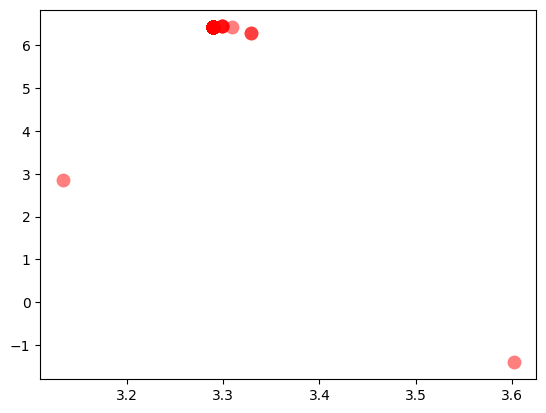

Time for Generation 159: 0.0654 seconds
Generation: 160
Max F_values: 642.5700501042563


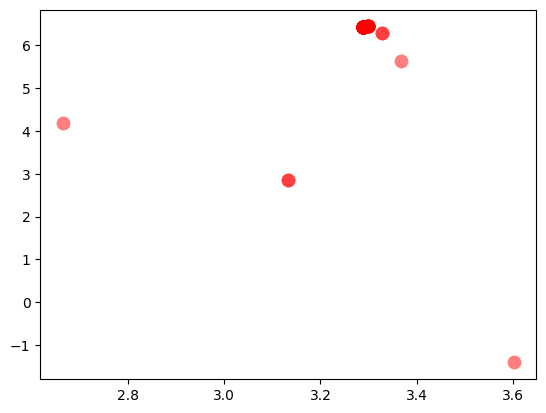

Time for Generation 160: 0.0513 seconds
Generation: 161
Max F_values: 642.5700501042563


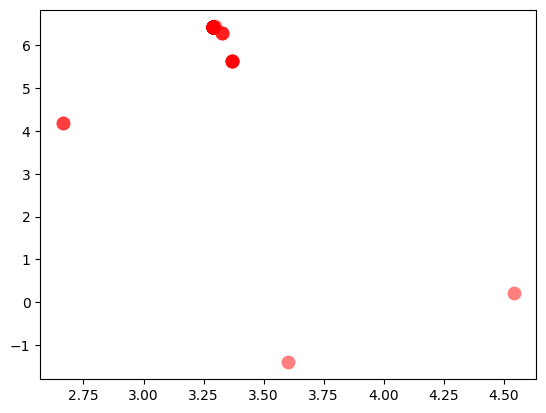

Time for Generation 161: 0.0825 seconds
Generation: 162
Max F_values: 642.5700501042563


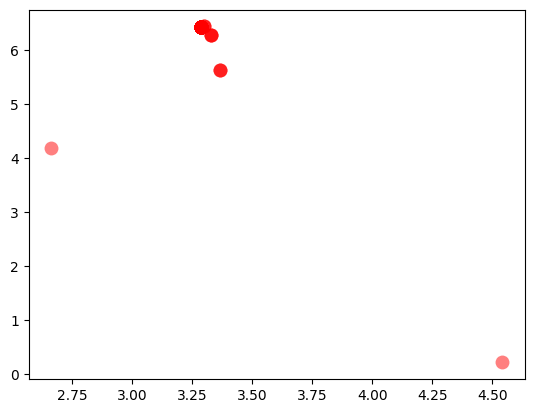

Time for Generation 162: 0.0603 seconds
Generation: 163
Max F_values: 642.5700501042563


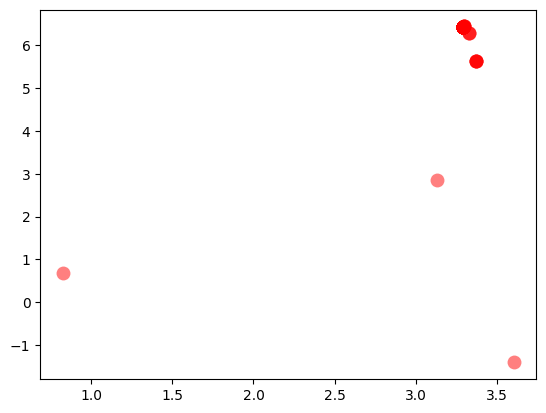

Time for Generation 163: 0.0576 seconds
Generation: 164
Max F_values: 642.5700501042563


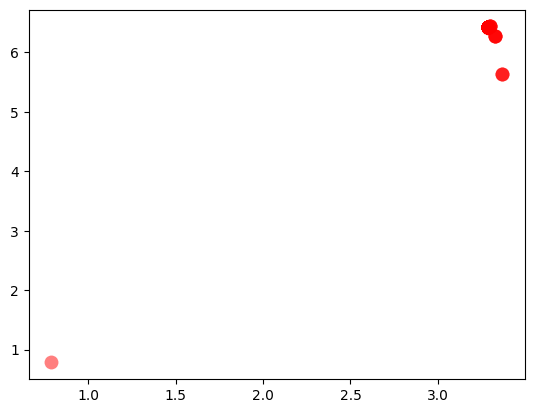

Time for Generation 164: 0.0482 seconds
Generation: 165
Max F_values: 642.5700501042563


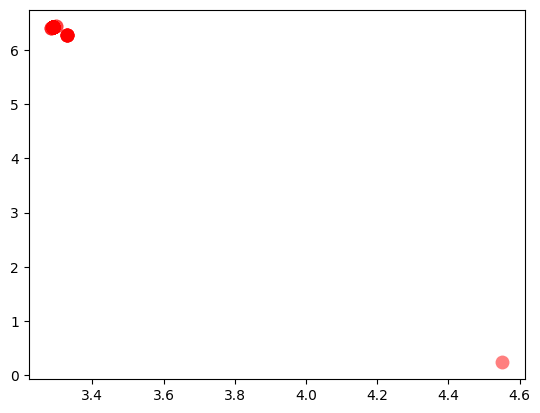

Time for Generation 165: 0.0621 seconds
Generation: 166
Max F_values: 642.5700501042563


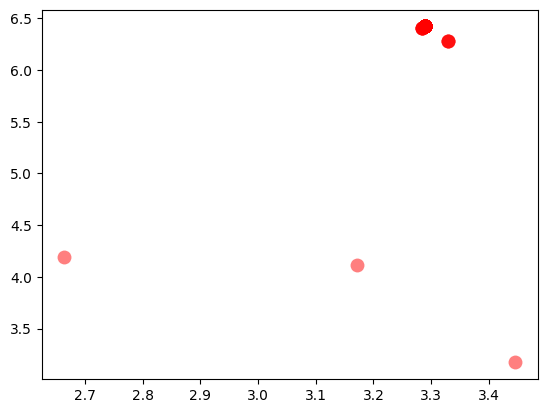

Time for Generation 166: 0.0551 seconds
Generation: 167
Max F_values: 642.5700501042563


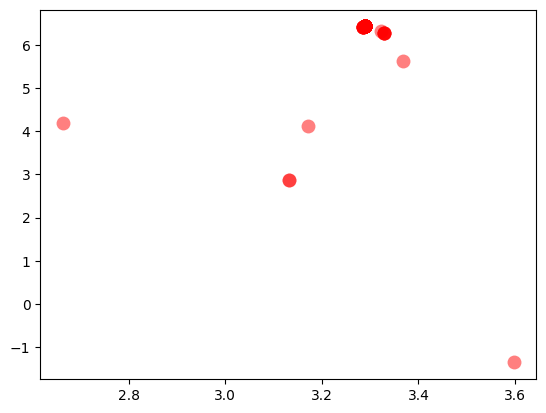

Time for Generation 167: 0.0499 seconds
Generation: 168
Max F_values: 642.5700501042563


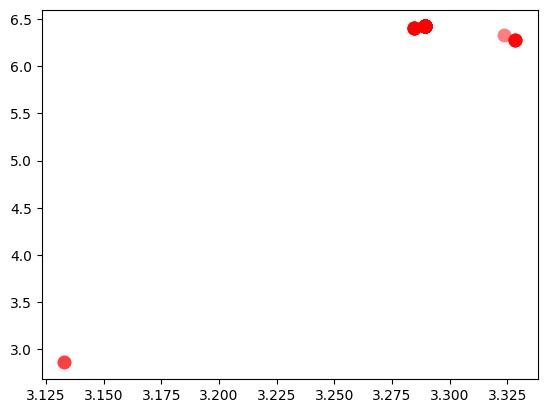

Time for Generation 168: 0.0793 seconds
Generation: 169
Max F_values: 642.5700501042563


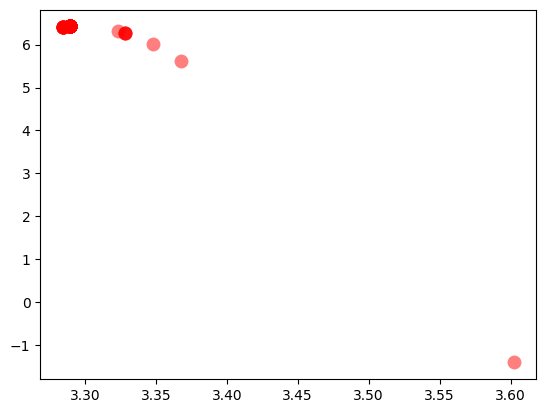

Time for Generation 169: 0.0708 seconds
Generation: 170
Max F_values: 642.5700501042563


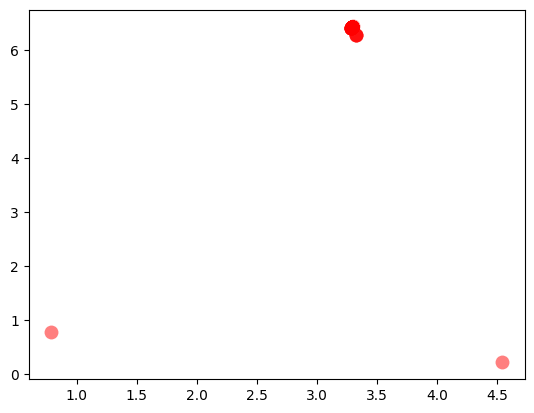

Time for Generation 170: 0.0661 seconds
Generation: 171
Max F_values: 642.5700501042563


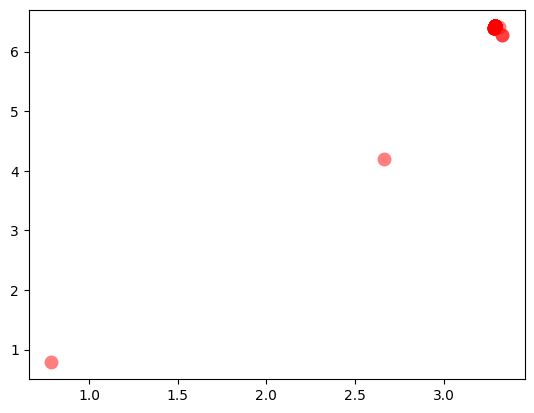

Time for Generation 171: 0.0499 seconds
Generation: 172
Max F_values: 642.5700501042563


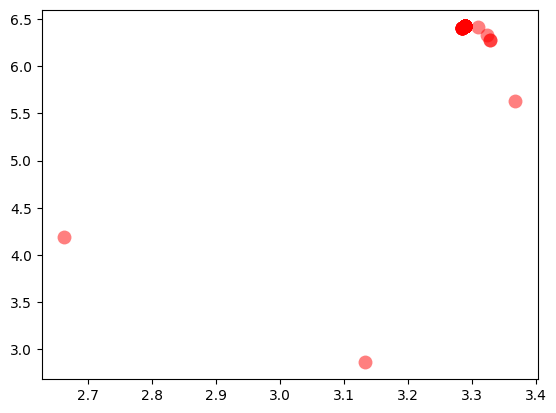

Time for Generation 172: 0.1030 seconds
Generation: 173
Max F_values: 642.5700501042563


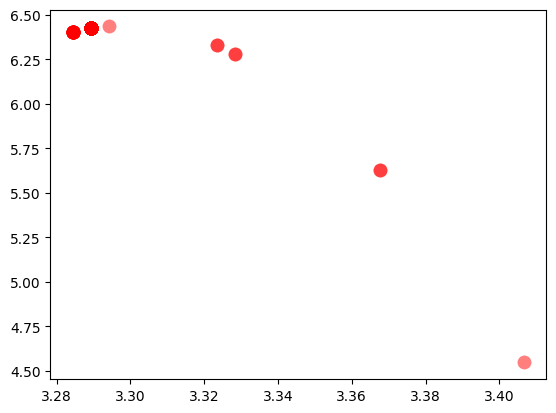

Time for Generation 173: 0.0637 seconds
Generation: 174
Max F_values: 642.5700501042563


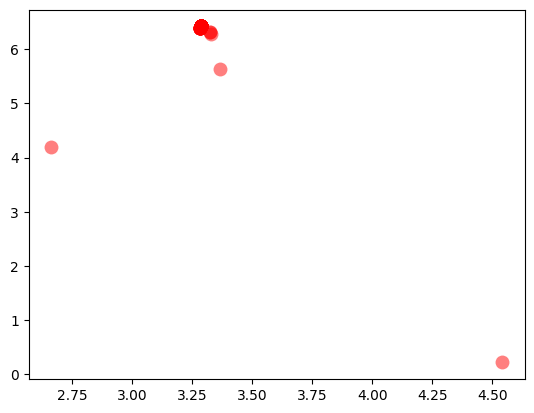

Time for Generation 174: 0.0975 seconds
Generation: 175
Max F_values: 642.5700501042563


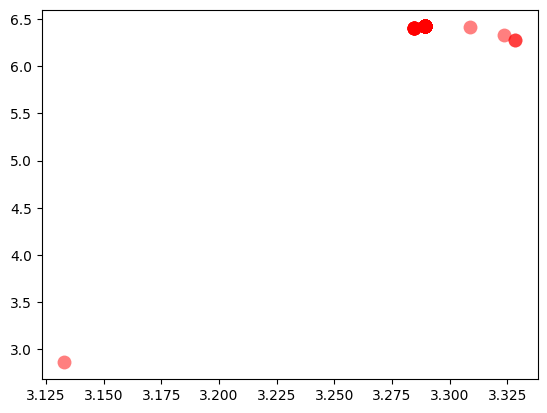

Time for Generation 175: 0.0695 seconds
Generation: 176
Max F_values: 642.5700501042563


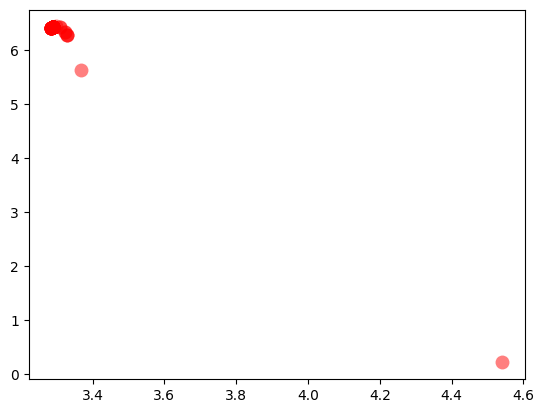

Time for Generation 176: 0.0670 seconds
Generation: 177
Max F_values: 642.5700501042563


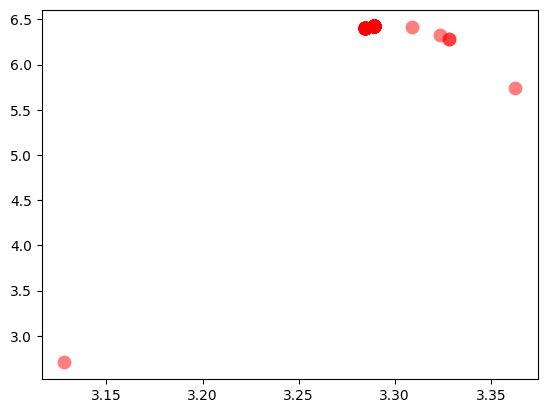

Time for Generation 177: 0.0497 seconds
Generation: 178
Max F_values: 642.5700501042563


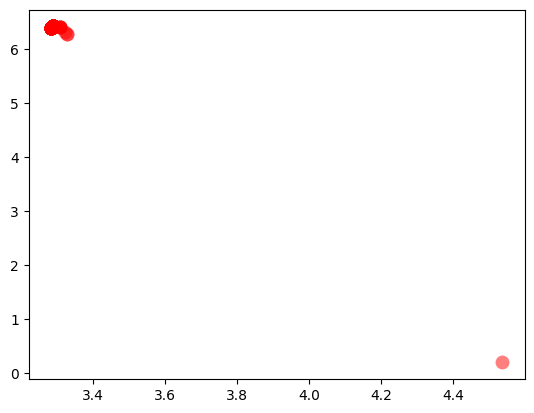

Time for Generation 178: 0.0668 seconds
Generation: 179
Max F_values: 642.5700501042563


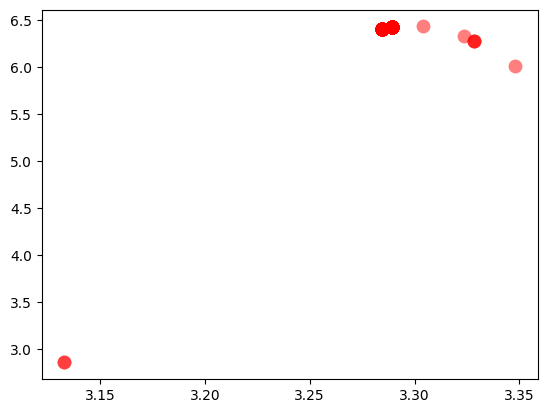

Time for Generation 179: 0.0593 seconds
Generation: 180
Max F_values: 642.5700501042563


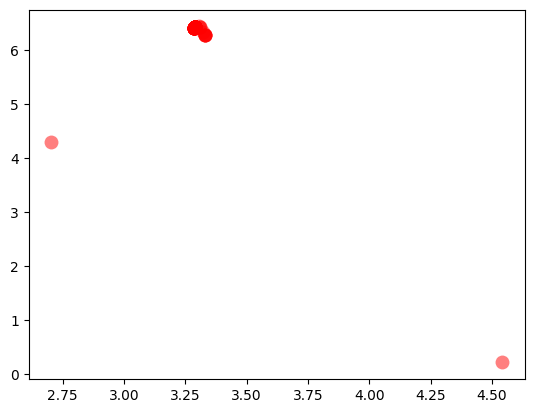

Time for Generation 180: 0.0743 seconds
Generation: 181
Max F_values: 642.5700501042563


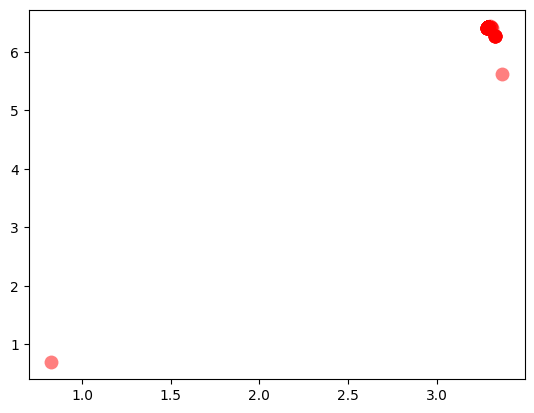

Time for Generation 181: 0.0494 seconds
Generation: 182
Max F_values: 642.5700501042563


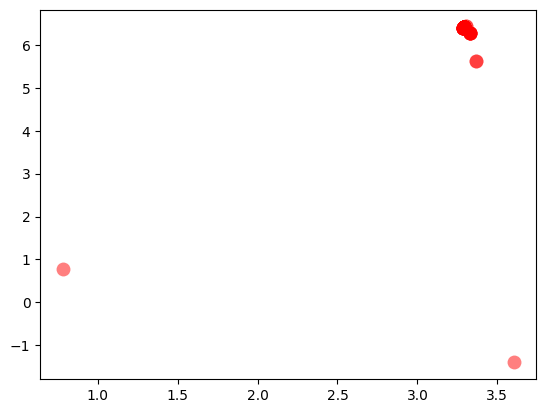

Time for Generation 182: 0.0663 seconds
Generation: 183
Max F_values: 642.5700501042563


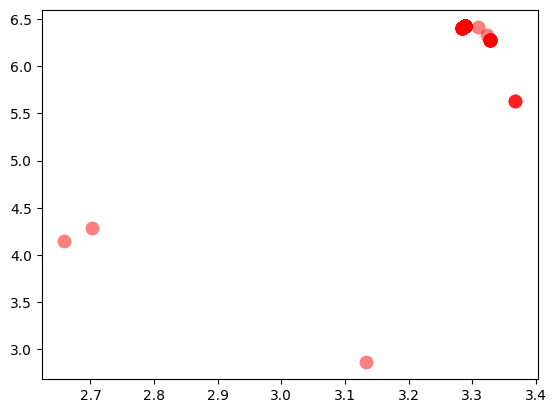

Time for Generation 183: 0.0667 seconds
Generation: 184
Max F_values: 642.5700501042563


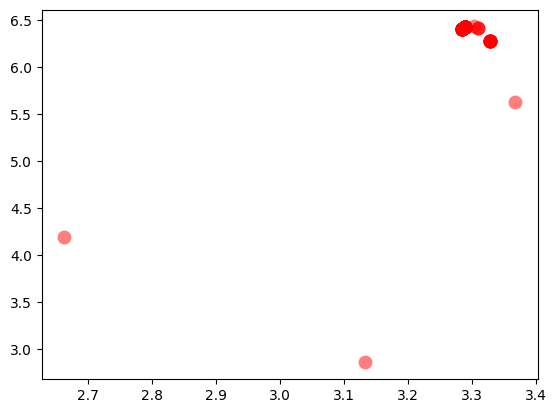

Time for Generation 184: 0.0796 seconds
Generation: 185
Max F_values: 642.5700501042563


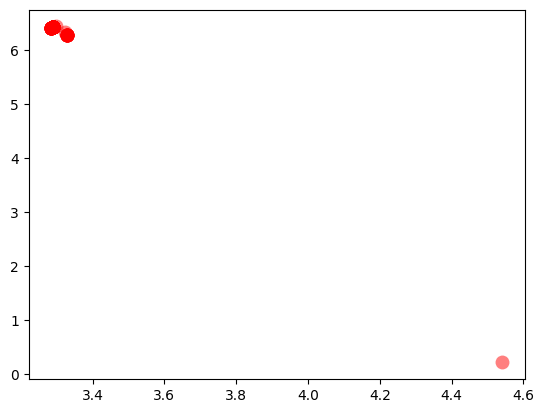

Time for Generation 185: 0.0643 seconds
Generation: 186
Max F_values: 642.5700501042563


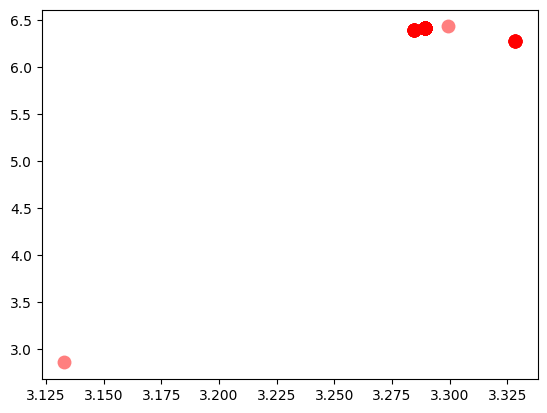

Time for Generation 186: 0.0562 seconds
Generation: 187
Max F_values: 642.5700501042563


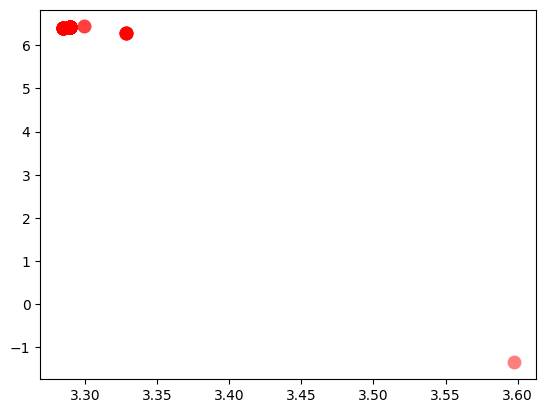

Time for Generation 187: 0.0665 seconds
Generation: 188
Max F_values: 642.5700501042563


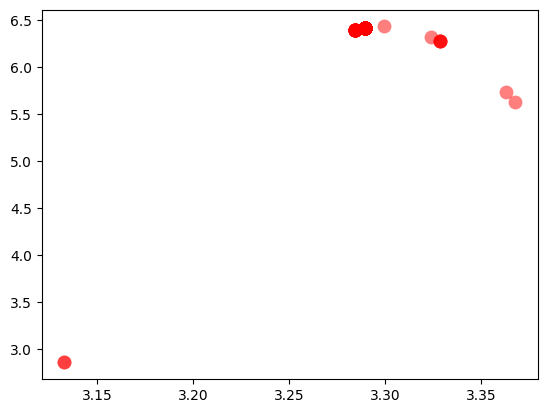

Time for Generation 188: 0.0503 seconds
Generation: 189
Max F_values: 642.5700501042563


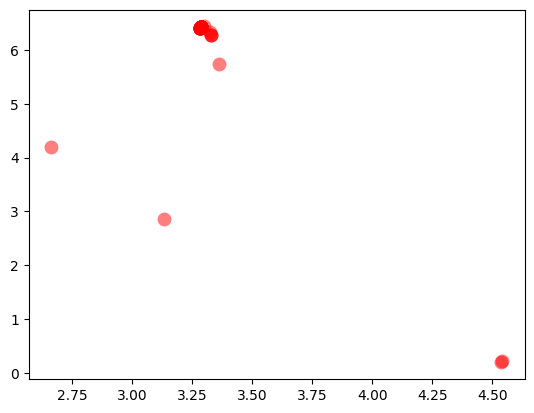

Time for Generation 189: 0.0666 seconds
Generation: 190
Max F_values: 642.5700501042563


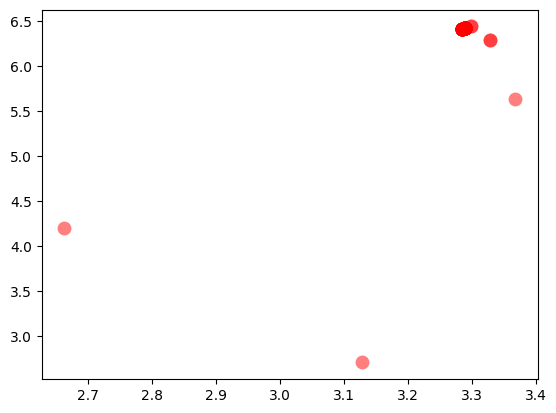

Time for Generation 190: 0.0666 seconds
Generation: 191
Max F_values: 642.5700501042563


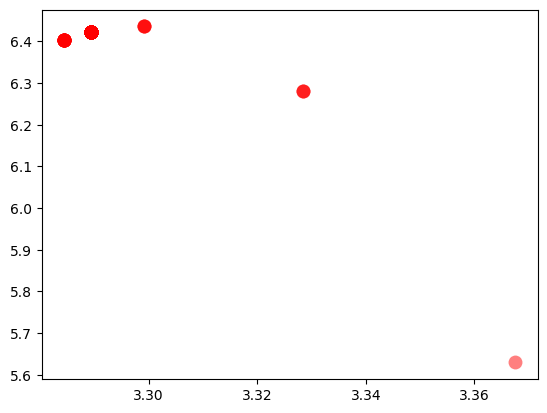

Time for Generation 191: 0.0505 seconds
Generation: 192
Max F_values: 642.5700501042563


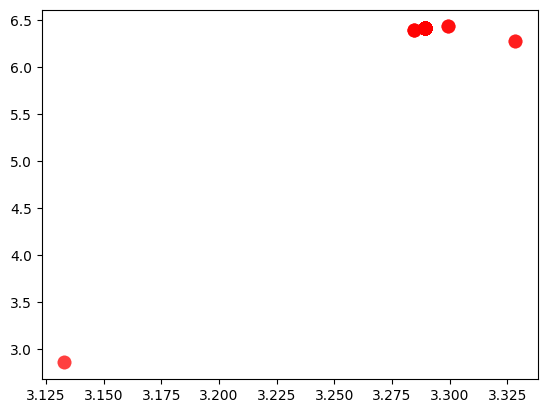

Time for Generation 192: 0.1161 seconds
Generation: 193
Max F_values: 642.5700501042563


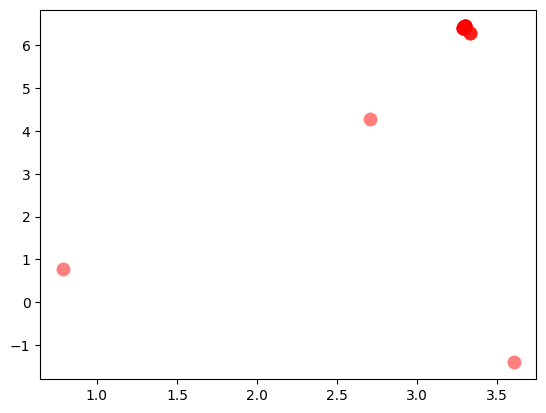

Time for Generation 193: 0.0573 seconds
Generation: 194
Max F_values: 642.5700501042563


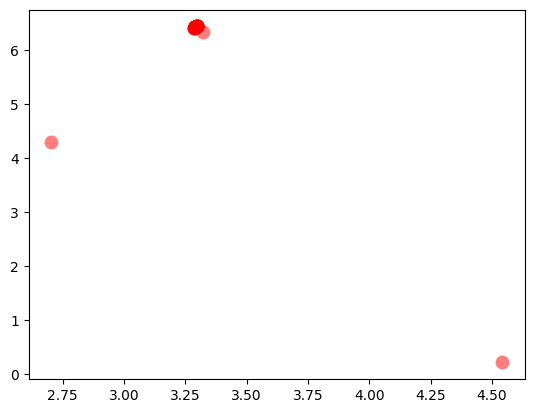

Time for Generation 194: 0.0600 seconds
Generation: 195
Max F_values: 642.5700501042563


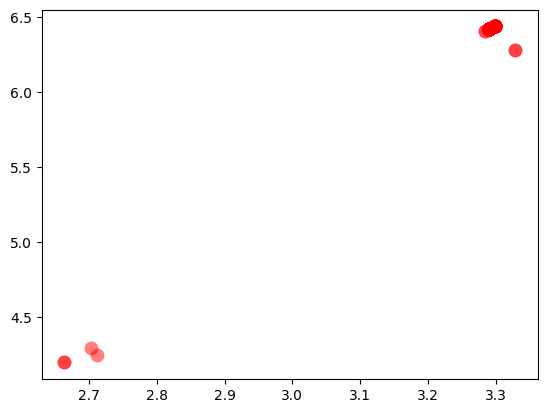

Time for Generation 195: 0.0658 seconds
Generation: 196
Max F_values: 642.5700501042563


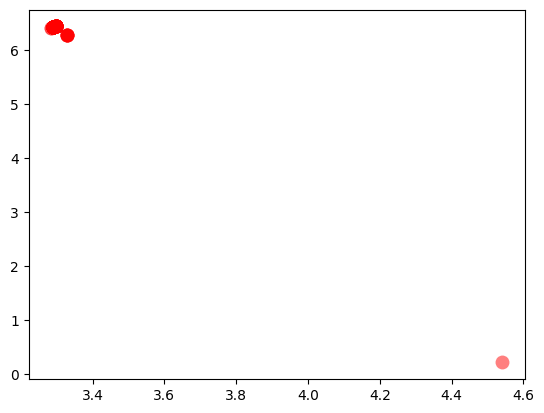

Time for Generation 196: 0.0504 seconds
Generation: 197
Max F_values: 642.5700501042563


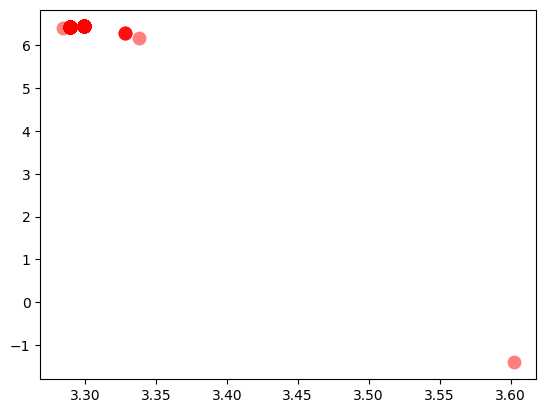

Time for Generation 197: 0.0498 seconds
Generation: 198
Max F_values: 642.5700501042563


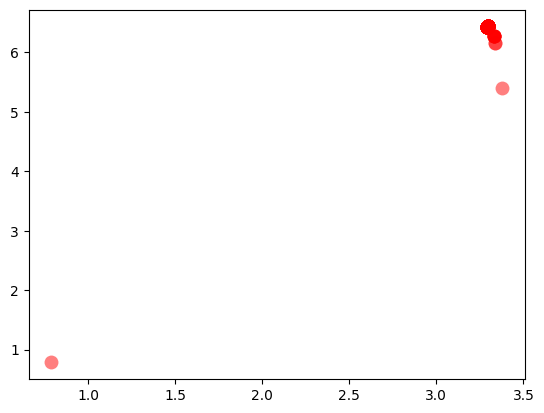

Time for Generation 198: 0.0667 seconds
Generation: 199
Max F_values: 642.5700501042563


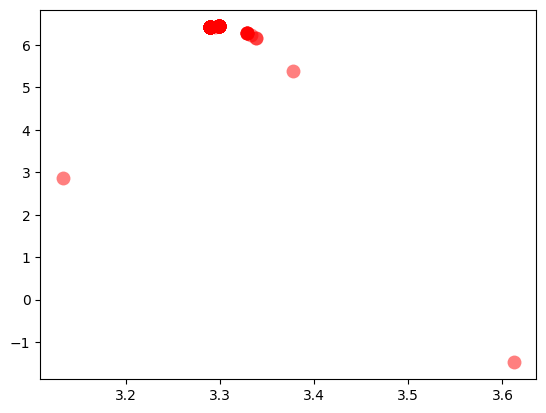

Time for Generation 199: 0.0611 seconds


([np.float64(-114.97602322942578),
  np.float64(-3.528797550440612),
  np.float64(88.54694328589062),
  np.float64(160.21977220189612),
  np.float64(219.75075535197095),
  np.float64(254.71066462200676),
  np.float64(359.7327170042645),
  np.float64(451.01444971848815),
  np.float64(477.63127215241724),
  np.float64(538.0785330661513),
  np.float64(536.796405959184),
  np.float64(572.7525189970803),
  np.float64(567.9551165968315),
  np.float64(557.7223928813019),
  np.float64(550.7460808215257),
  np.float64(575.3058213249758),
  np.float64(595.3233149286242),
  np.float64(595.1132937913497),
  np.float64(606.5913647715632),
  np.float64(615.5639046143913),
  np.float64(609.9460978756917),
  np.float64(595.759669492012),
  np.float64(624.0518680505286),
  np.float64(615.582140367009),
  np.float64(621.2910463794831),
  np.float64(615.4863565240069),
  np.float64(610.6313764681036),
  np.float64(626.5480253282825),
  np.float64(619.5935038814382),
  np.float64(623.3890775434313),
  np.

In [26]:
performance, time_per_iteration = GA(N_GENERATIONS, pop)
performance, time_per_iteration

## HW3.8 Performance Visualization
Generates a line plot using matplotlib or other tool to visualize the performance of the genetic algorithm over multiple generations.

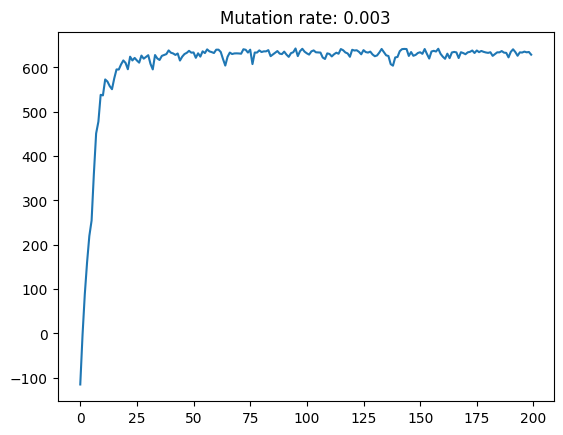

In [27]:
# TODO: Generates a line plot to visualize the genetic algorithm's performance across generations.
plt.title(f"Mutation rate: {MUTATION_RATE}")
plt.plot(range(N_GENERATIONS), performance)
plt.show()

## HW3.9 Discuss1
Increase the mutation rate, follow the above steps, observe the performance, and provide a discussion.

Generation: 0
Max F_values: -114.97602322942578


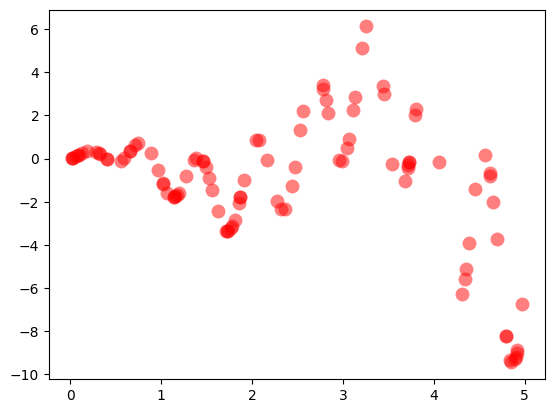

Time for Generation 0: 0.0688 seconds
Generation: 1
Max F_values: -20.624281204594872


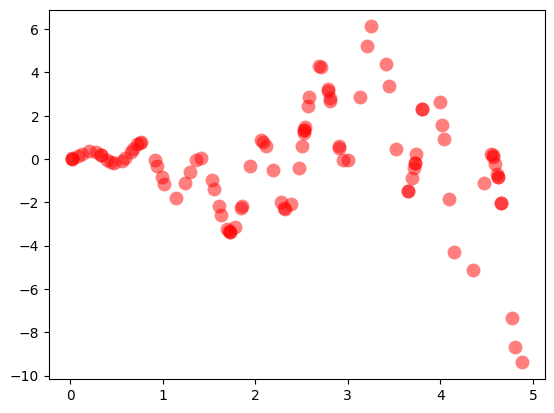

Time for Generation 1: 0.0624 seconds
Generation: 2
Max F_values: 62.823053430393244


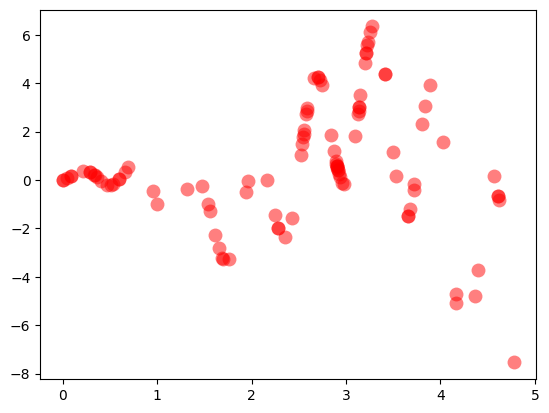

Time for Generation 2: 0.0604 seconds
Generation: 3
Max F_values: 140.12831066916598


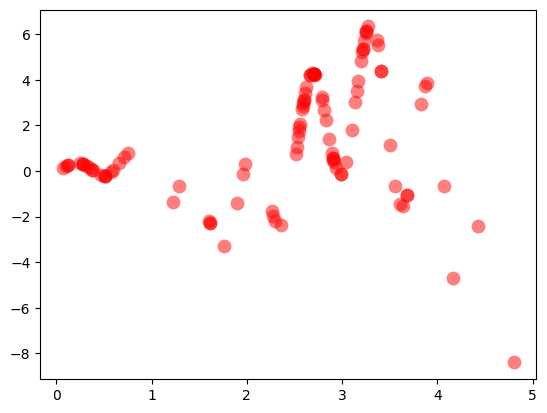

Time for Generation 3: 0.0629 seconds
Generation: 4
Max F_values: 140.12831066916598


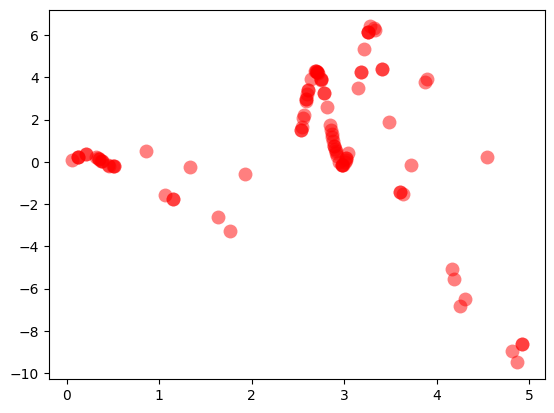

Time for Generation 4: 0.0561 seconds
Generation: 5
Max F_values: 167.1984521205431


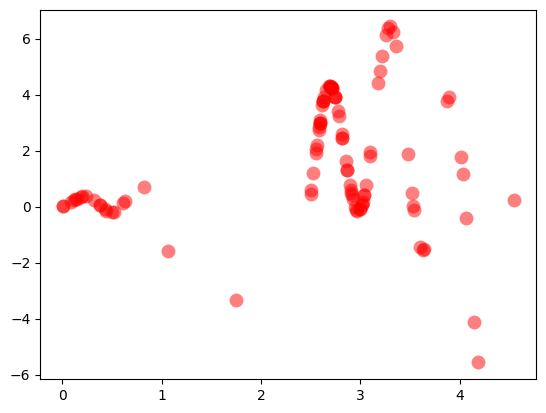

Time for Generation 5: 0.0526 seconds
Generation: 6
Max F_values: 201.1052804270365


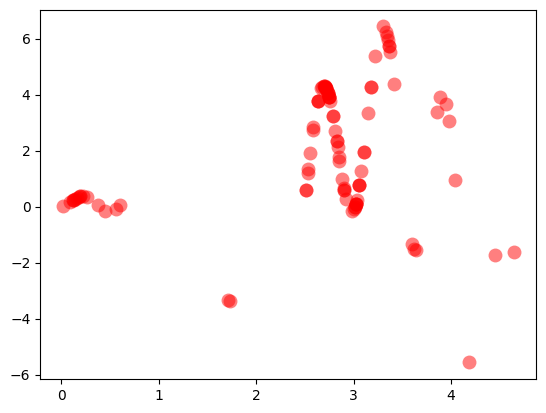

Time for Generation 6: 0.0583 seconds
Generation: 7
Max F_values: 269.0912694463737


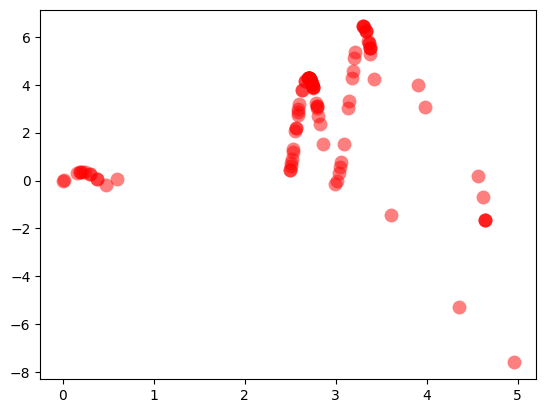

Time for Generation 7: 0.0588 seconds
Generation: 8
Max F_values: 337.2260144842766


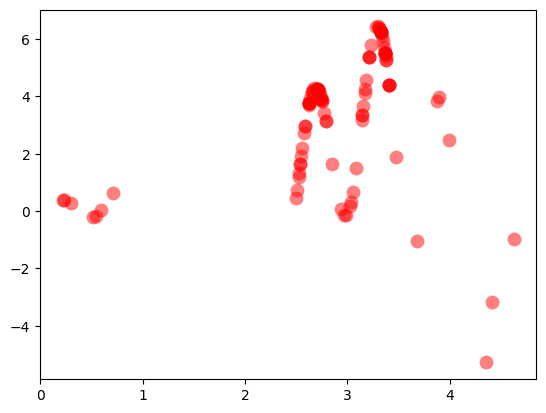

Time for Generation 8: 0.0495 seconds
Generation: 9
Max F_values: 386.9162716542521


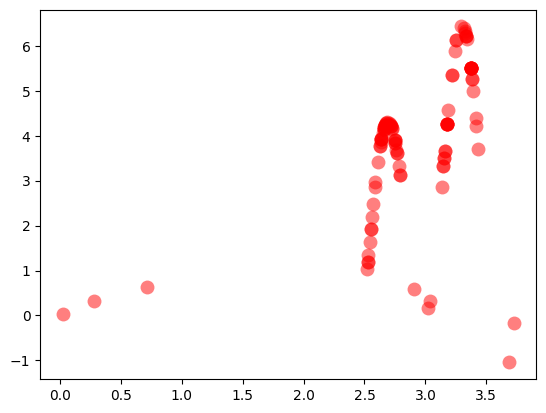

Time for Generation 9: 0.0593 seconds
Generation: 10
Max F_values: 420.6555294174956


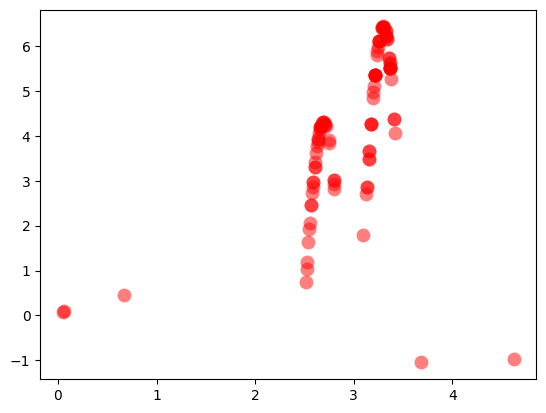

Time for Generation 10: 0.0565 seconds
Generation: 11
Max F_values: 480.0735868860624


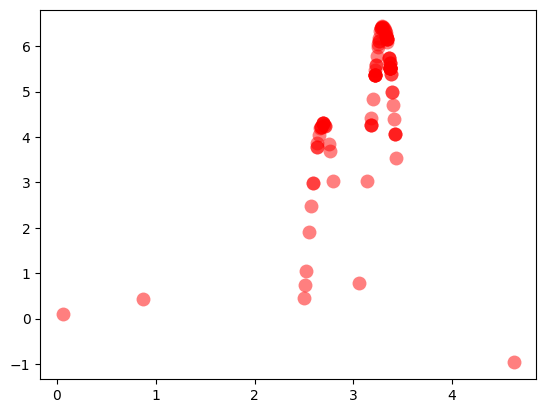

Time for Generation 11: 0.0474 seconds
Generation: 12
Max F_values: 480.0735868860624


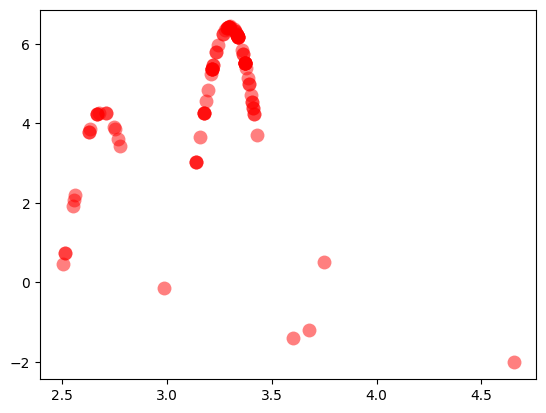

Time for Generation 12: 0.0959 seconds
Generation: 13
Max F_values: 491.0263118628082


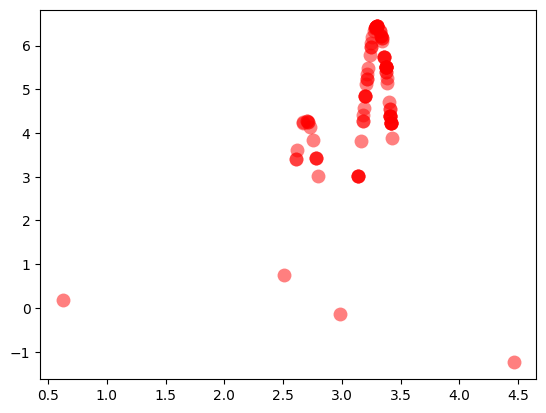

Time for Generation 13: 0.0553 seconds
Generation: 14
Max F_values: 501.2180984883371


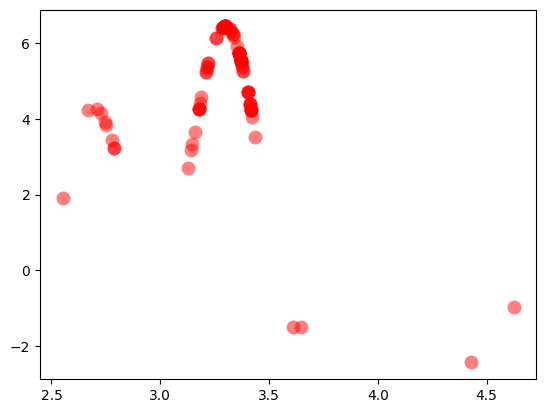

Time for Generation 14: 0.0633 seconds
Generation: 15
Max F_values: 515.3745026144877


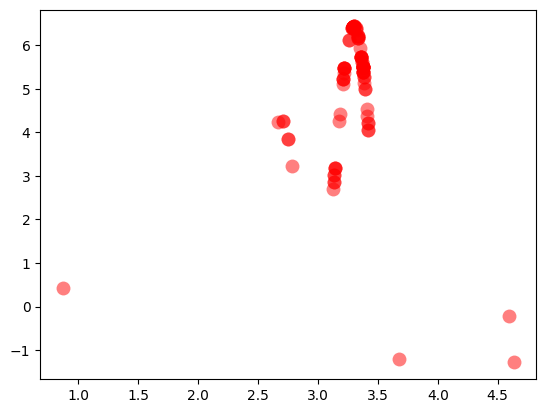

Time for Generation 15: 0.0564 seconds
Generation: 16
Max F_values: 515.3745026144877


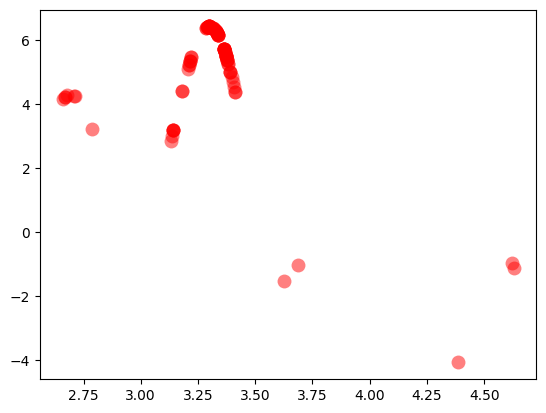

Time for Generation 16: 0.0478 seconds
Generation: 17
Max F_values: 533.8569752444055


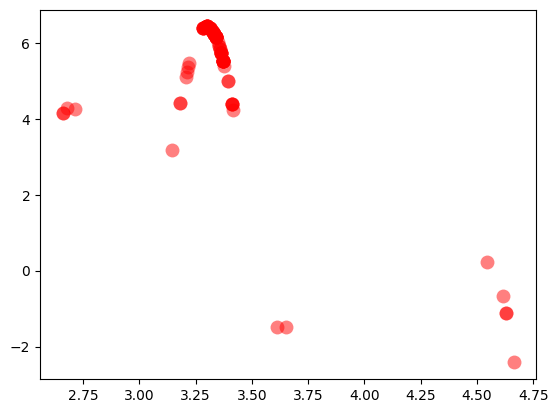

Time for Generation 17: 0.0637 seconds
Generation: 18
Max F_values: 570.6820575267105


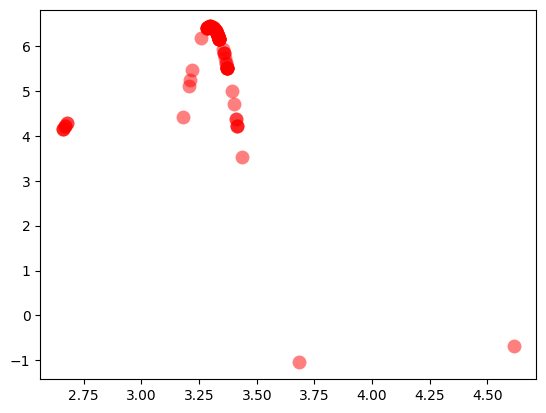

Time for Generation 18: 0.0721 seconds
Generation: 19
Max F_values: 581.052791383039


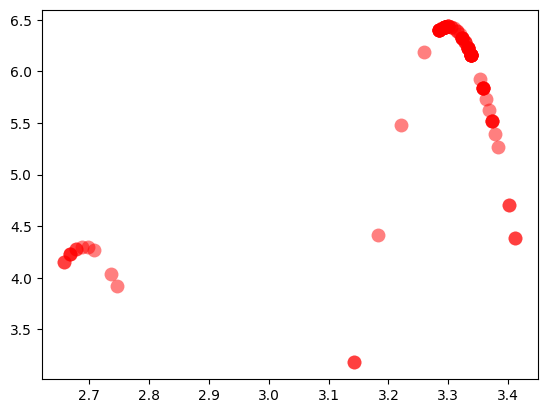

Time for Generation 19: 0.0469 seconds
Generation: 20
Max F_values: 591.488984395331


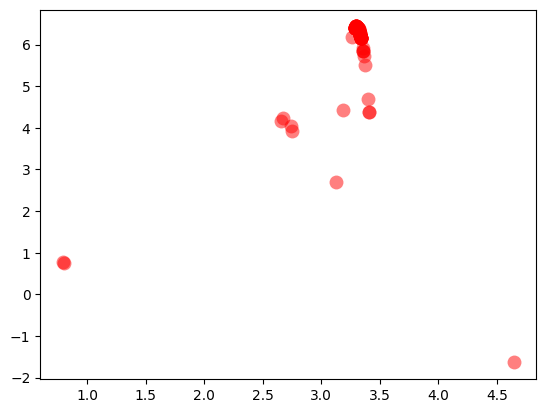

Time for Generation 20: 0.0634 seconds
Generation: 21
Max F_values: 591.488984395331


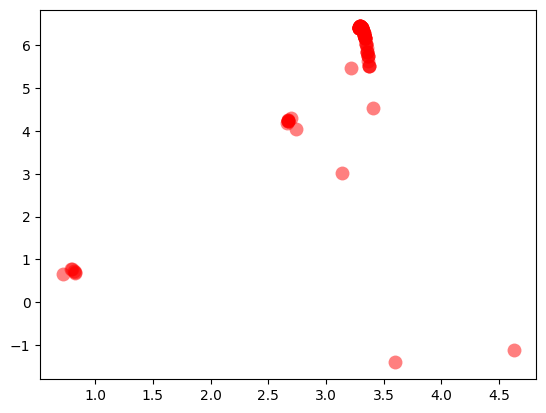

Time for Generation 21: 0.0637 seconds
Generation: 22
Max F_values: 591.488984395331


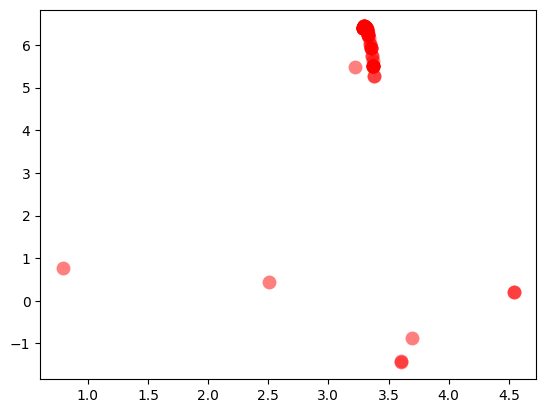

Time for Generation 22: 0.0572 seconds
Generation: 23
Max F_values: 609.9244308452763


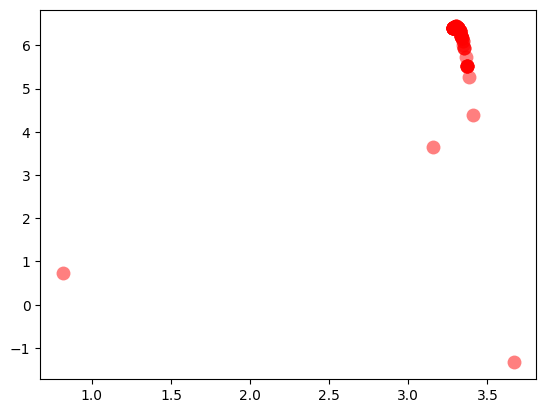

Time for Generation 23: 0.0791 seconds
Generation: 24
Max F_values: 611.9418164599608


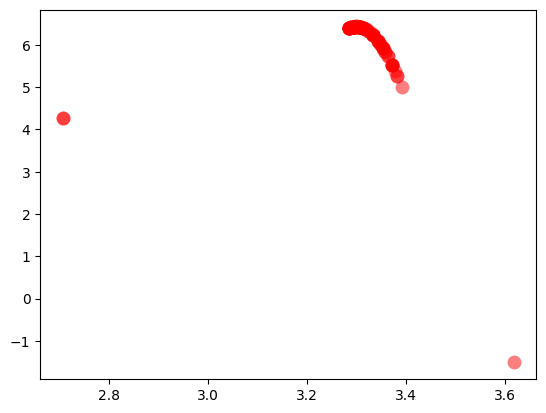

Time for Generation 24: 0.0475 seconds
Generation: 25
Max F_values: 611.9418164599608


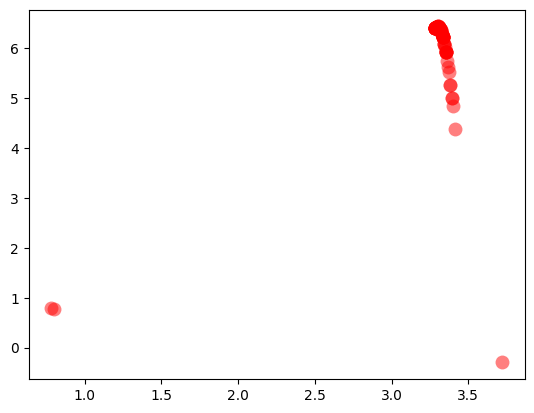

Time for Generation 25: 0.0572 seconds
Generation: 26
Max F_values: 625.3829465058702


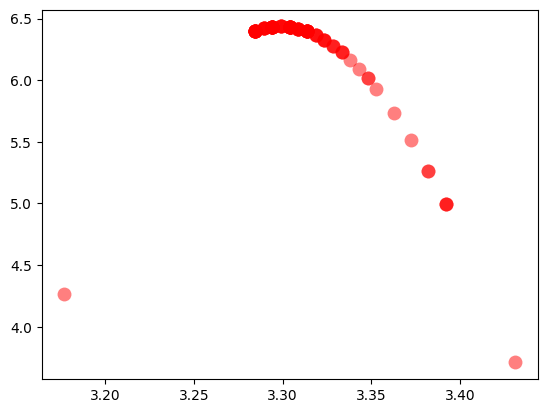

Time for Generation 26: 0.0672 seconds
Generation: 27
Max F_values: 625.3829465058702


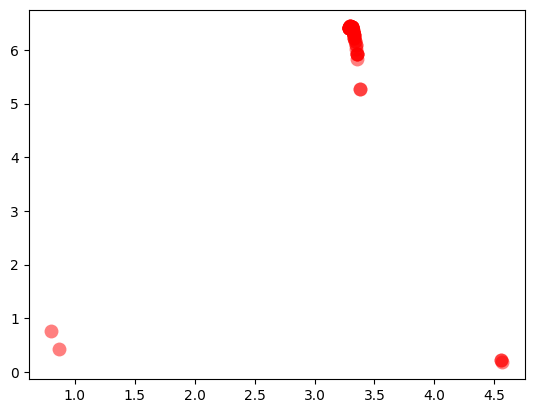

Time for Generation 27: 0.0618 seconds
Generation: 28
Max F_values: 625.3829465058702


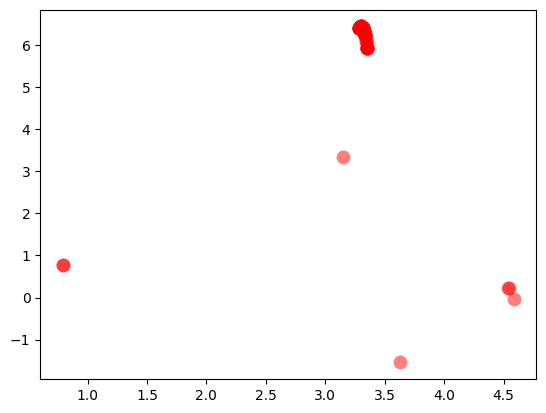

Time for Generation 28: 0.0856 seconds
Generation: 29
Max F_values: 625.3829465058702


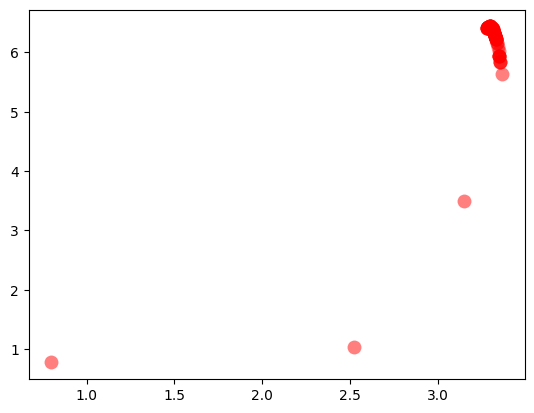

Time for Generation 29: 0.0659 seconds
Generation: 30
Max F_values: 625.3829465058702


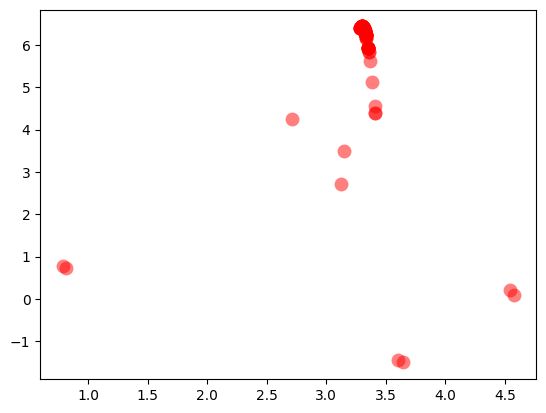

Time for Generation 30: 0.0738 seconds
Generation: 31
Max F_values: 625.3829465058702


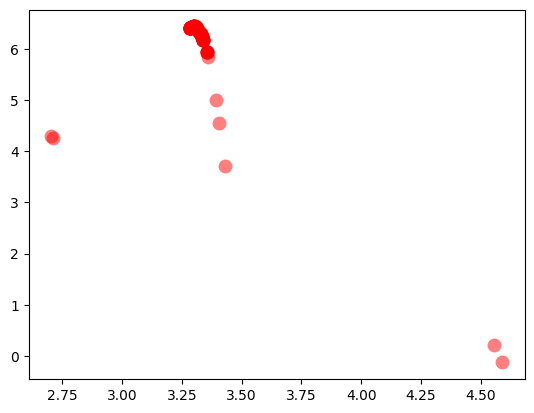

Time for Generation 31: 0.0842 seconds
Generation: 32
Max F_values: 625.3829465058702


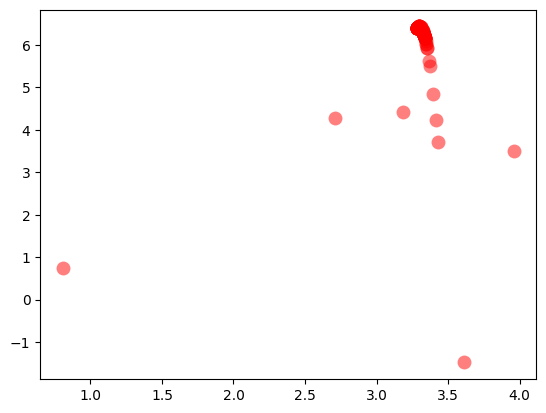

Time for Generation 32: 0.1070 seconds
Generation: 33
Max F_values: 625.3829465058702


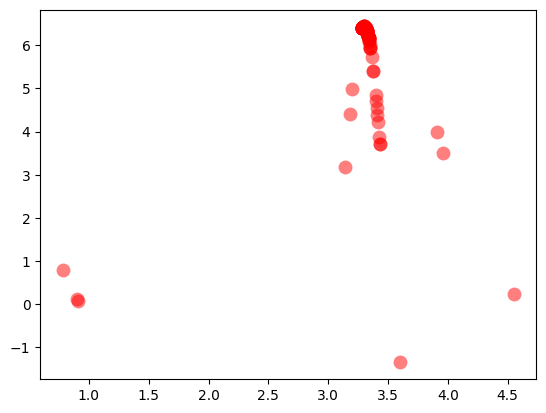

Time for Generation 33: 0.0488 seconds
Generation: 34
Max F_values: 625.3829465058702


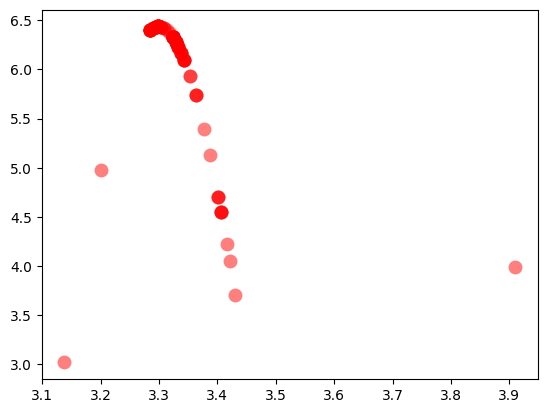

Time for Generation 34: 0.0719 seconds
Generation: 35
Max F_values: 625.3829465058702


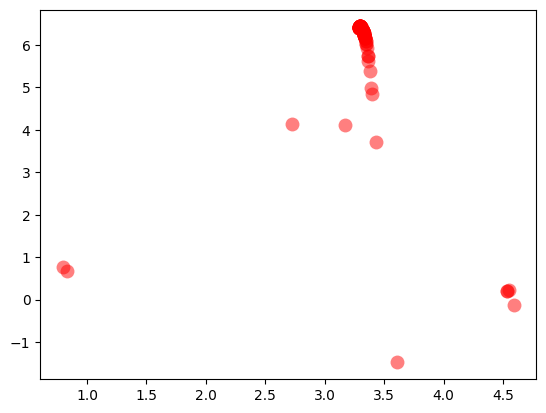

Time for Generation 35: 0.0728 seconds
Generation: 36
Max F_values: 625.3829465058702


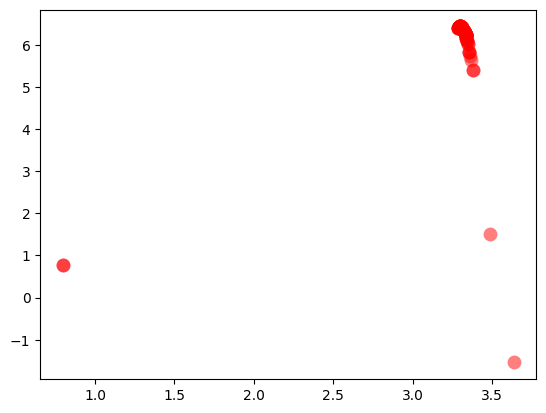

Time for Generation 36: 0.1373 seconds
Generation: 37
Max F_values: 625.3829465058702


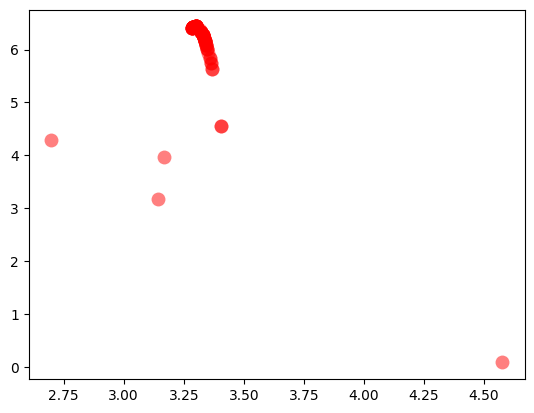

Time for Generation 37: 0.0936 seconds
Generation: 38
Max F_values: 625.3829465058702


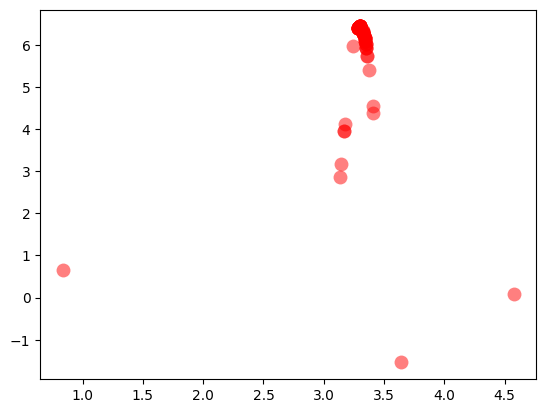

Time for Generation 38: 0.0822 seconds
Generation: 39
Max F_values: 625.3829465058702


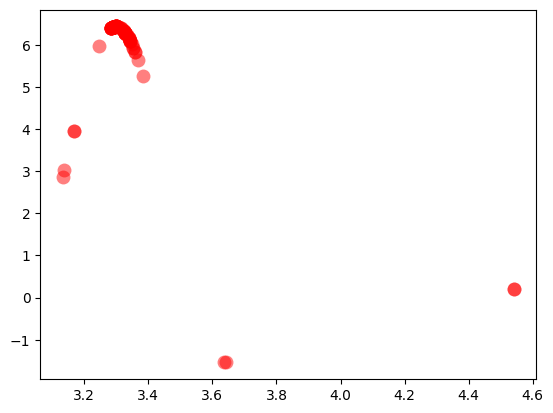

Time for Generation 39: 0.1016 seconds
Generation: 40
Max F_values: 625.3829465058702


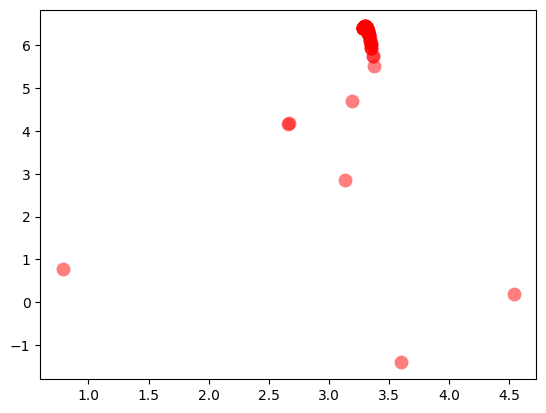

Time for Generation 40: 0.0832 seconds
Generation: 41
Max F_values: 625.3829465058702


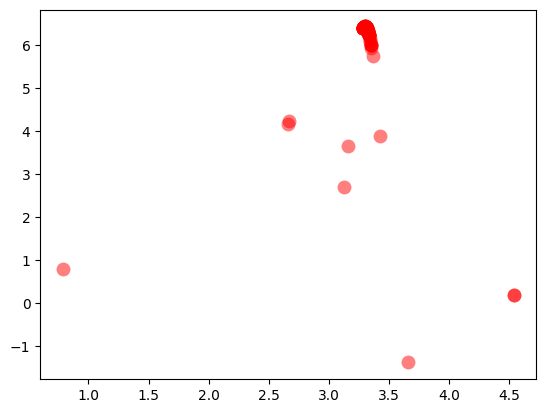

Time for Generation 41: 0.0821 seconds
Generation: 42
Max F_values: 625.3829465058702


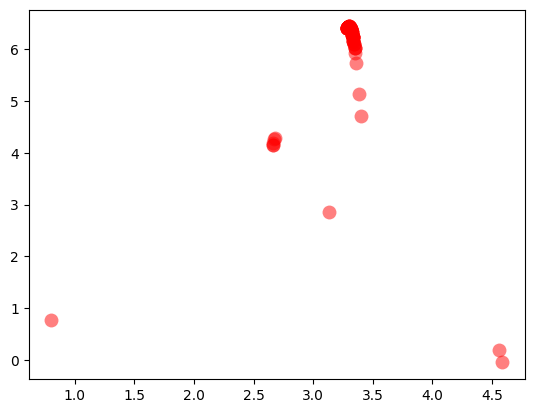

Time for Generation 42: 0.0943 seconds
Generation: 43
Max F_values: 625.3829465058702


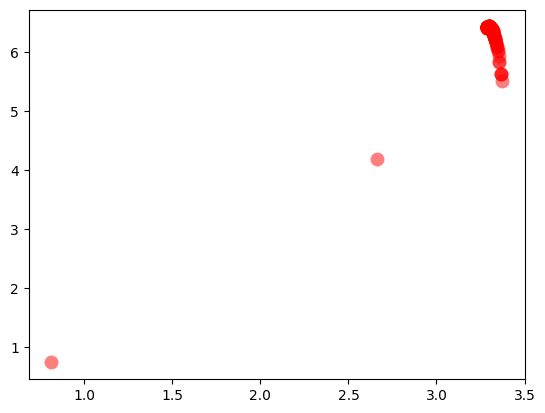

Time for Generation 43: 0.0734 seconds
Generation: 44
Max F_values: 625.3829465058702


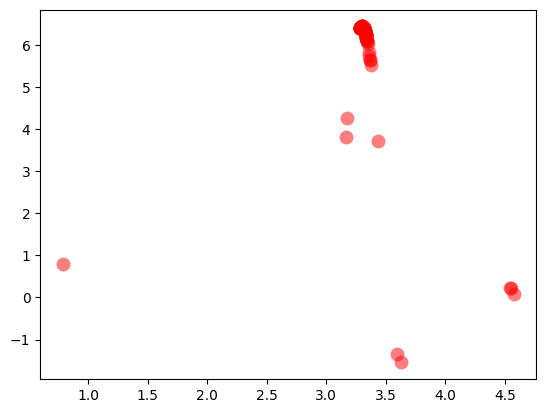

Time for Generation 44: 0.0996 seconds
Generation: 45
Max F_values: 625.3829465058702


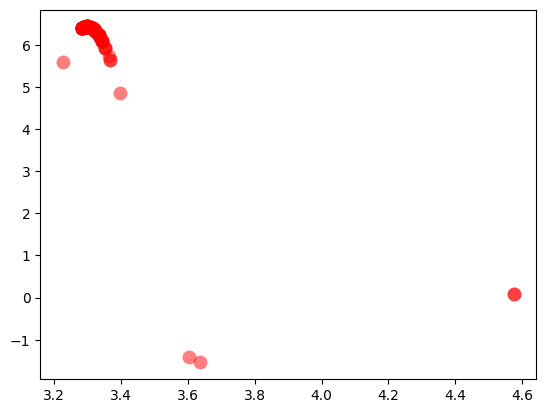

Time for Generation 45: 0.0819 seconds
Generation: 46
Max F_values: 629.7986908643134


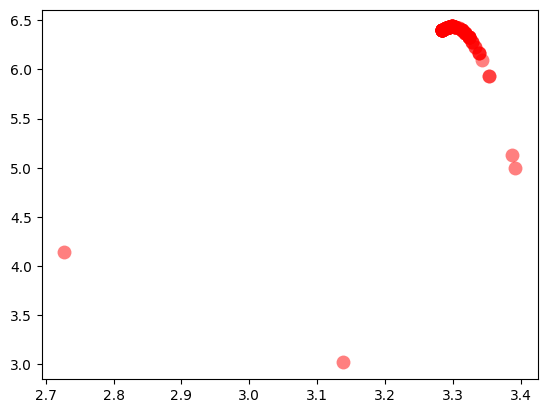

Time for Generation 46: 0.0828 seconds
Generation: 47
Max F_values: 629.7986908643134


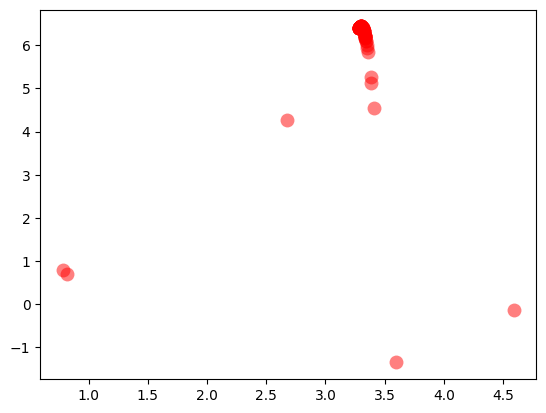

Time for Generation 47: 0.0850 seconds
Generation: 48
Max F_values: 629.7986908643134


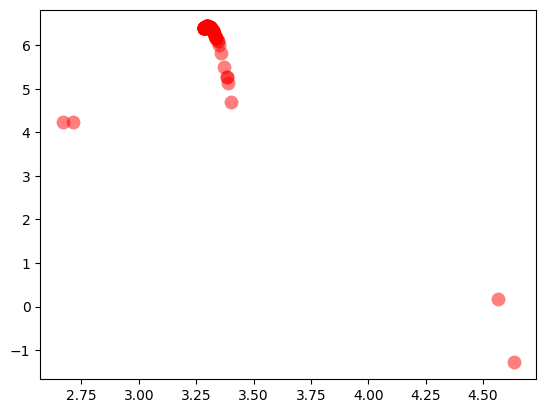

Time for Generation 48: 0.0952 seconds
Generation: 49
Max F_values: 629.7986908643134


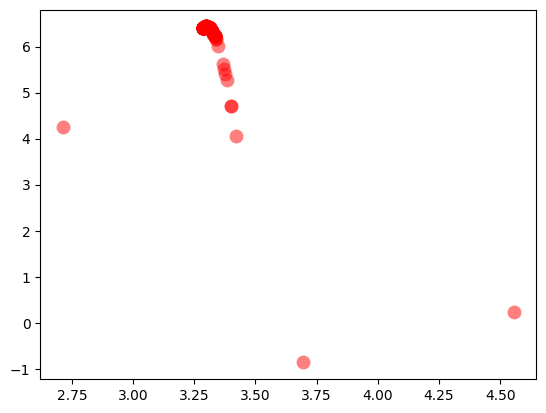

Time for Generation 49: 0.0855 seconds
Generation: 50
Max F_values: 629.7986908643134


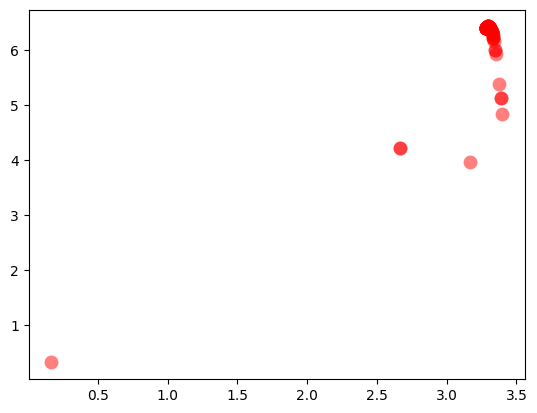

Time for Generation 50: 0.0746 seconds
Generation: 51
Max F_values: 629.7986908643134


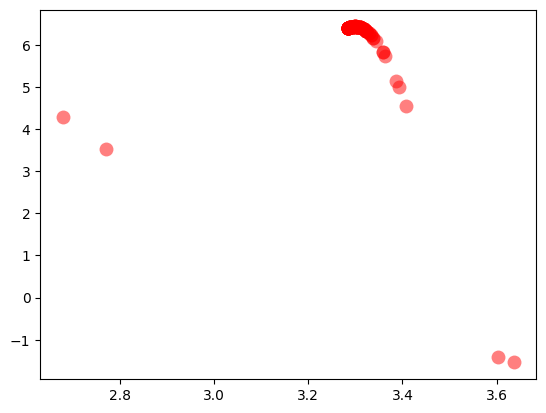

Time for Generation 51: 0.0692 seconds
Generation: 52
Max F_values: 629.7986908643134


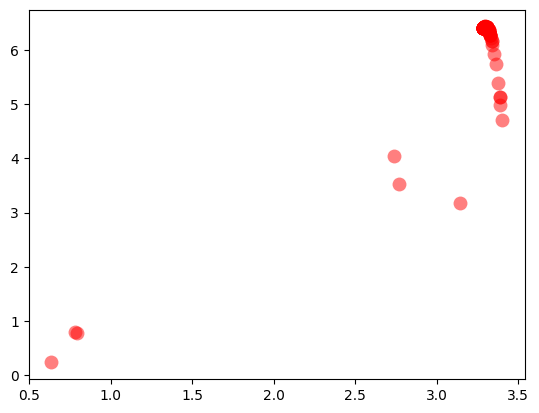

Time for Generation 52: 0.1102 seconds
Generation: 53
Max F_values: 629.7986908643134


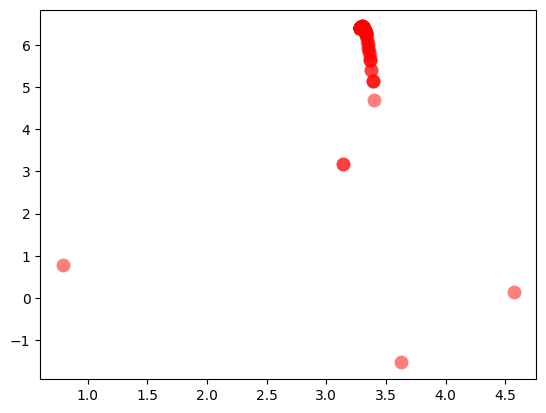

Time for Generation 53: 0.0958 seconds
Generation: 54
Max F_values: 629.7986908643134


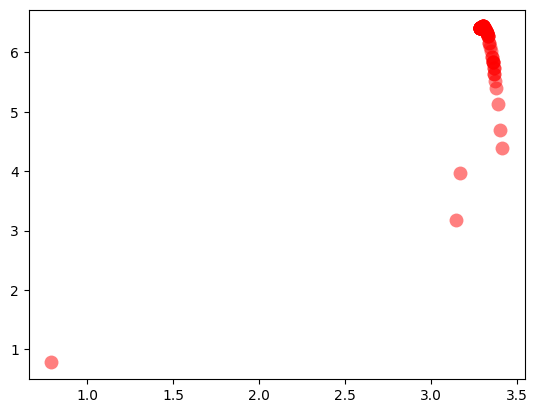

Time for Generation 54: 0.0901 seconds
Generation: 55
Max F_values: 629.7986908643134


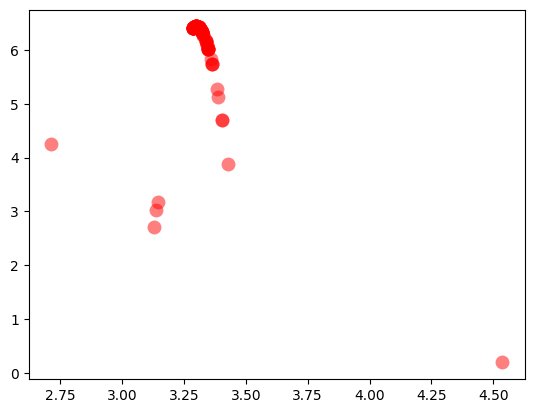

Time for Generation 55: 0.0828 seconds
Generation: 56
Max F_values: 629.7986908643134


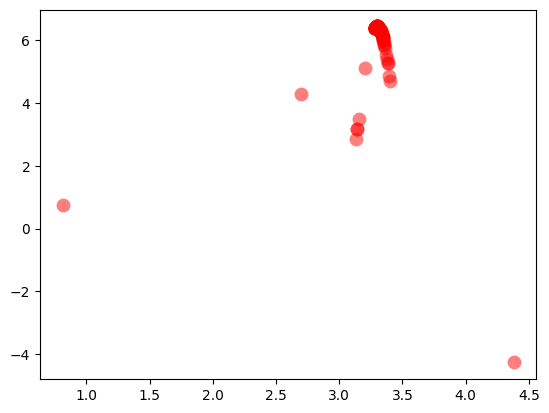

Time for Generation 56: 0.0665 seconds
Generation: 57
Max F_values: 629.7986908643134


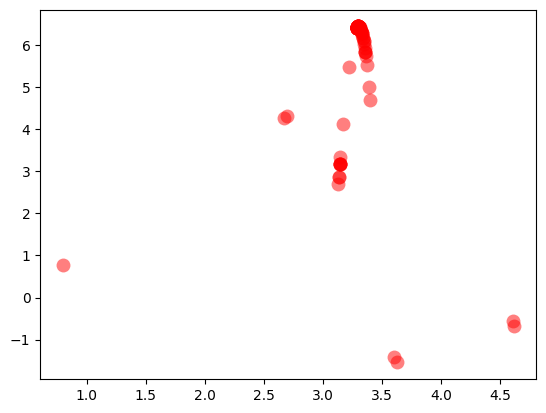

Time for Generation 57: 0.0645 seconds
Generation: 58
Max F_values: 629.7986908643134


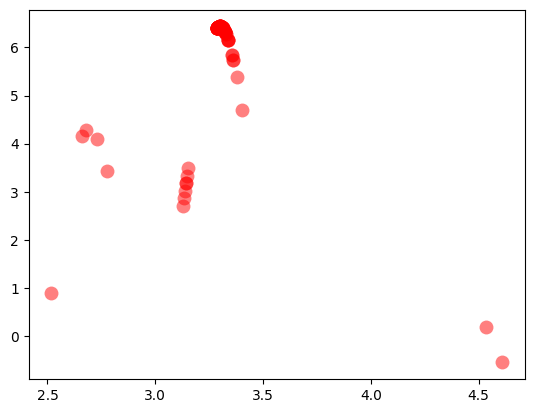

Time for Generation 58: 0.0626 seconds
Generation: 59
Max F_values: 629.7986908643134


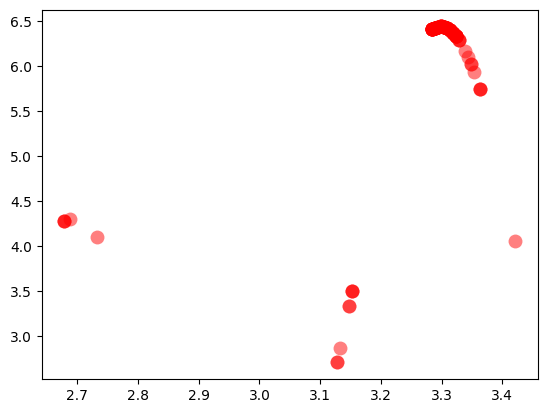

Time for Generation 59: 0.0920 seconds
Generation: 60
Max F_values: 629.7986908643134


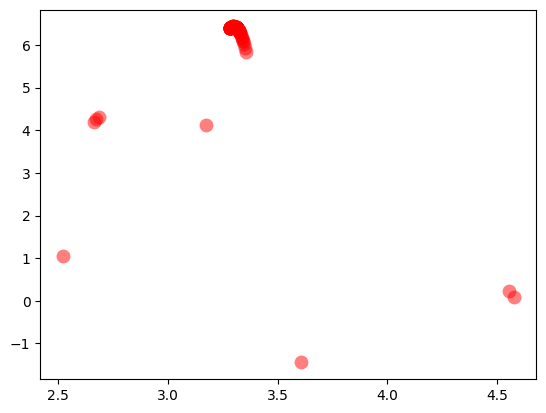

Time for Generation 60: 0.0658 seconds
Generation: 61
Max F_values: 629.7986908643134


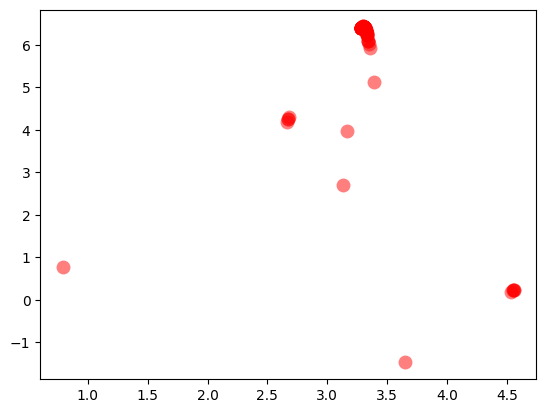

Time for Generation 61: 0.0816 seconds
Generation: 62
Max F_values: 629.7986908643134


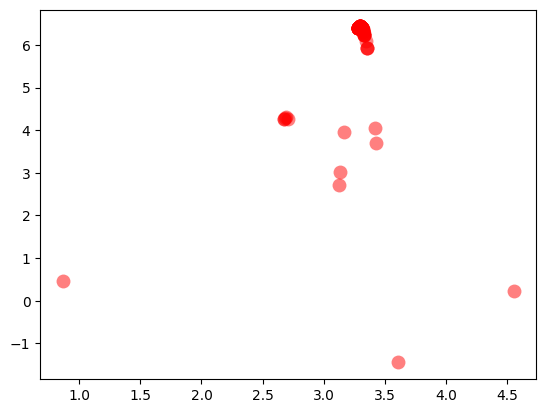

Time for Generation 62: 0.0678 seconds
Generation: 63
Max F_values: 629.7986908643134


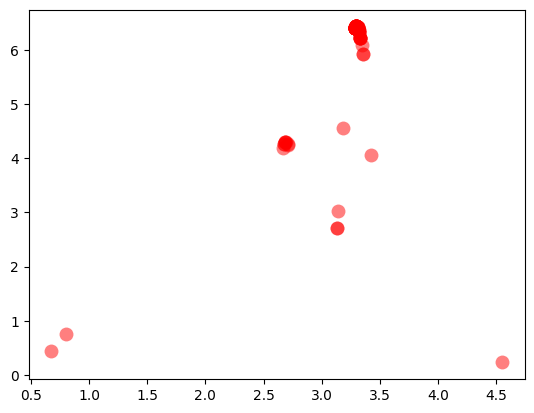

Time for Generation 63: 0.0753 seconds
Generation: 64
Max F_values: 629.7986908643134


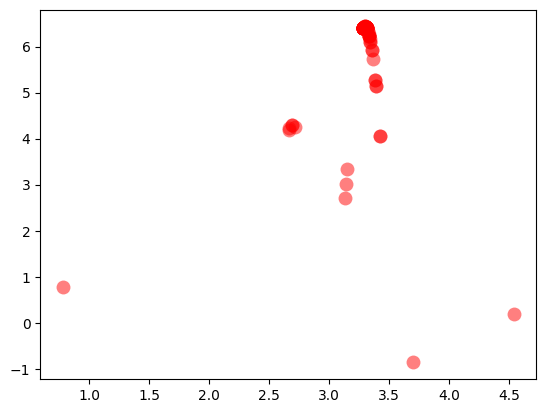

Time for Generation 64: 0.0754 seconds
Generation: 65
Max F_values: 629.7986908643134


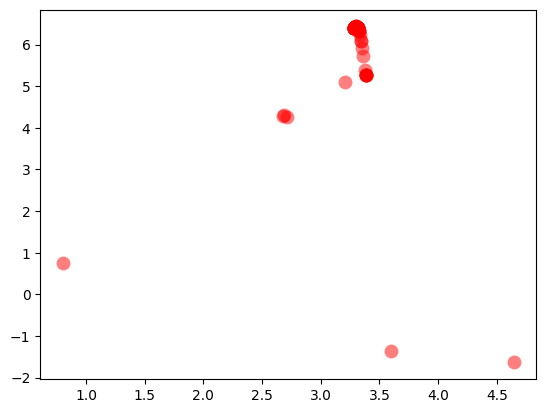

Time for Generation 65: 0.0983 seconds
Generation: 66
Max F_values: 629.7986908643134


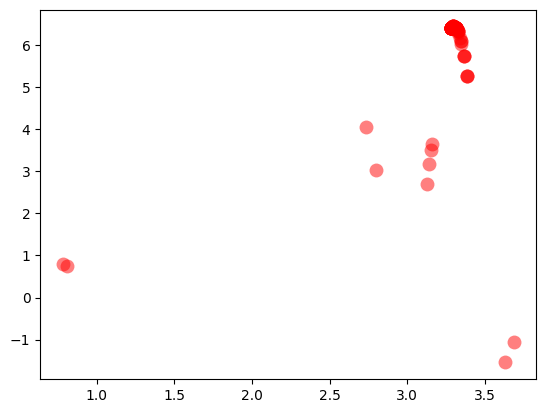

Time for Generation 66: 0.0704 seconds
Generation: 67
Max F_values: 629.7986908643134


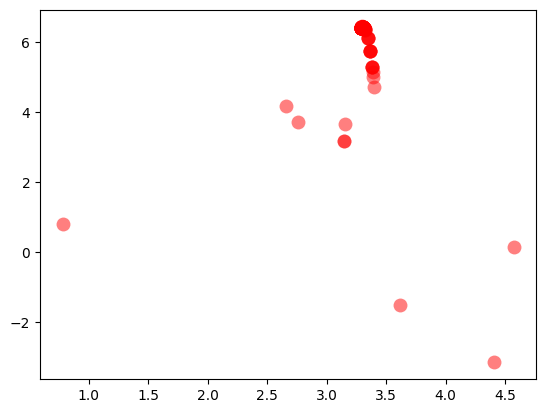

Time for Generation 67: 0.0779 seconds
Generation: 68
Max F_values: 629.7986908643134


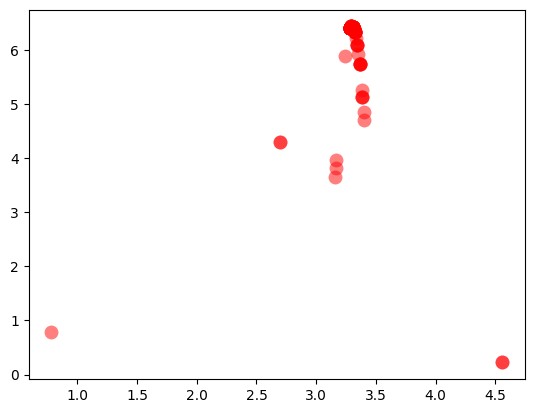

Time for Generation 68: 0.0702 seconds
Generation: 69
Max F_values: 629.7986908643134


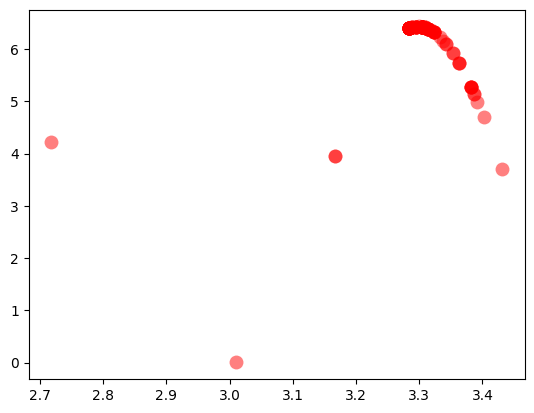

Time for Generation 69: 0.0915 seconds
Generation: 70
Max F_values: 629.7986908643134


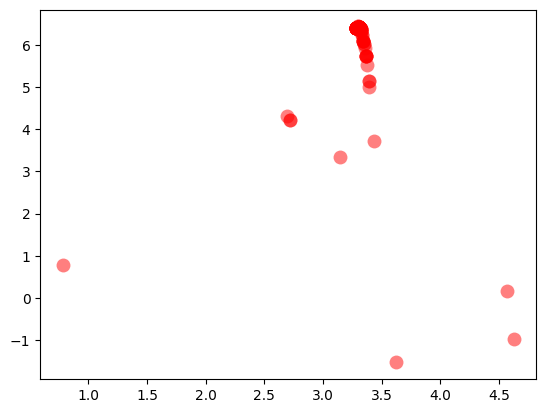

Time for Generation 70: 0.0872 seconds
Generation: 71
Max F_values: 629.7986908643134


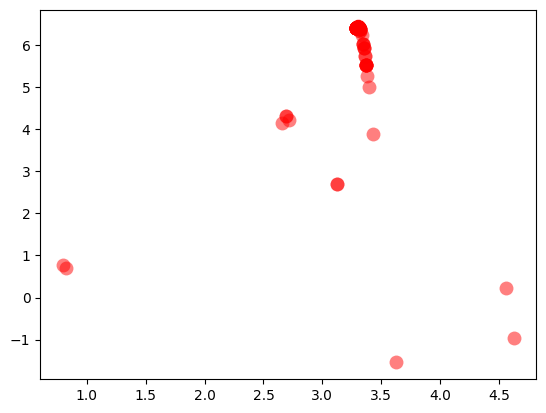

Time for Generation 71: 0.0783 seconds
Generation: 72
Max F_values: 629.7986908643134


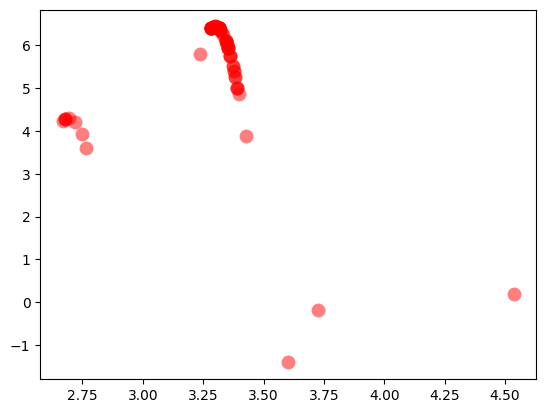

Time for Generation 72: 0.1518 seconds
Generation: 73
Max F_values: 629.7986908643134


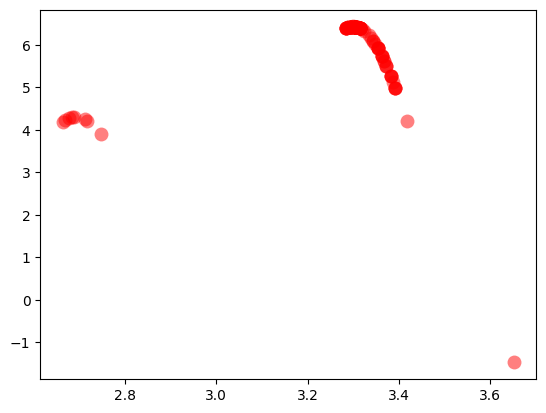

Time for Generation 73: 0.0728 seconds
Generation: 74
Max F_values: 629.7986908643134


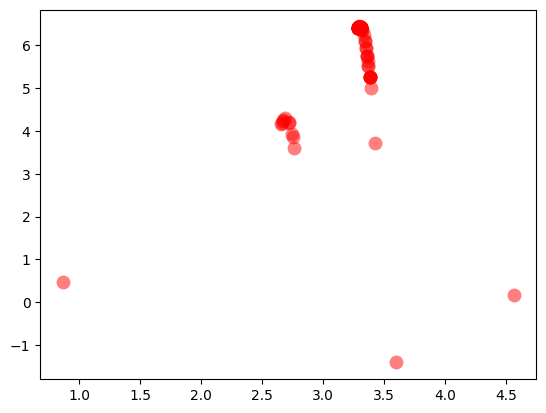

Time for Generation 74: 0.0651 seconds
Generation: 75
Max F_values: 629.7986908643134


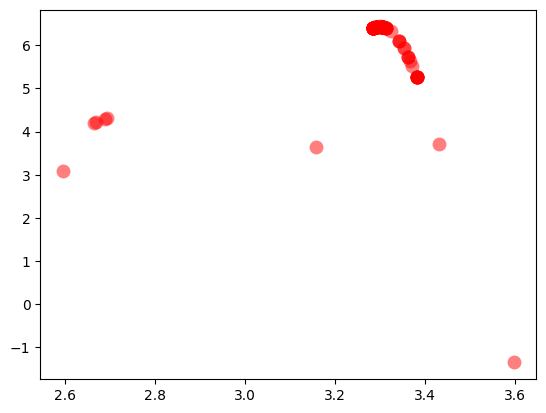

Time for Generation 75: 0.0765 seconds
Generation: 76
Max F_values: 629.7986908643134


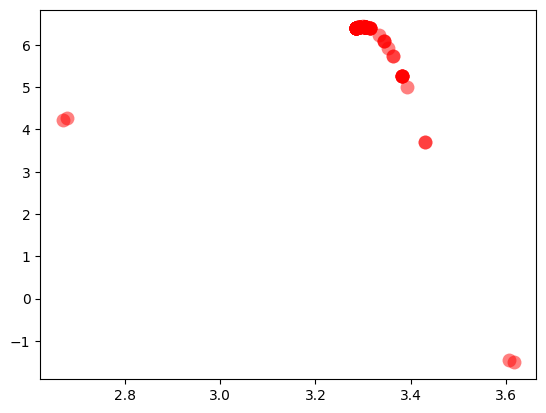

Time for Generation 76: 0.0883 seconds
Generation: 77
Max F_values: 629.7986908643134


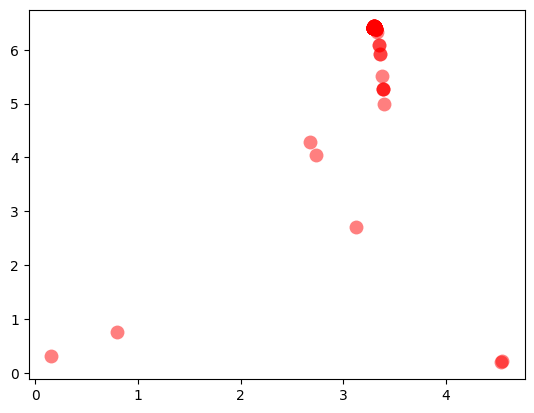

Time for Generation 77: 0.0843 seconds
Generation: 78
Max F_values: 629.7986908643134


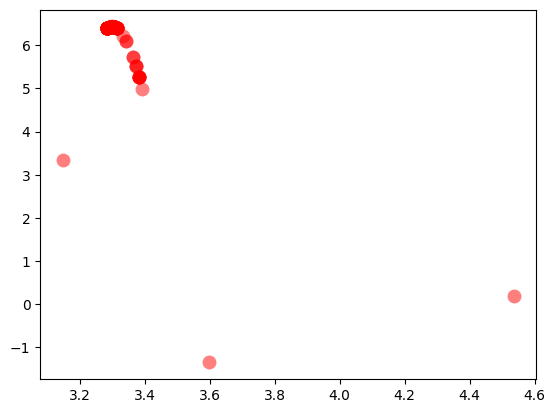

Time for Generation 78: 0.0670 seconds
Generation: 79
Max F_values: 629.7986908643134


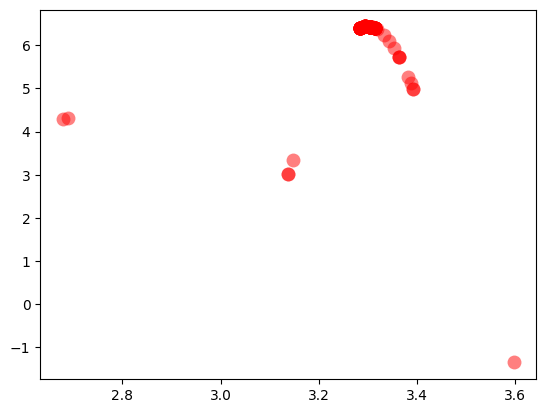

Time for Generation 79: 0.0697 seconds
Generation: 80
Max F_values: 629.7986908643134


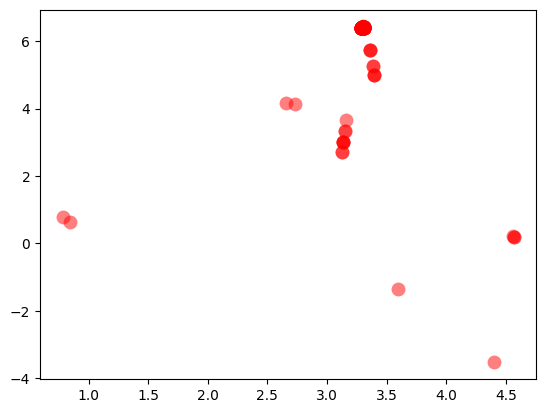

Time for Generation 80: 0.0673 seconds
Generation: 81
Max F_values: 629.7986908643134


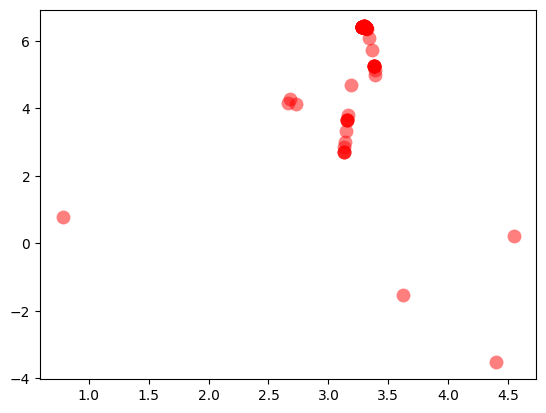

Time for Generation 81: 0.0702 seconds
Generation: 82
Max F_values: 629.7986908643134


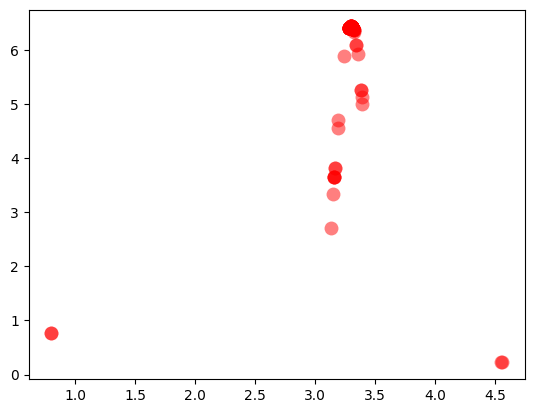

Time for Generation 82: 0.1113 seconds
Generation: 83
Max F_values: 629.7986908643134


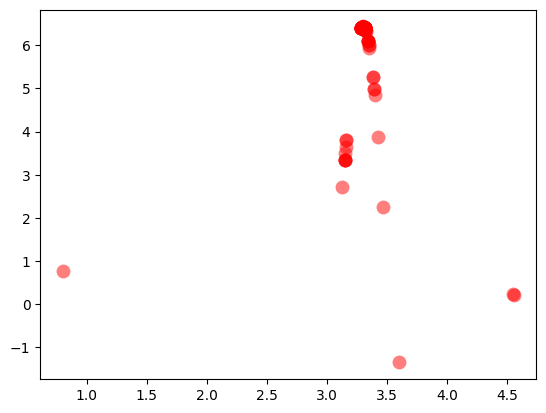

Time for Generation 83: 0.0806 seconds
Generation: 84
Max F_values: 629.7986908643134


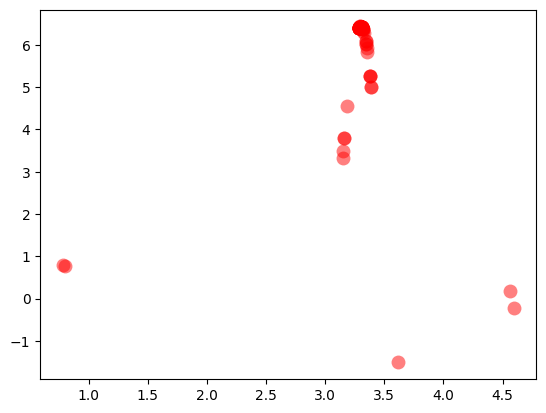

Time for Generation 84: 0.0841 seconds
Generation: 85
Max F_values: 629.7986908643134


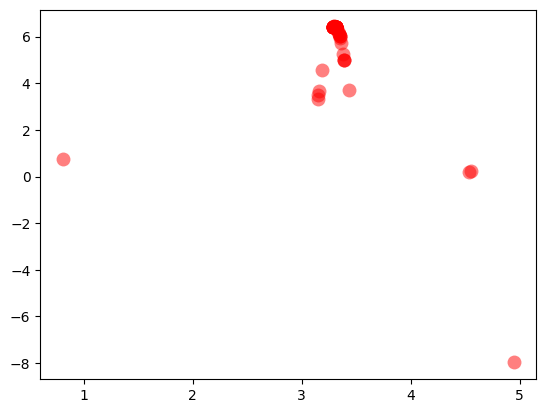

Time for Generation 85: 0.0750 seconds
Generation: 86
Max F_values: 629.7986908643134


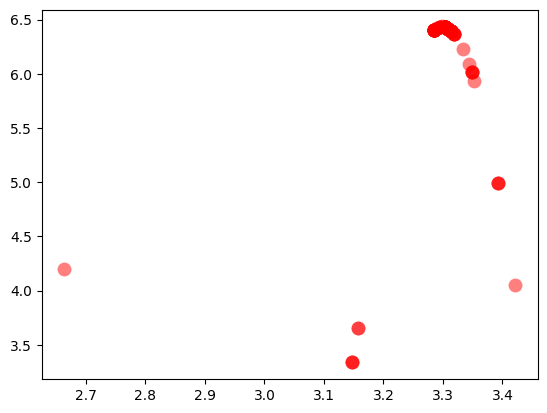

Time for Generation 86: 0.0921 seconds
Generation: 87
Max F_values: 629.7986908643134


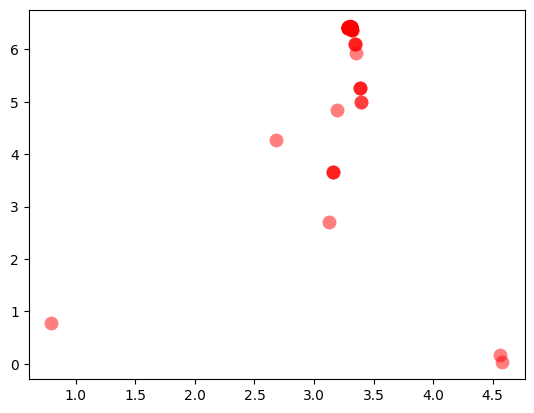

Time for Generation 87: 0.0690 seconds
Generation: 88
Max F_values: 629.7986908643134


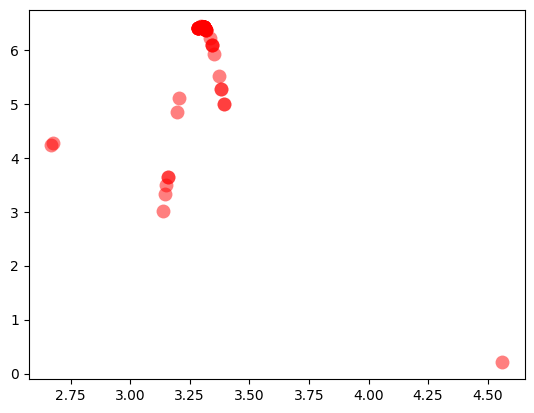

Time for Generation 88: 0.0675 seconds
Generation: 89
Max F_values: 629.7986908643134


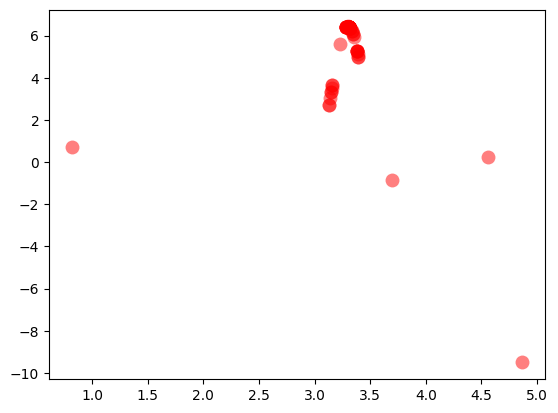

Time for Generation 89: 0.0724 seconds
Generation: 90
Max F_values: 629.7986908643134


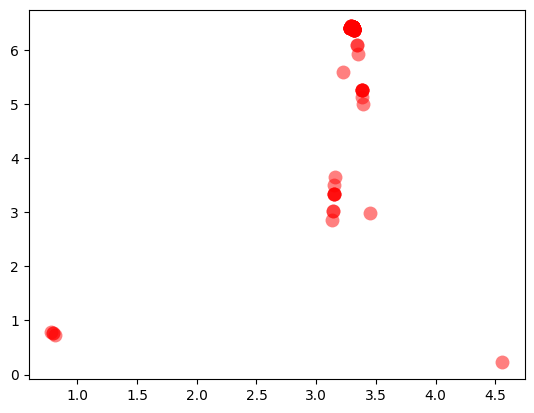

Time for Generation 90: 0.0608 seconds
Generation: 91
Max F_values: 629.7986908643134


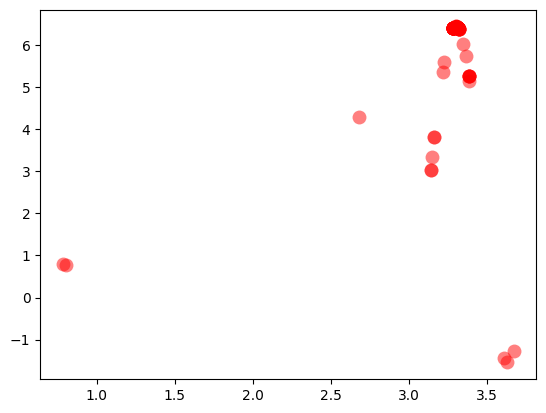

Time for Generation 91: 0.0917 seconds
Generation: 92
Max F_values: 629.7986908643134


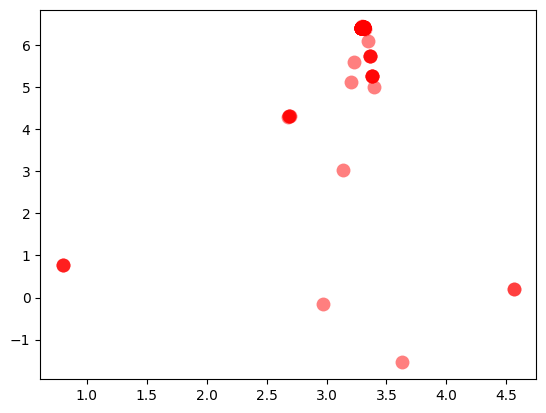

Time for Generation 92: 0.1339 seconds
Generation: 93
Max F_values: 629.7986908643134


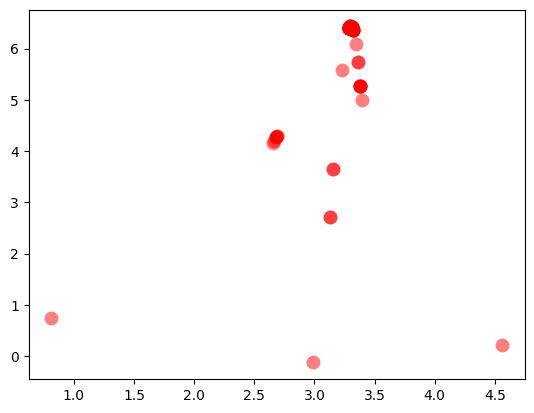

Time for Generation 93: 0.0751 seconds
Generation: 94
Max F_values: 629.7986908643134


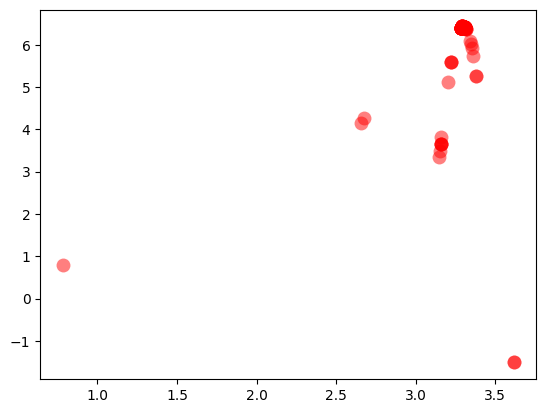

Time for Generation 94: 0.0751 seconds
Generation: 95
Max F_values: 629.7986908643134


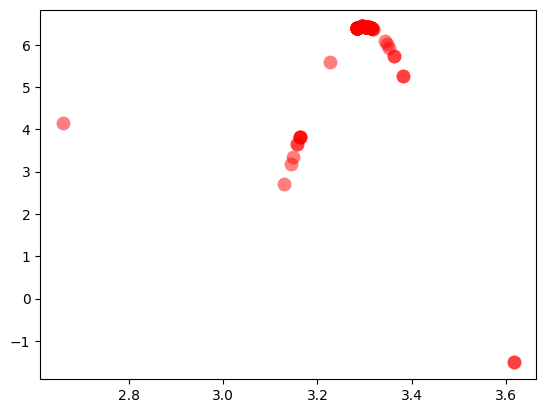

Time for Generation 95: 0.0714 seconds
Generation: 96
Max F_values: 629.7986908643134


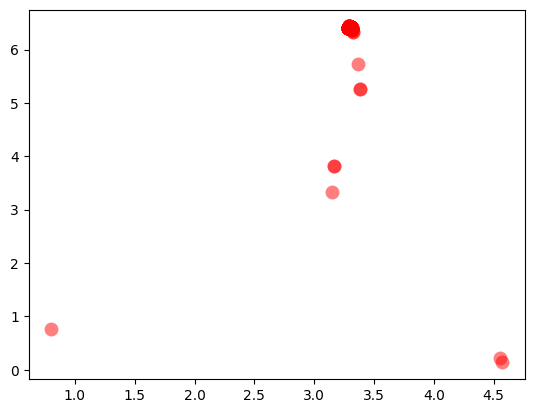

Time for Generation 96: 0.0849 seconds
Generation: 97
Max F_values: 629.7986908643134


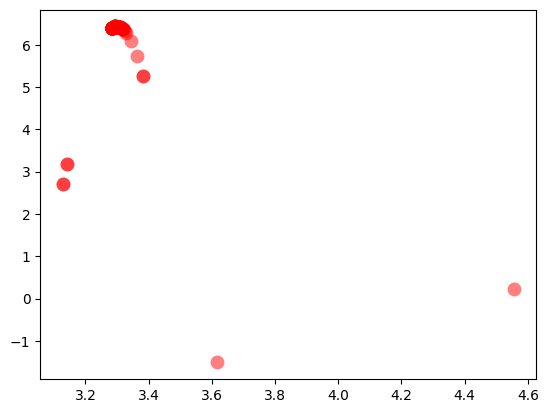

Time for Generation 97: 0.0821 seconds
Generation: 98
Max F_values: 629.7986908643134


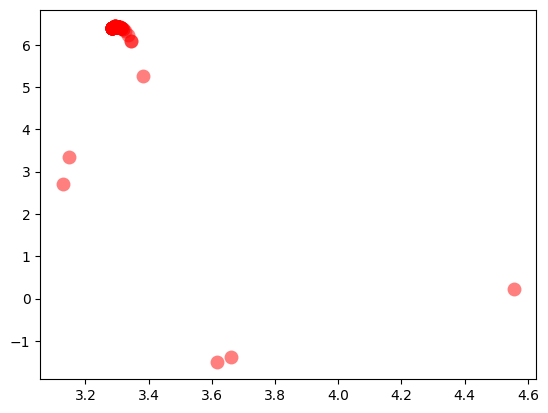

Time for Generation 98: 0.0867 seconds
Generation: 99
Max F_values: 629.7986908643134


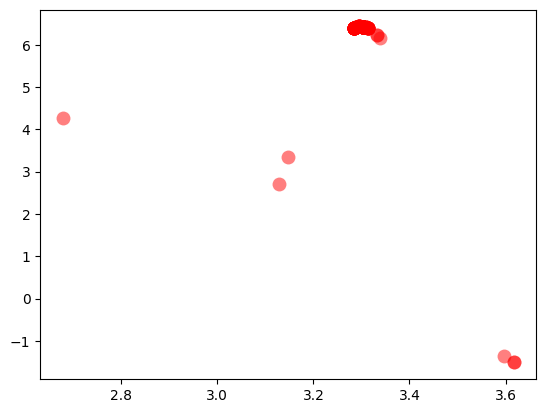

Time for Generation 99: 0.0756 seconds
Generation: 100
Max F_values: 629.7986908643134


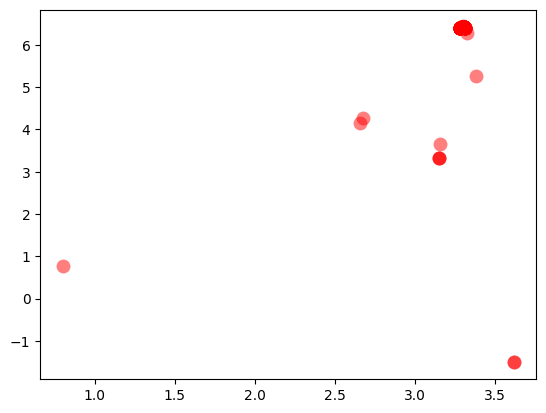

Time for Generation 100: 0.0989 seconds
Generation: 101
Max F_values: 629.7986908643134


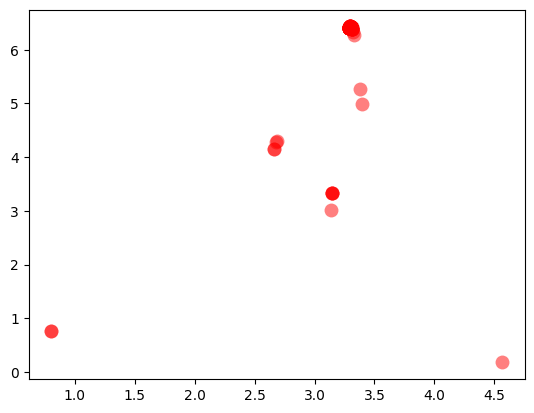

Time for Generation 101: 0.0729 seconds
Generation: 102
Max F_values: 629.7986908643134


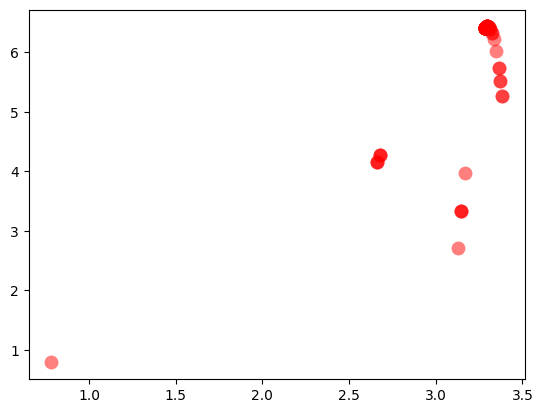

Time for Generation 102: 0.0663 seconds
Generation: 103
Max F_values: 629.7986908643134


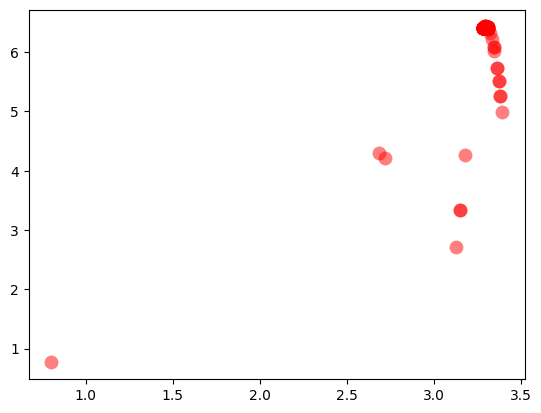

Time for Generation 103: 0.0660 seconds
Generation: 104
Max F_values: 629.7986908643134


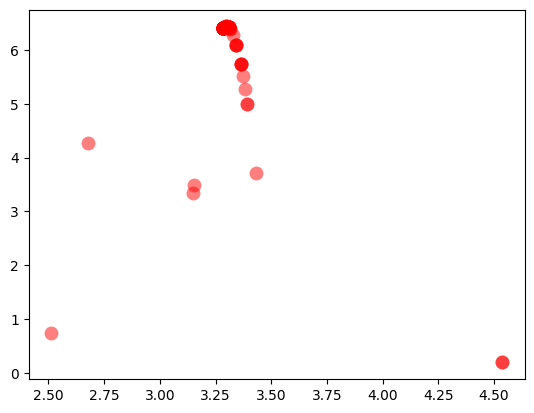

Time for Generation 104: 0.0946 seconds
Generation: 105
Max F_values: 629.7986908643134


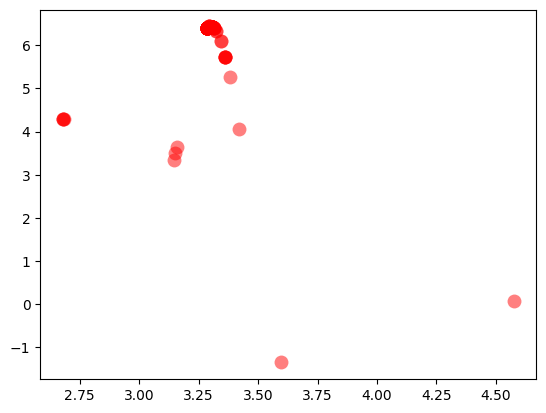

Time for Generation 105: 0.0825 seconds
Generation: 106
Max F_values: 629.7986908643134


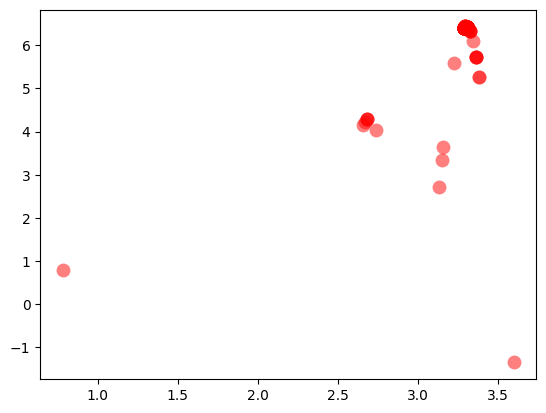

Time for Generation 106: 0.0715 seconds
Generation: 107
Max F_values: 629.7986908643134


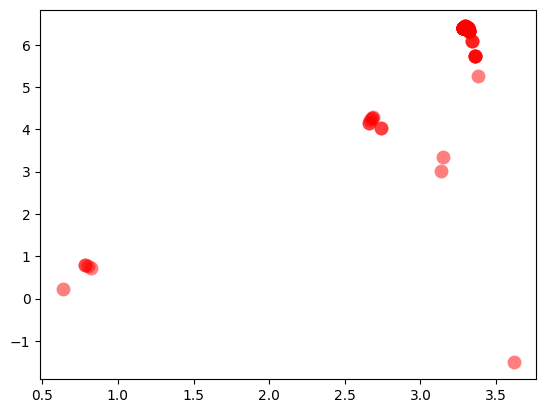

Time for Generation 107: 0.0930 seconds
Generation: 108
Max F_values: 629.7986908643134


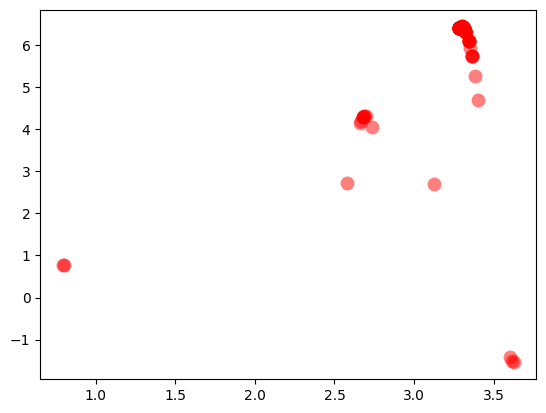

Time for Generation 108: 0.0784 seconds
Generation: 109
Max F_values: 629.7986908643134


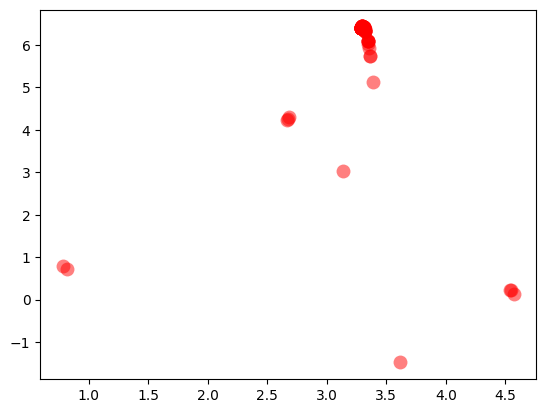

Time for Generation 109: 0.0757 seconds
Generation: 110
Max F_values: 629.7986908643134


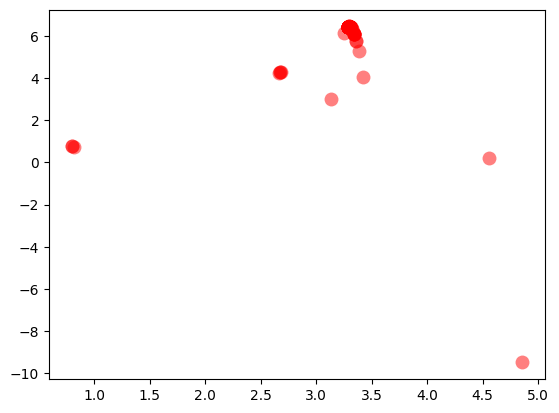

Time for Generation 110: 0.0903 seconds
Generation: 111
Max F_values: 629.7986908643134


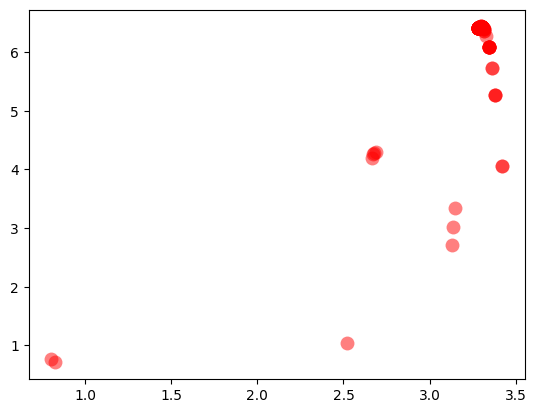

Time for Generation 111: 0.0964 seconds
Generation: 112
Max F_values: 629.7986908643134


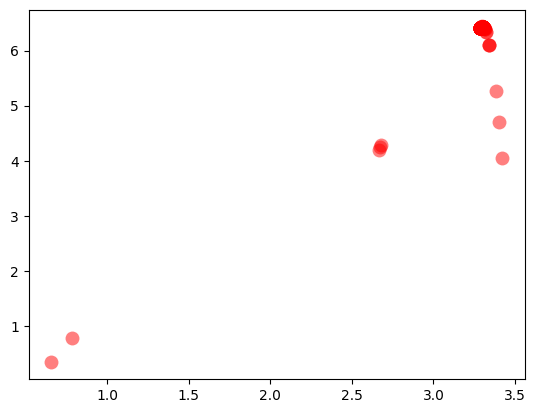

Time for Generation 112: 0.1098 seconds
Generation: 113
Max F_values: 629.7986908643134


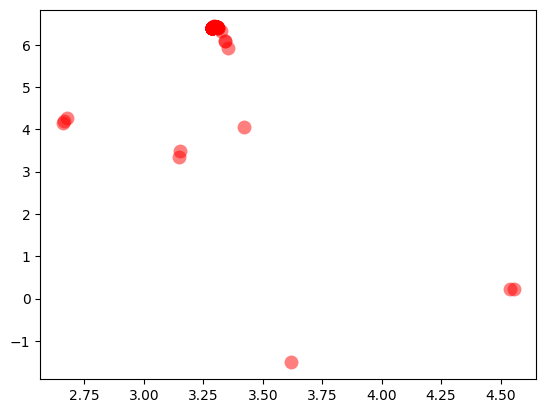

Time for Generation 113: 0.0738 seconds
Generation: 114
Max F_values: 629.7986908643134


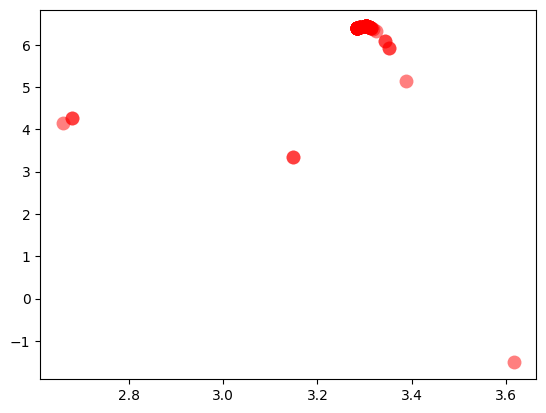

Time for Generation 114: 0.0767 seconds
Generation: 115
Max F_values: 629.7986908643134


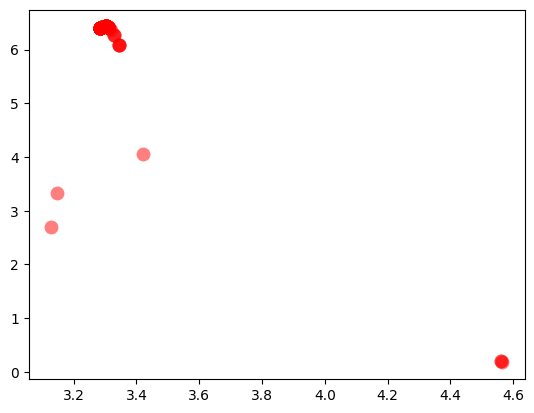

Time for Generation 115: 0.0733 seconds
Generation: 116
Max F_values: 629.7986908643134


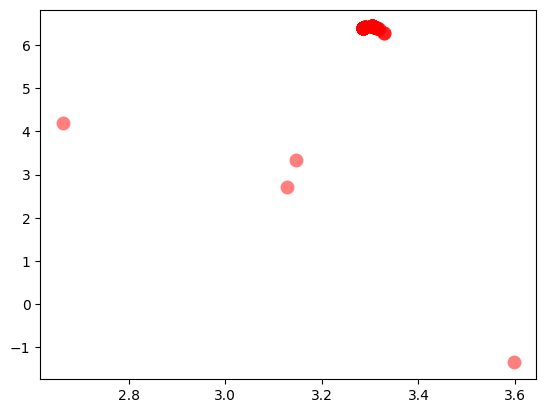

Time for Generation 116: 0.0589 seconds
Generation: 117
Max F_values: 629.7986908643134


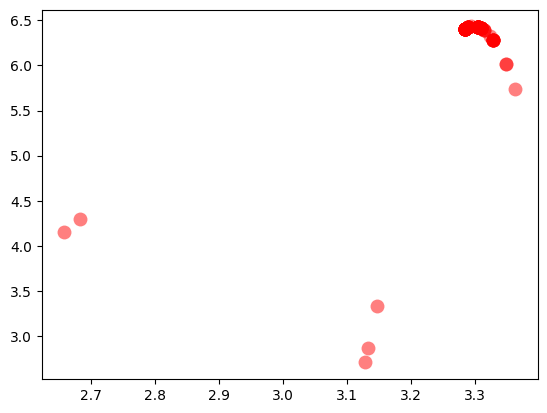

Time for Generation 117: 0.0696 seconds
Generation: 118
Max F_values: 629.7986908643134


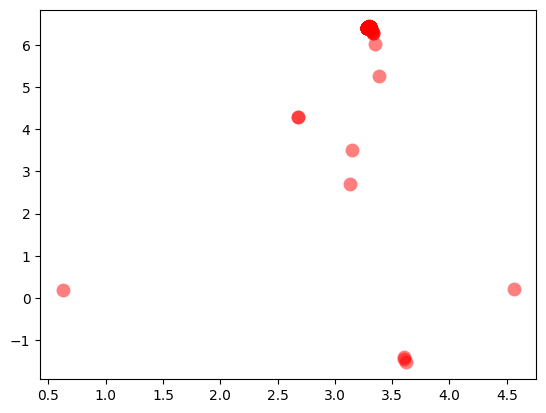

Time for Generation 118: 0.0768 seconds
Generation: 119
Max F_values: 629.7986908643134


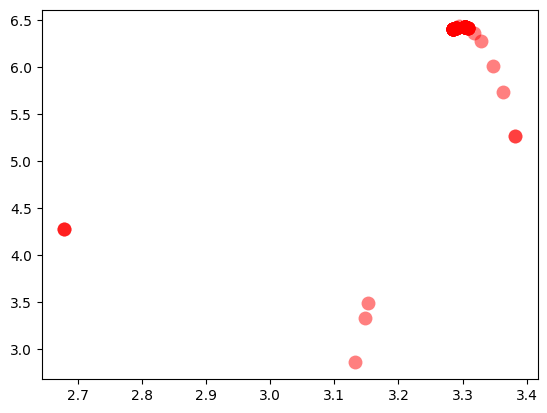

Time for Generation 119: 0.0947 seconds
Generation: 120
Max F_values: 629.7986908643134


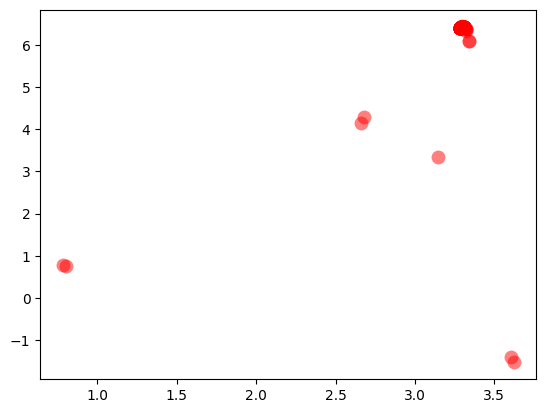

Time for Generation 120: 0.0761 seconds
Generation: 121
Max F_values: 629.7986908643134


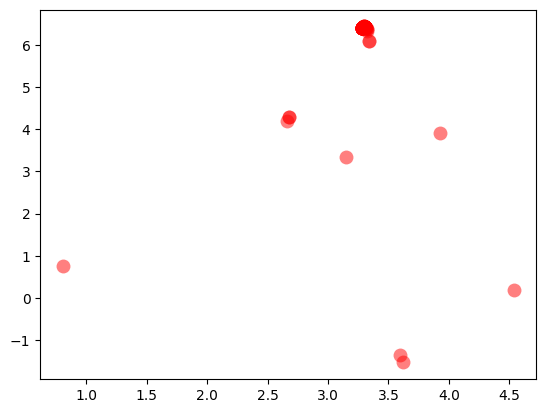

Time for Generation 121: 0.0667 seconds
Generation: 122
Max F_values: 629.7986908643134


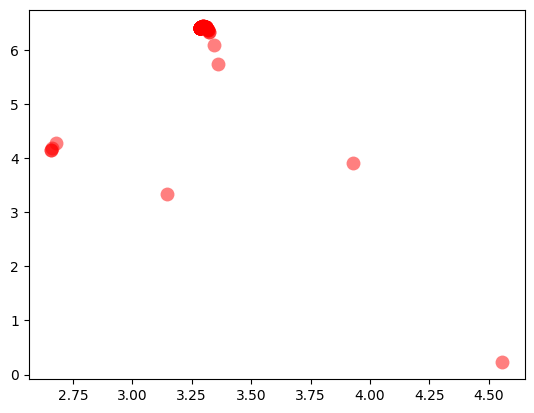

Time for Generation 122: 0.0859 seconds
Generation: 123
Max F_values: 629.7986908643134


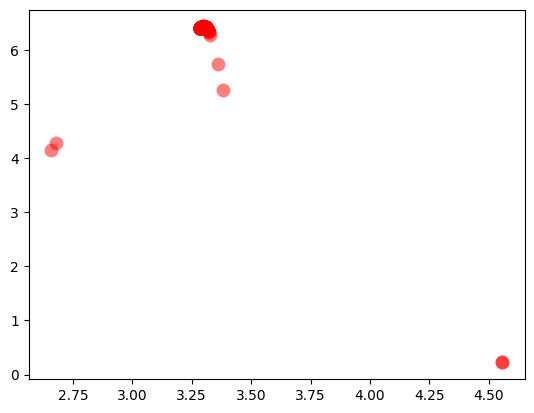

Time for Generation 123: 0.0631 seconds
Generation: 124
Max F_values: 636.5087671454559


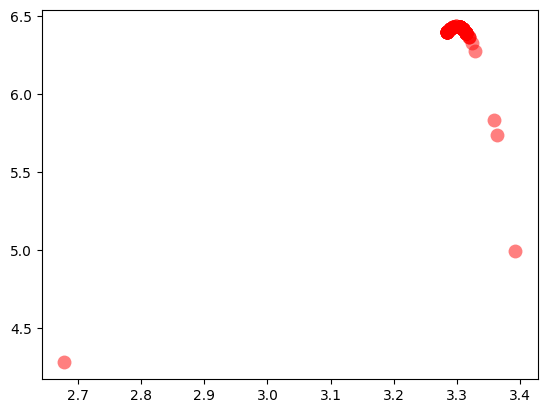

Time for Generation 124: 0.0758 seconds
Generation: 125
Max F_values: 636.5087671454559


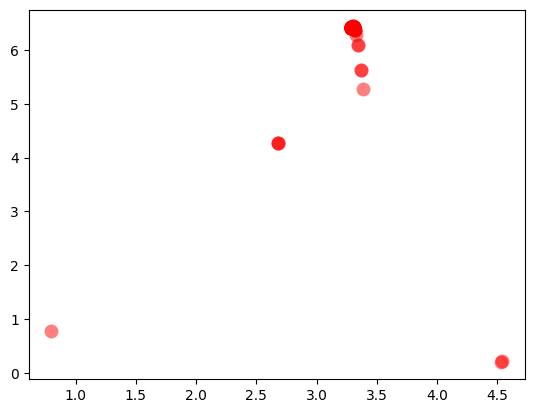

Time for Generation 125: 0.0650 seconds
Generation: 126
Max F_values: 636.5087671454559


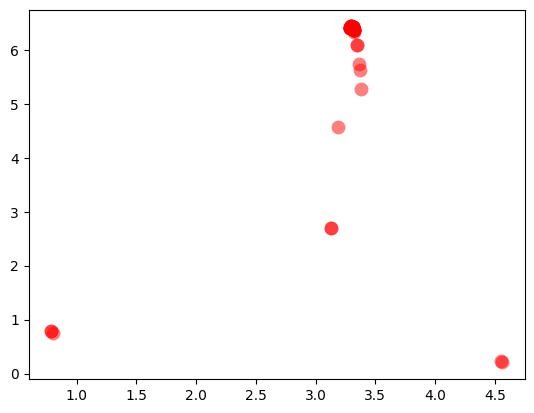

Time for Generation 126: 0.0936 seconds
Generation: 127
Max F_values: 636.5087671454559


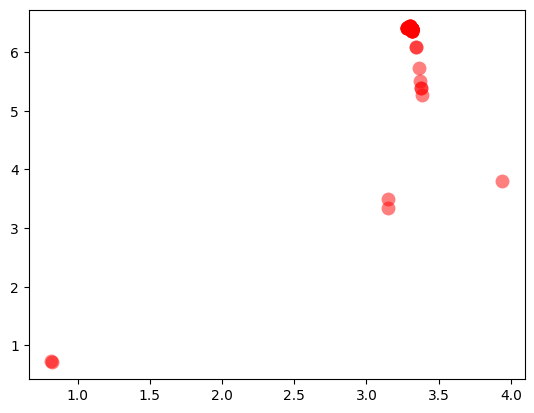

Time for Generation 127: 0.0578 seconds
Generation: 128
Max F_values: 636.5087671454559


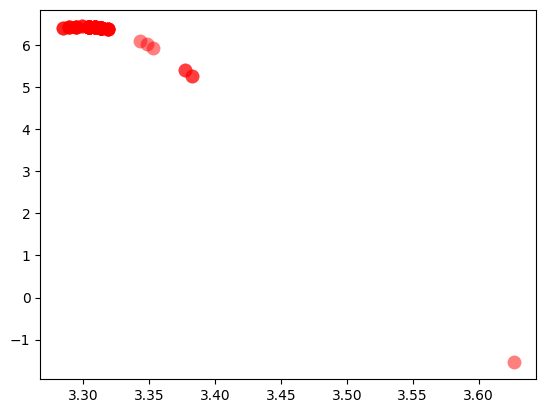

Time for Generation 128: 0.0745 seconds
Generation: 129
Max F_values: 636.5087671454559


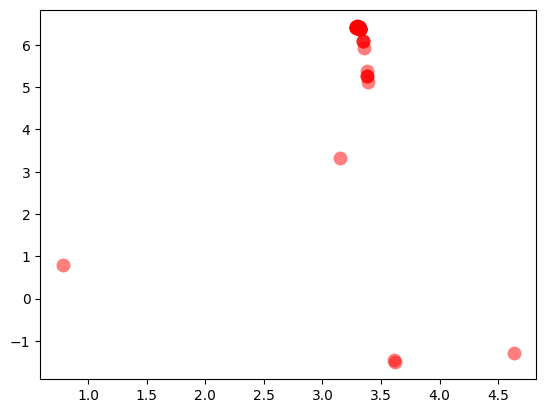

Time for Generation 129: 0.0674 seconds
Generation: 130
Max F_values: 636.5087671454559


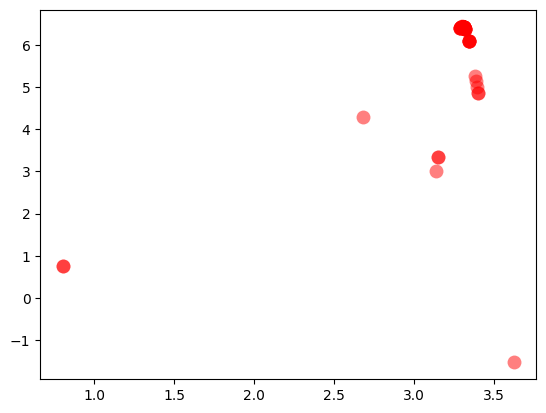

Time for Generation 130: 0.0915 seconds
Generation: 131
Max F_values: 636.5087671454559


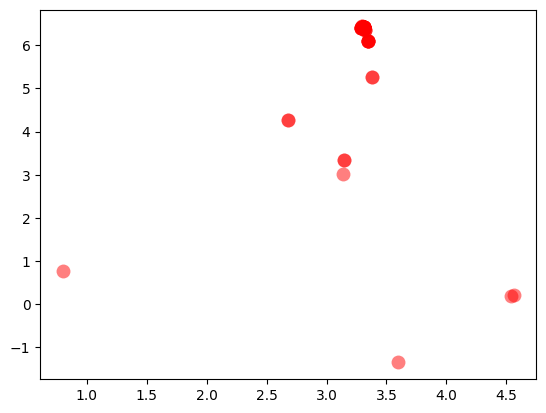

Time for Generation 131: 0.0648 seconds
Generation: 132
Max F_values: 636.5087671454559


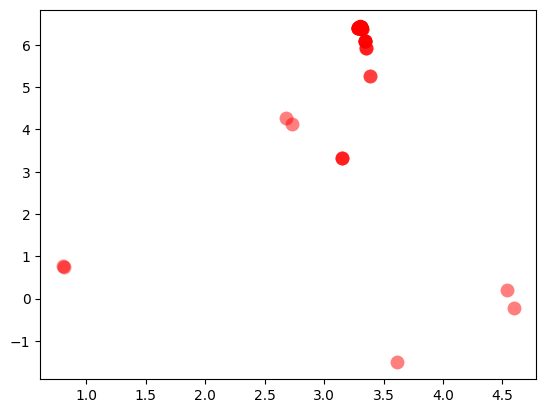

Time for Generation 132: 0.1344 seconds
Generation: 133
Max F_values: 636.5087671454559


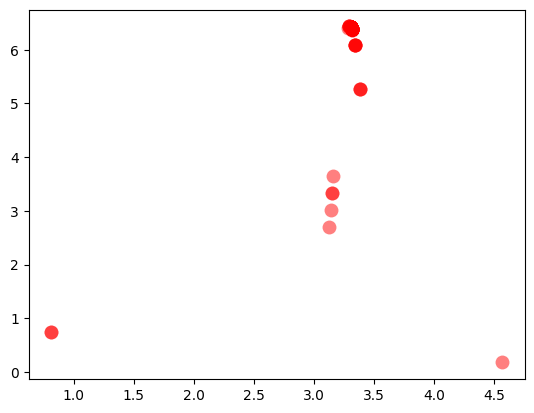

Time for Generation 133: 0.0672 seconds
Generation: 134
Max F_values: 636.5087671454559


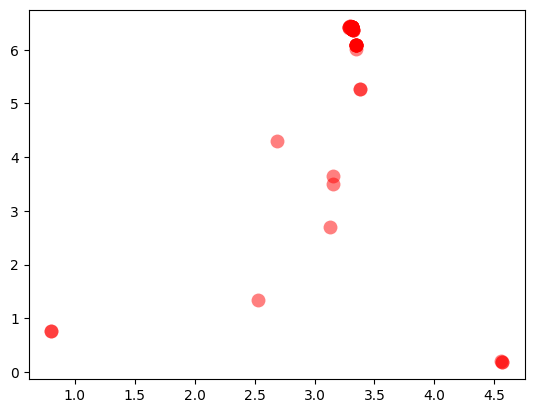

Time for Generation 134: 0.0996 seconds
Generation: 135
Max F_values: 636.5087671454559


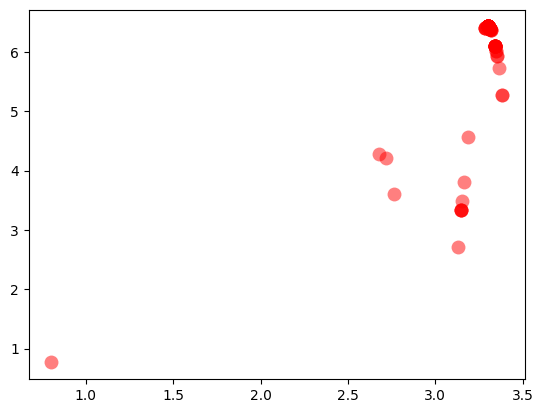

Time for Generation 135: 0.0651 seconds
Generation: 136
Max F_values: 636.5087671454559


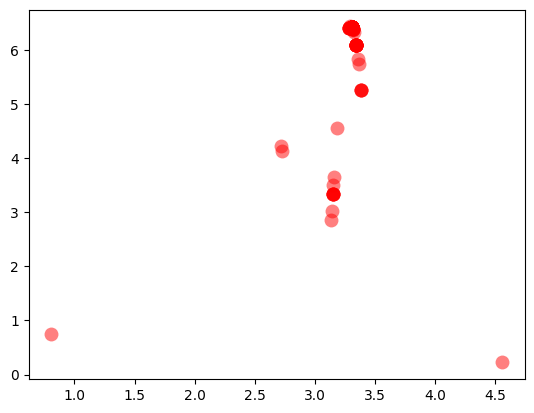

Time for Generation 136: 0.0698 seconds
Generation: 137
Max F_values: 636.5087671454559


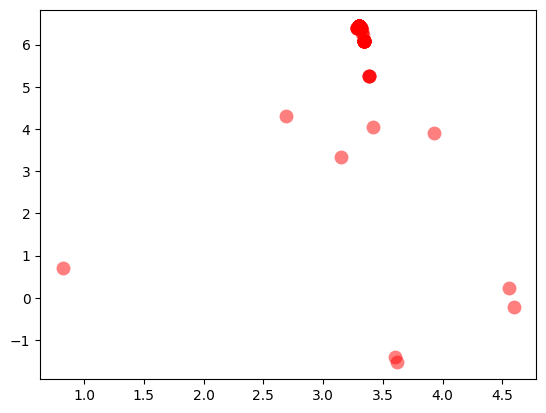

Time for Generation 137: 0.0734 seconds
Generation: 138
Max F_values: 636.5087671454559


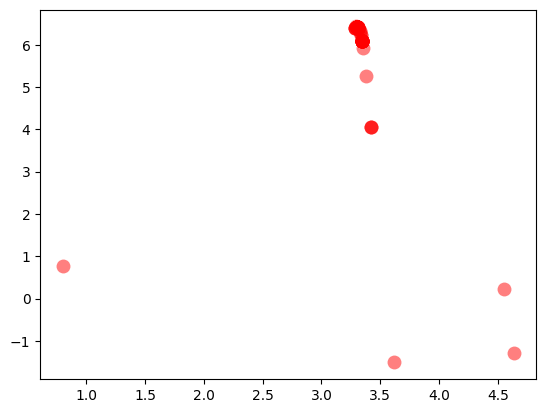

Time for Generation 138: 0.0913 seconds
Generation: 139
Max F_values: 636.5087671454559


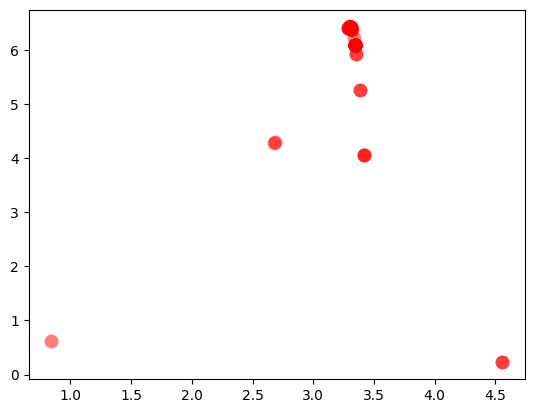

Time for Generation 139: 0.0752 seconds
Generation: 140
Max F_values: 636.5087671454559


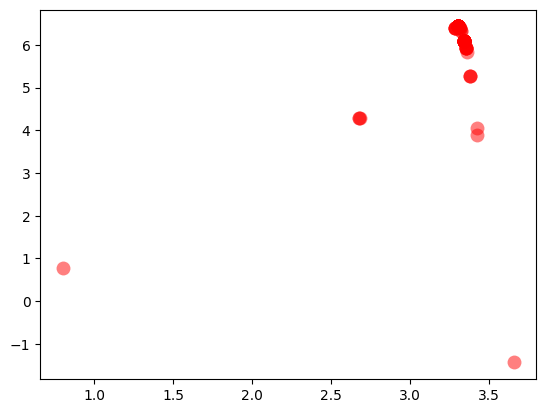

Time for Generation 140: 0.0752 seconds
Generation: 141
Max F_values: 636.5087671454559


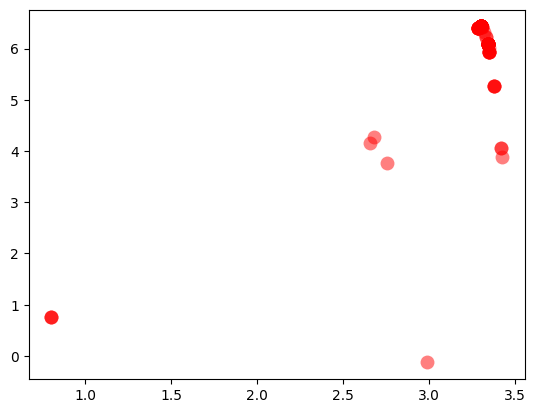

Time for Generation 141: 0.0856 seconds
Generation: 142
Max F_values: 636.5087671454559


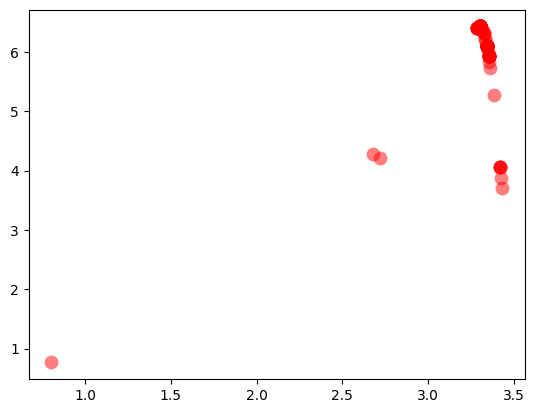

Time for Generation 142: 0.0733 seconds
Generation: 143
Max F_values: 636.5087671454559


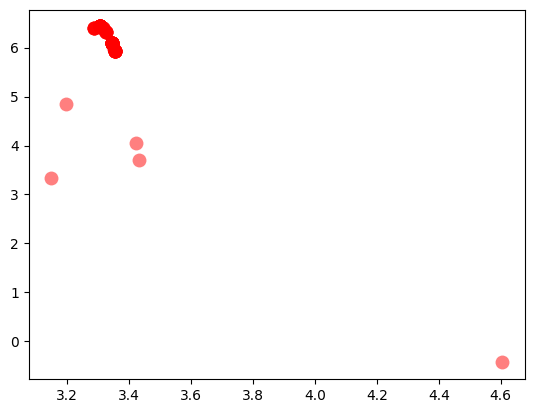

Time for Generation 143: 0.0742 seconds
Generation: 144
Max F_values: 636.5087671454559


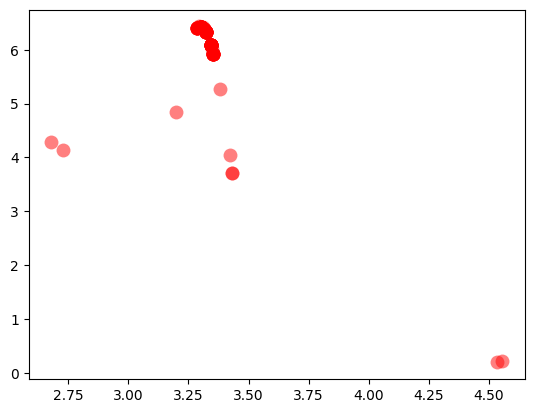

Time for Generation 144: 0.0749 seconds
Generation: 145
Max F_values: 636.5087671454559


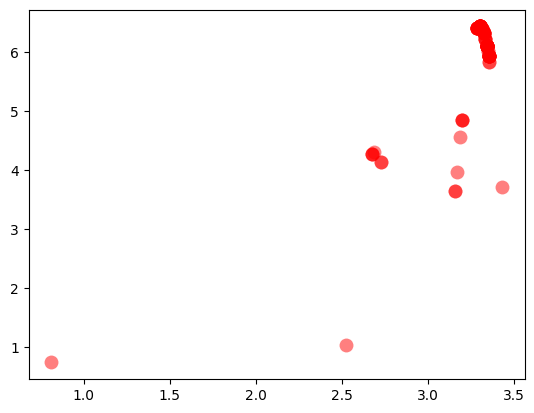

Time for Generation 145: 0.0847 seconds
Generation: 146
Max F_values: 636.5087671454559


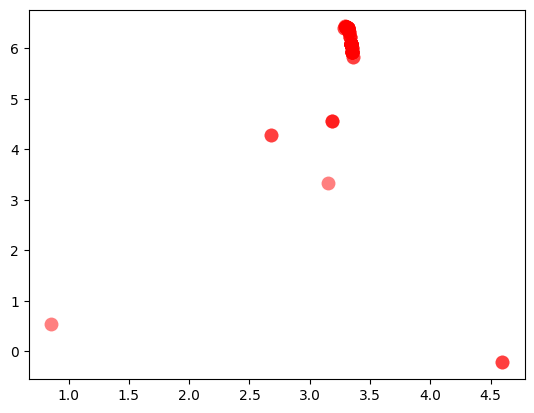

Time for Generation 146: 0.0740 seconds
Generation: 147
Max F_values: 636.5087671454559


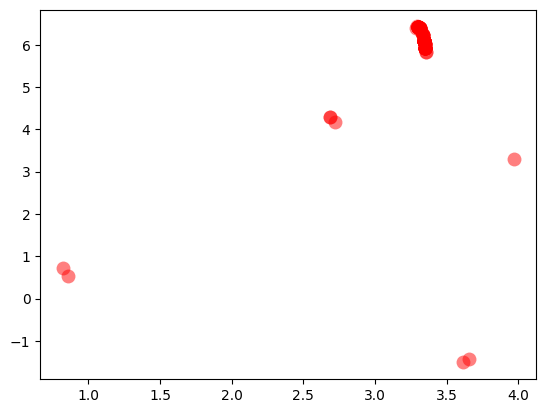

Time for Generation 147: 0.0752 seconds
Generation: 148
Max F_values: 636.5087671454559


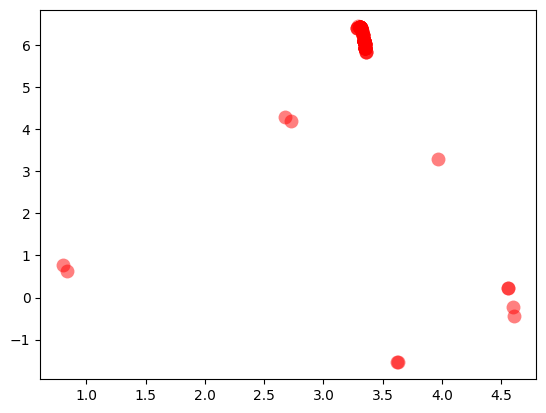

Time for Generation 148: 0.1086 seconds
Generation: 149
Max F_values: 636.5087671454559


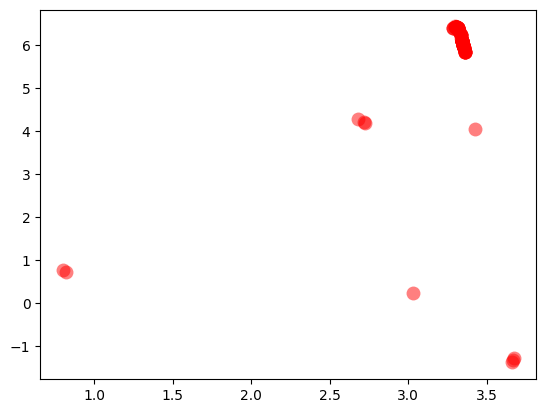

Time for Generation 149: 0.0748 seconds
Generation: 150
Max F_values: 636.5087671454559


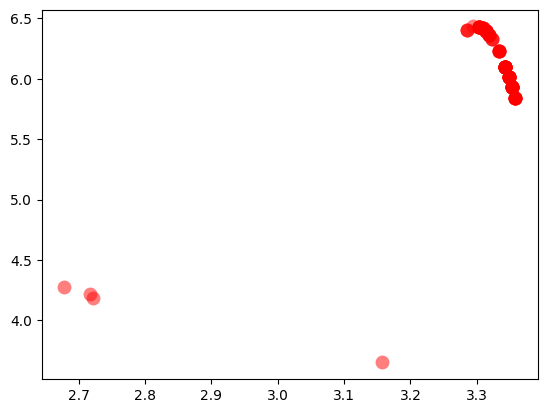

Time for Generation 150: 0.0799 seconds
Generation: 151
Max F_values: 636.5087671454559


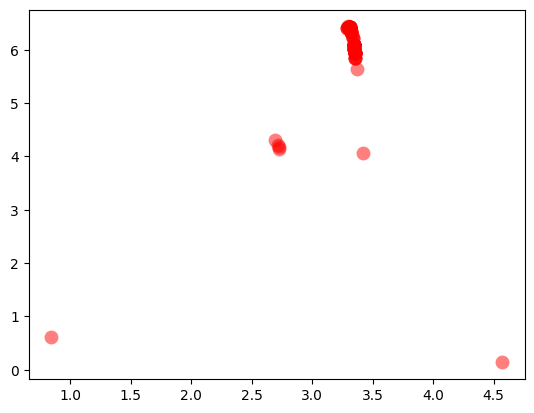

Time for Generation 151: 0.1033 seconds
Generation: 152
Max F_values: 636.5087671454559


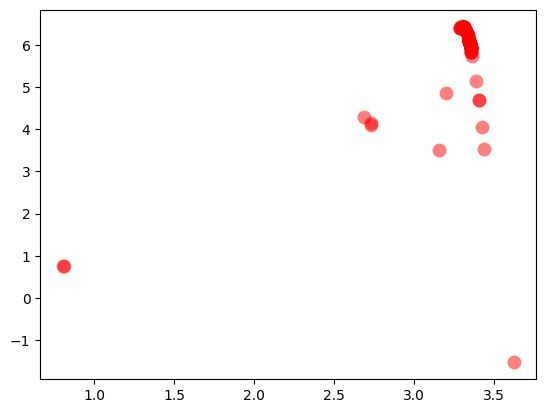

Time for Generation 152: 0.1007 seconds
Generation: 153
Max F_values: 636.5087671454559


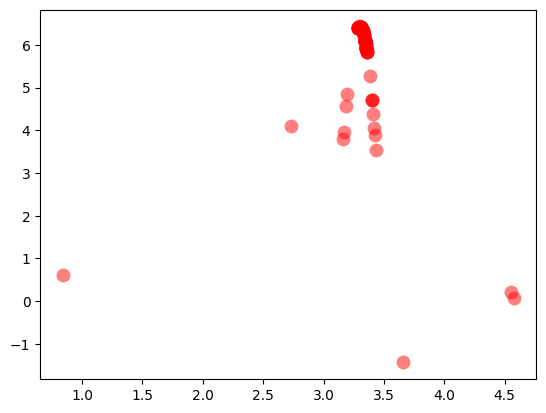

Time for Generation 153: 0.0740 seconds
Generation: 154
Max F_values: 636.5087671454559


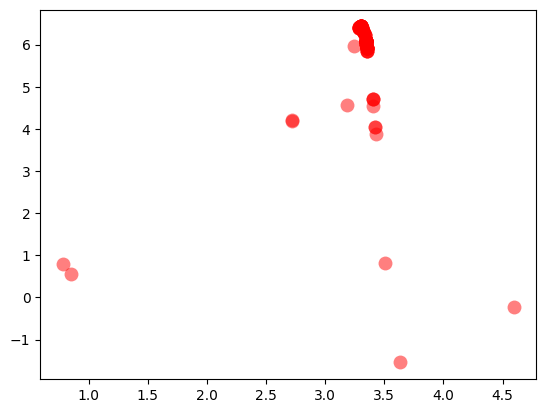

Time for Generation 154: 0.0930 seconds
Generation: 155
Max F_values: 636.5087671454559


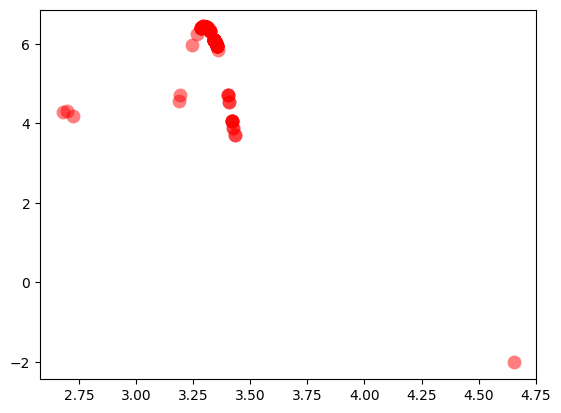

Time for Generation 155: 0.0734 seconds
Generation: 156
Max F_values: 636.5087671454559


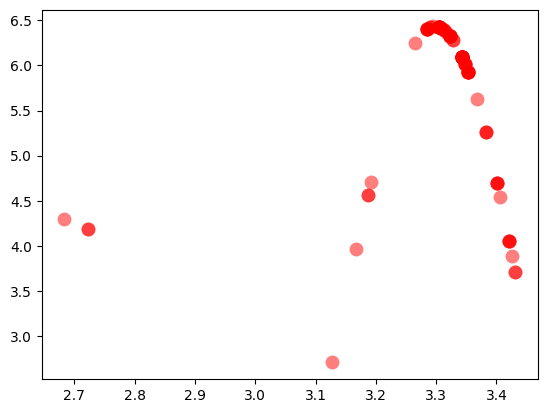

Time for Generation 156: 0.0719 seconds
Generation: 157
Max F_values: 636.5087671454559


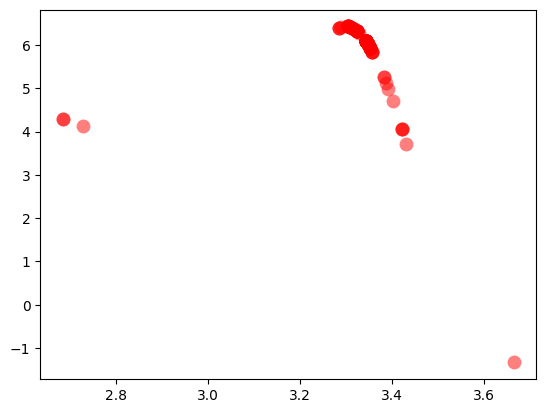

Time for Generation 157: 0.0699 seconds
Generation: 158
Max F_values: 636.5087671454559


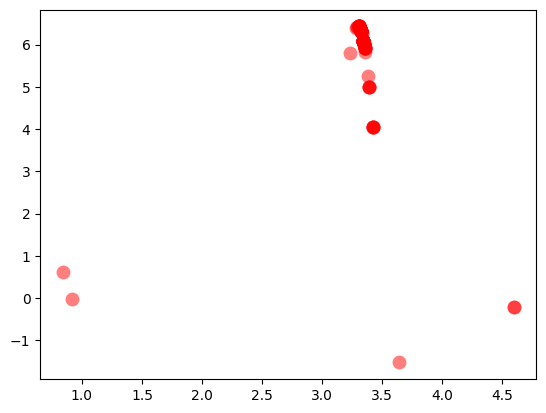

Time for Generation 158: 0.0971 seconds
Generation: 159
Max F_values: 636.5087671454559


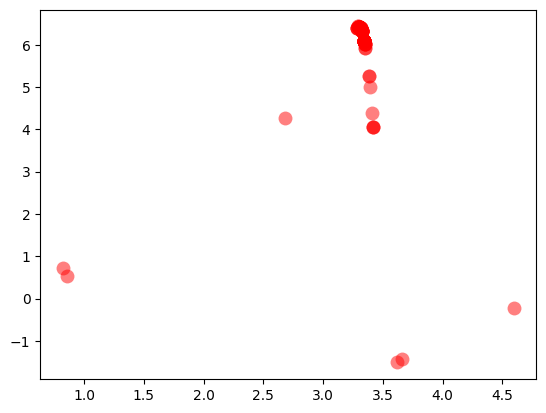

Time for Generation 159: 0.0777 seconds
Generation: 160
Max F_values: 636.5087671454559


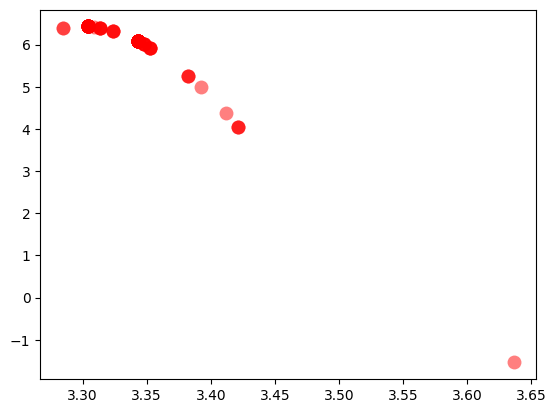

Time for Generation 160: 0.1171 seconds
Generation: 161
Max F_values: 636.5087671454559


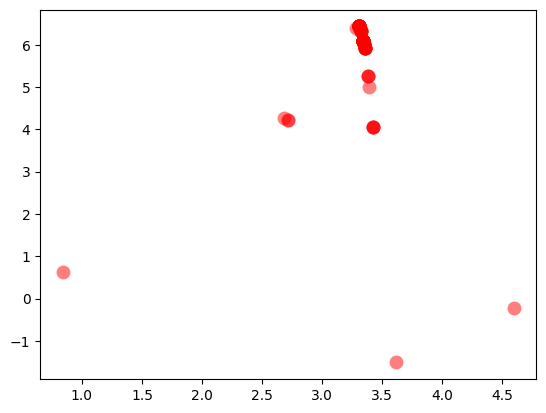

Time for Generation 161: 0.0748 seconds
Generation: 162
Max F_values: 636.5087671454559


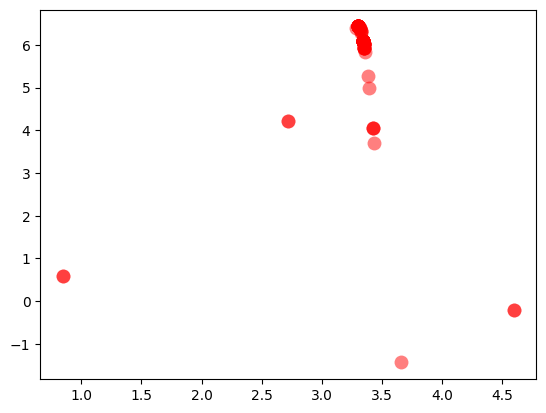

Time for Generation 162: 0.0838 seconds
Generation: 163
Max F_values: 636.5087671454559


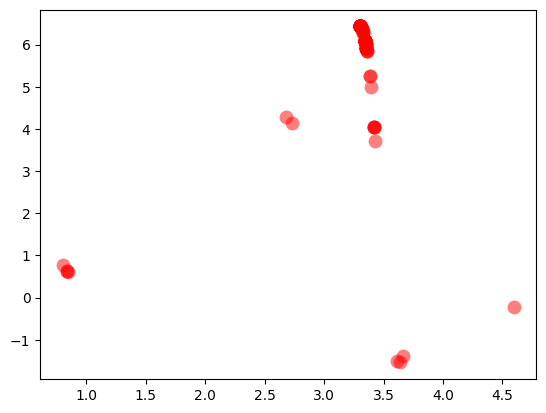

Time for Generation 163: 0.0906 seconds
Generation: 164
Max F_values: 636.5087671454559


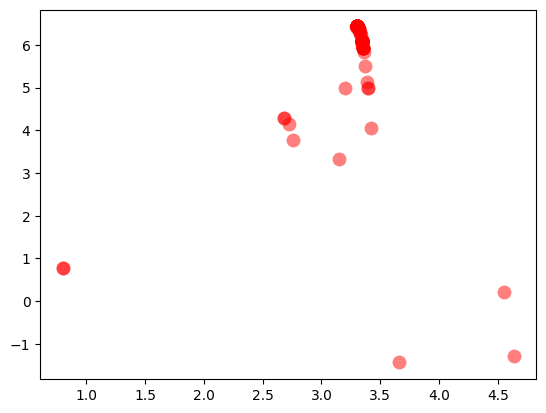

Time for Generation 164: 0.0760 seconds
Generation: 165
Max F_values: 636.5087671454559


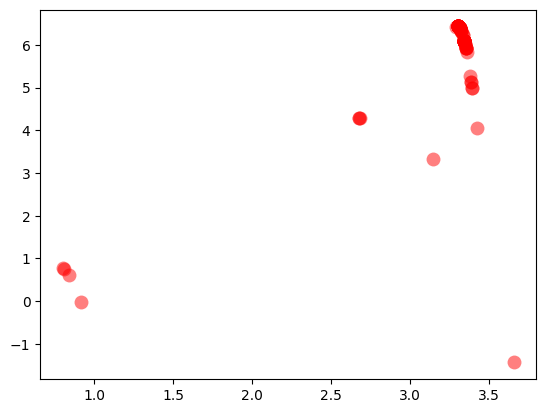

Time for Generation 165: 0.0671 seconds
Generation: 166
Max F_values: 636.5087671454559


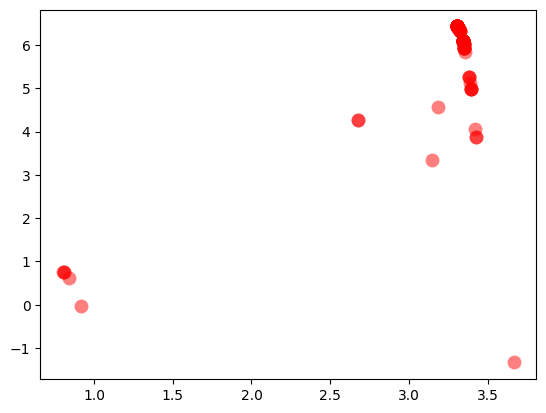

Time for Generation 166: 0.0908 seconds
Generation: 167
Max F_values: 636.5087671454559


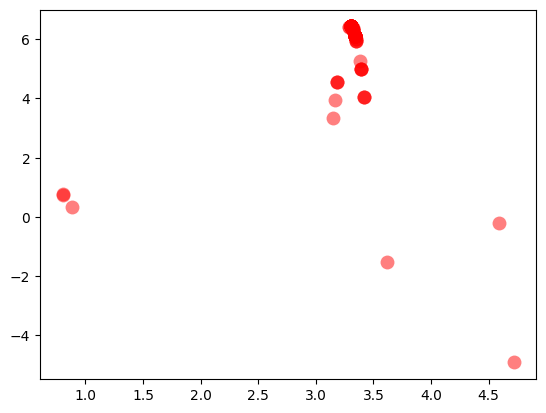

Time for Generation 167: 0.0673 seconds
Generation: 168
Max F_values: 636.5087671454559


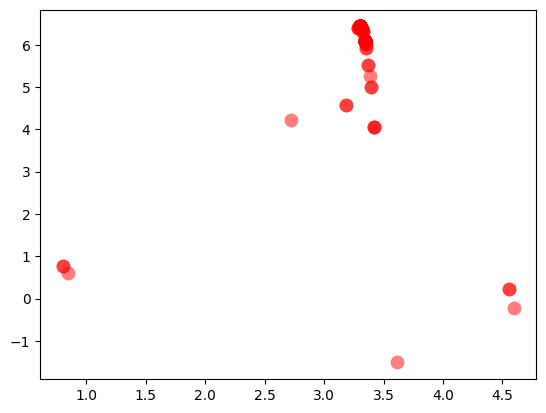

Time for Generation 168: 0.0736 seconds
Generation: 169
Max F_values: 636.5087671454559


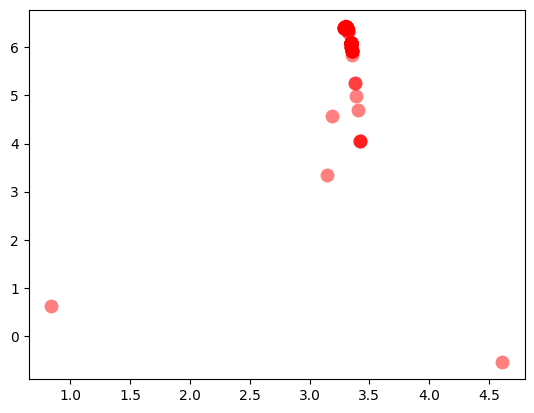

Time for Generation 169: 0.0718 seconds
Generation: 170
Max F_values: 636.5087671454559


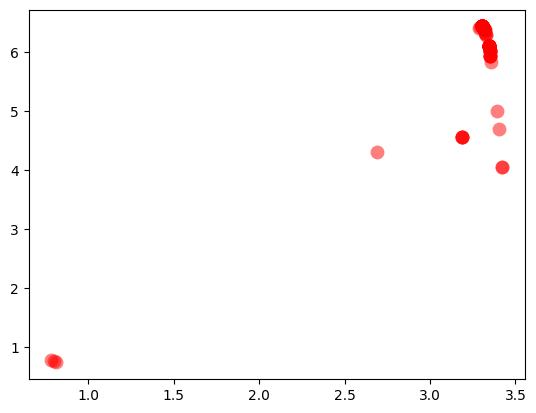

Time for Generation 170: 0.0890 seconds
Generation: 171
Max F_values: 636.5087671454559


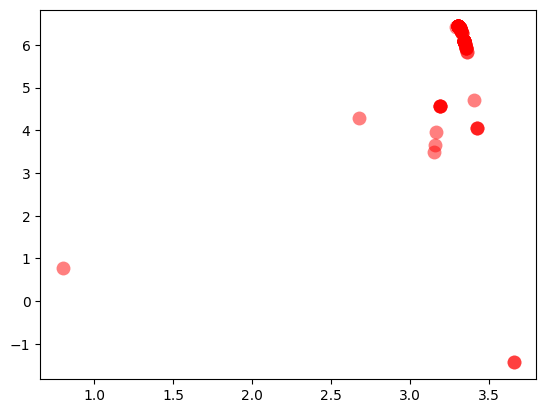

Time for Generation 171: 0.1239 seconds
Generation: 172
Max F_values: 636.5087671454559


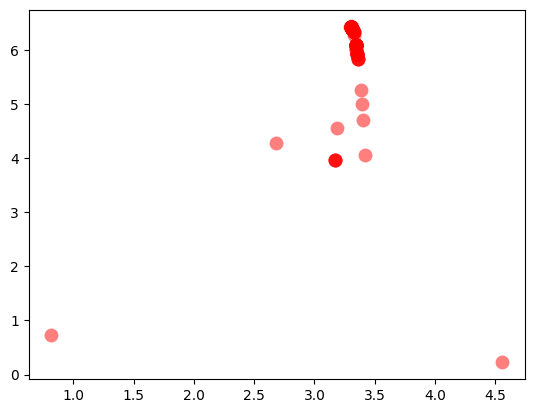

Time for Generation 172: 0.0870 seconds
Generation: 173
Max F_values: 636.5087671454559


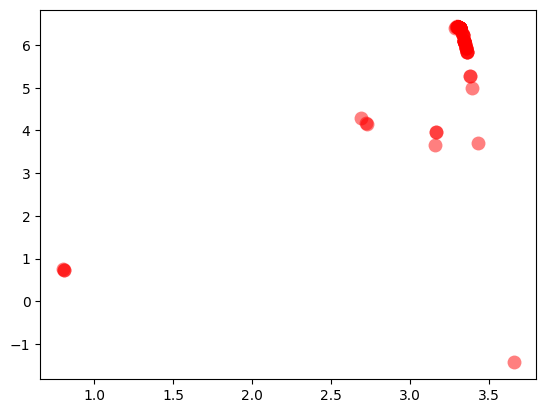

Time for Generation 173: 0.0693 seconds
Generation: 174
Max F_values: 636.5087671454559


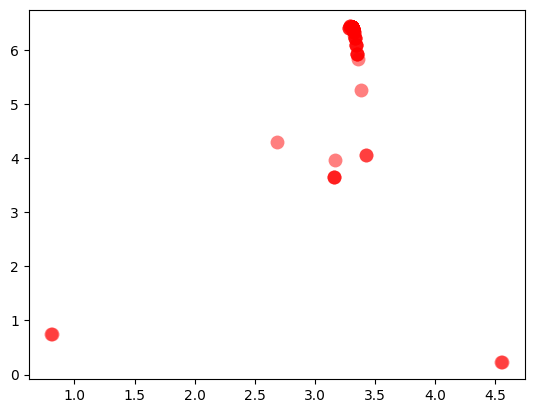

Time for Generation 174: 0.0668 seconds
Generation: 175
Max F_values: 636.5087671454559


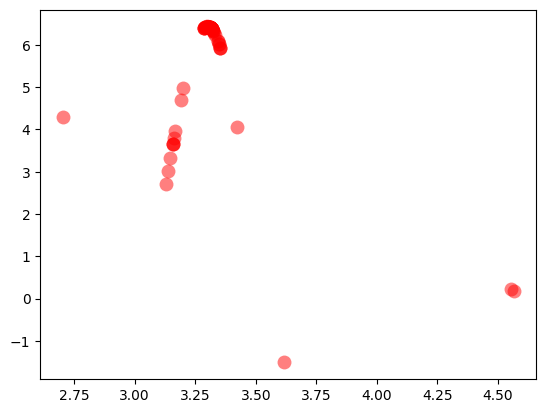

Time for Generation 175: 0.0676 seconds
Generation: 176
Max F_values: 636.5087671454559


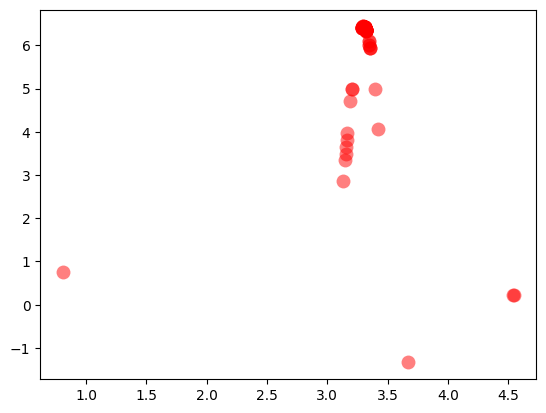

Time for Generation 176: 0.0964 seconds
Generation: 177
Max F_values: 636.5087671454559


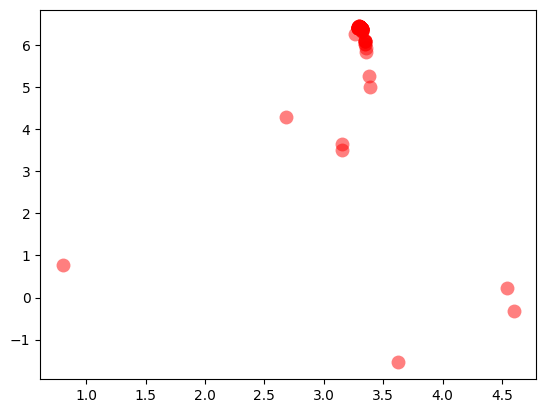

Time for Generation 177: 0.0710 seconds
Generation: 178
Max F_values: 636.5087671454559


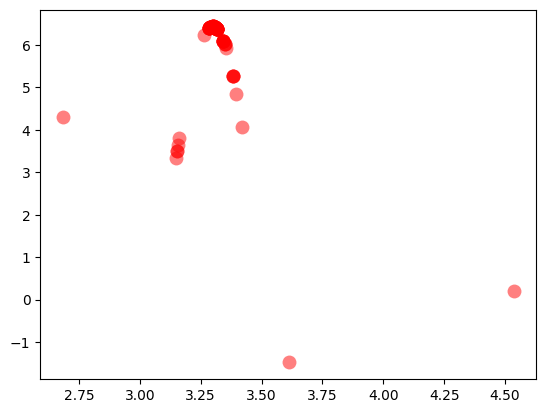

Time for Generation 178: 0.0987 seconds
Generation: 179
Max F_values: 636.5087671454559


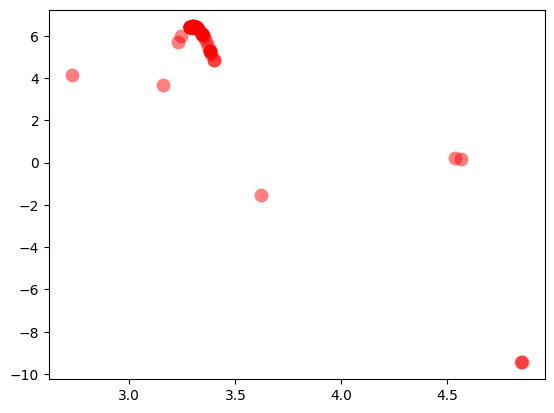

Time for Generation 179: 0.0600 seconds
Generation: 180
Max F_values: 636.5087671454559


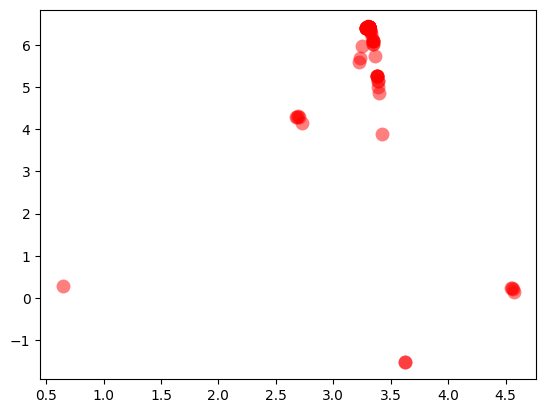

Time for Generation 180: 0.0993 seconds
Generation: 181
Max F_values: 636.5087671454559


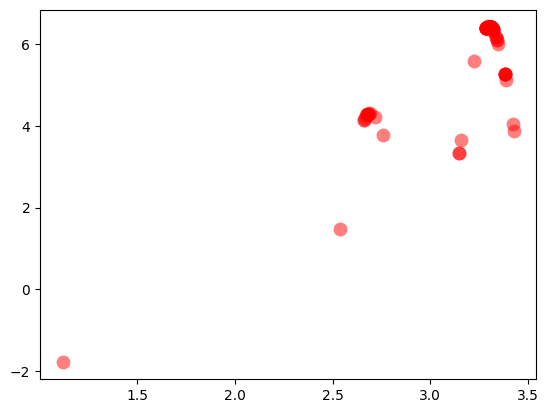

Time for Generation 181: 0.0575 seconds
Generation: 182
Max F_values: 636.5087671454559


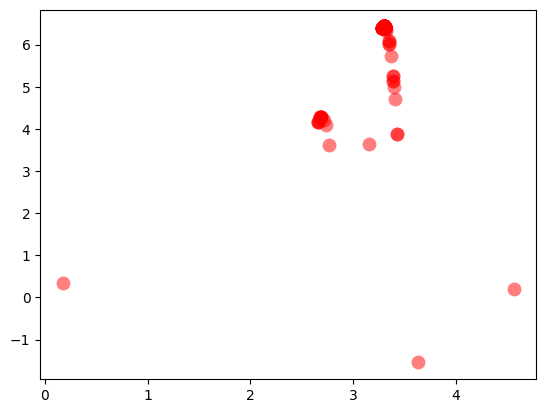

Time for Generation 182: 0.0669 seconds
Generation: 183
Max F_values: 636.5087671454559


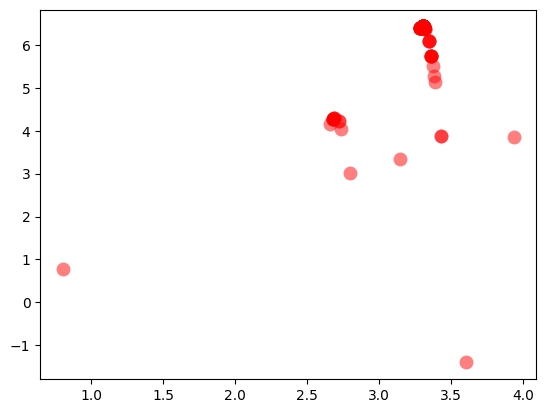

Time for Generation 183: 0.0837 seconds
Generation: 184
Max F_values: 636.5087671454559


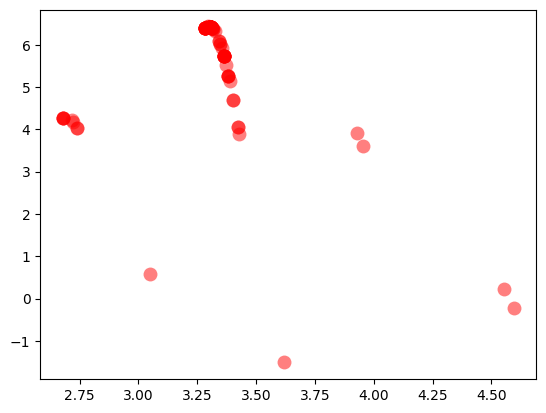

Time for Generation 184: 0.0672 seconds
Generation: 185
Max F_values: 636.5087671454559


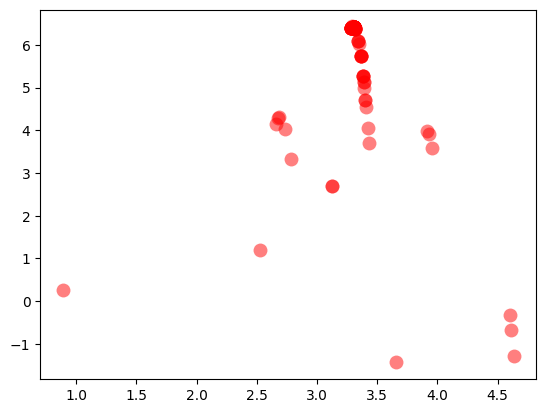

Time for Generation 185: 0.0984 seconds
Generation: 186
Max F_values: 636.5087671454559


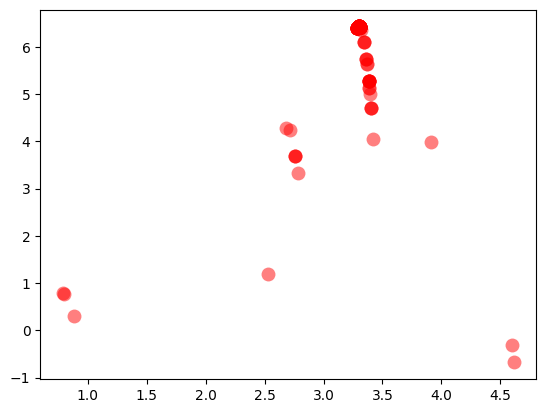

Time for Generation 186: 0.0934 seconds
Generation: 187
Max F_values: 636.5087671454559


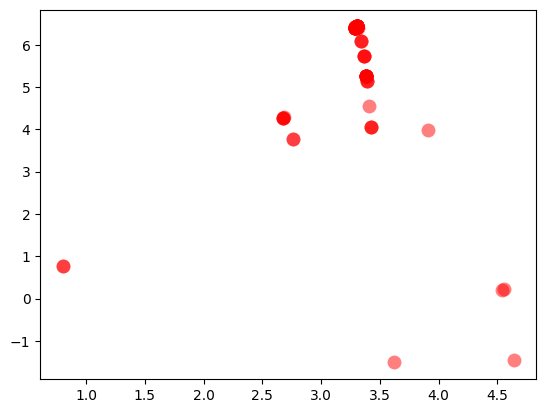

Time for Generation 187: 0.0750 seconds
Generation: 188
Max F_values: 636.5087671454559


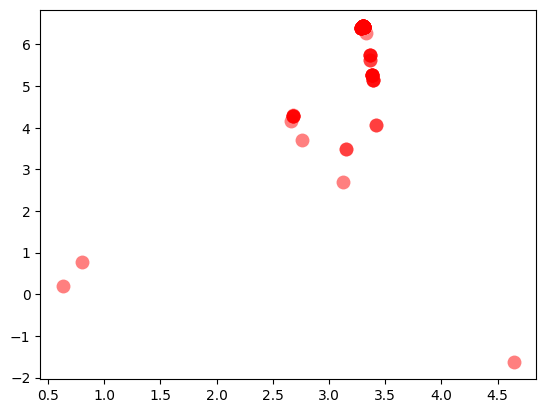

Time for Generation 188: 0.0746 seconds
Generation: 189
Max F_values: 636.5087671454559


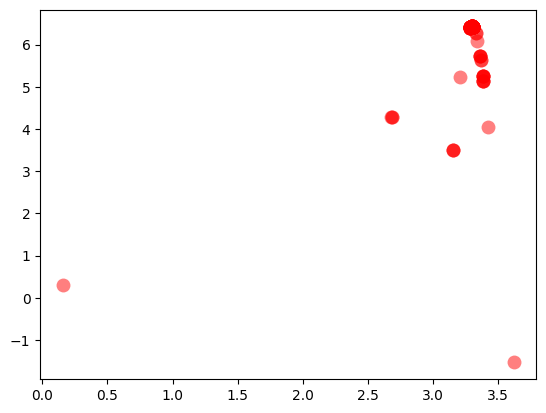

Time for Generation 189: 0.0664 seconds
Generation: 190
Max F_values: 636.5087671454559


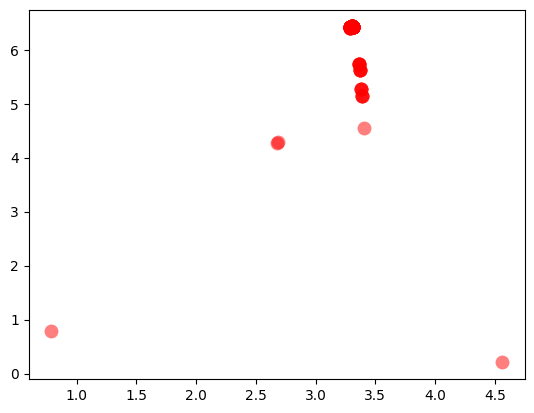

Time for Generation 190: 0.0899 seconds
Generation: 191
Max F_values: 636.5087671454559


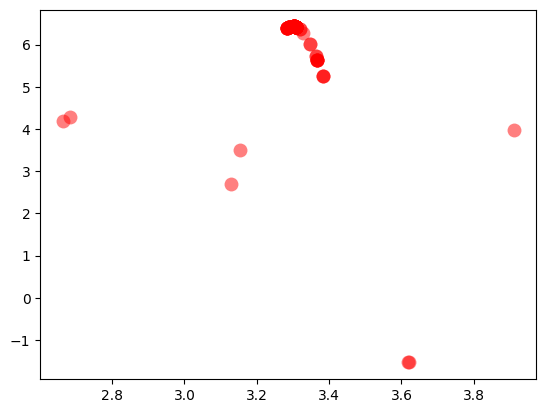

Time for Generation 191: 0.1110 seconds
Generation: 192
Max F_values: 636.5087671454559


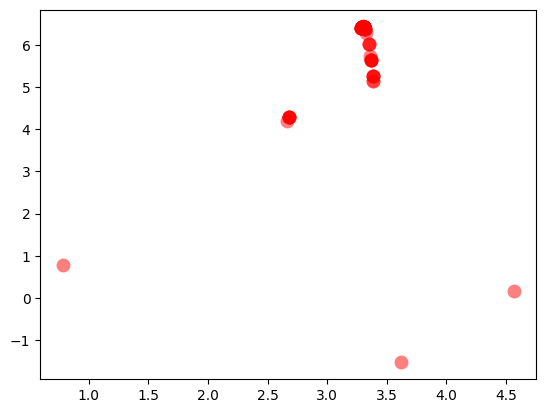

Time for Generation 192: 0.0740 seconds
Generation: 193
Max F_values: 636.5087671454559


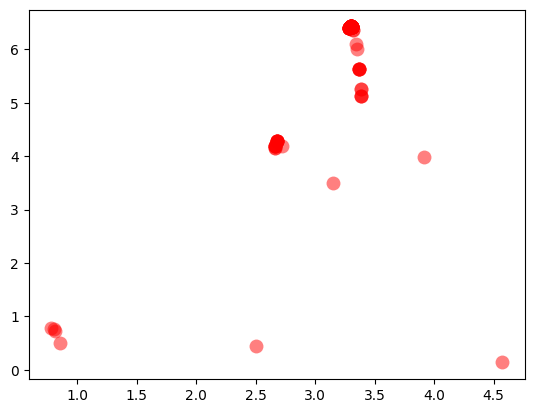

Time for Generation 193: 0.0925 seconds
Generation: 194
Max F_values: 636.5087671454559


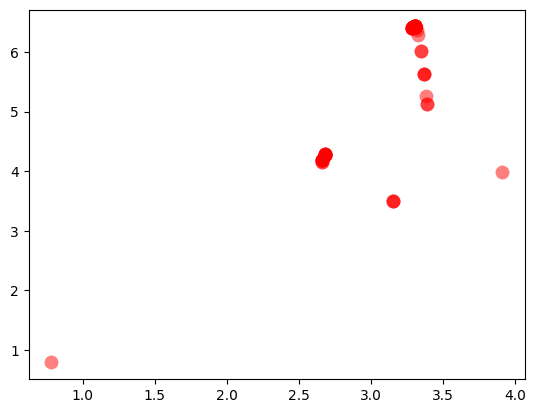

Time for Generation 194: 0.0669 seconds
Generation: 195
Max F_values: 636.5087671454559


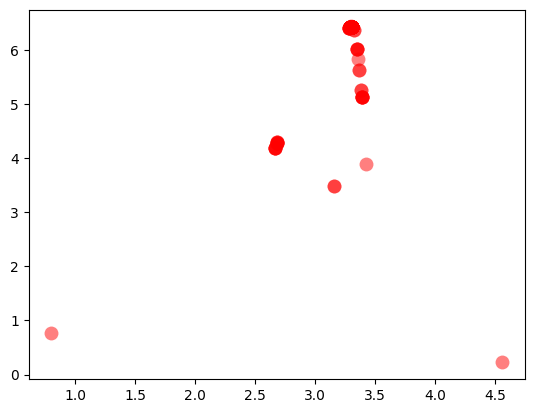

Time for Generation 195: 0.0663 seconds
Generation: 196
Max F_values: 636.5087671454559


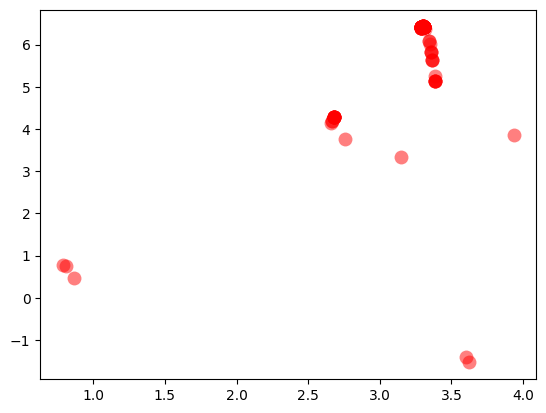

Time for Generation 196: 0.0831 seconds
Generation: 197
Max F_values: 636.5087671454559


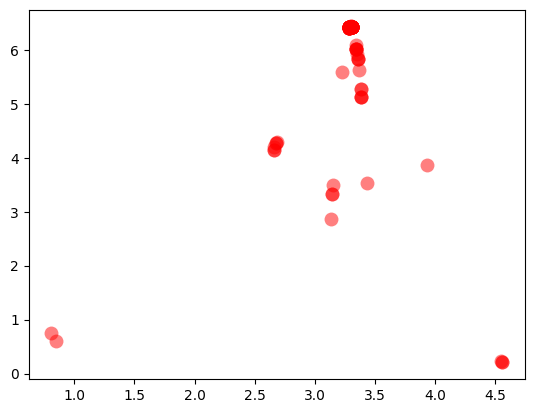

Time for Generation 197: 0.0671 seconds
Generation: 198
Max F_values: 636.5087671454559


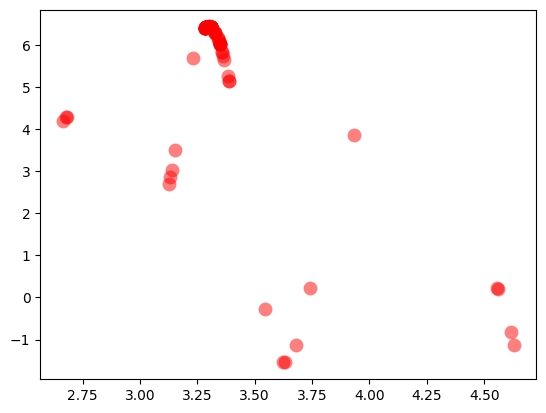

Time for Generation 198: 0.0749 seconds
Generation: 199
Max F_values: 636.5087671454559


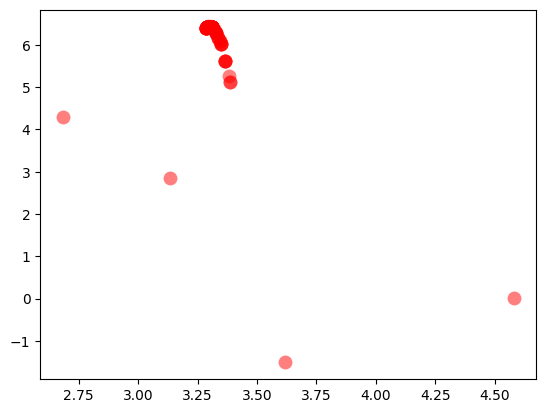

Time for Generation 199: 0.1080 seconds


([np.float64(-114.97602322942578),
  np.float64(-20.624281204594872),
  np.float64(62.823053430393244),
  np.float64(140.12831066916598),
  np.float64(91.69241966362895),
  np.float64(167.1984521205431),
  np.float64(201.1052804270365),
  np.float64(269.0912694463737),
  np.float64(337.2260144842766),
  np.float64(386.9162716542521),
  np.float64(420.6555294174956),
  np.float64(480.0735868860624),
  np.float64(471.9941347297432),
  np.float64(491.0263118628082),
  np.float64(501.2180984883371),
  np.float64(515.3745026144877),
  np.float64(515.3227249697011),
  np.float64(533.8569752444055),
  np.float64(570.6820575267105),
  np.float64(581.052791383039),
  np.float64(591.488984395331),
  np.float64(556.3878662254372),
  np.float64(577.7693730012242),
  np.float64(609.9244308452763),
  np.float64(611.9418164599608),
  np.float64(606.1031605245554),
  np.float64(625.3829465058702),
  np.float64(603.6280004805325),
  np.float64(592.9973371730722),
  np.float64(618.4281667566861),
  np.f

In [28]:
MUTATION_RATE = 0.01 # > 0.003
performance, time_per_iteration = GA(N_GENERATIONS, pop)
performance, time_per_iteration

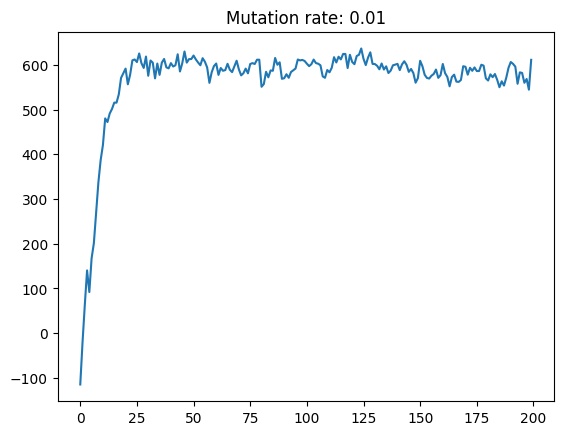

In [29]:
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.title(f"Mutation rate: {MUTATION_RATE}")
plt.plot(x, y)
plt.show()

# HW 3.10 Discuss2
Based on the time taken for each generation, do you think GA is an efficient algorithm? Please compare it with traditional heuristic algorithms and modern machine learning methods in your explanation.